# Part 0: Startup

In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz
from tqdm import tqdm
from decimal import Decimal
import plotly_uzh_template


In [2]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

format_k = lambda x, pos: f'{x/10**3:,.0f}K'
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')
import warnings
# 忽略 pandas 警告
warnings.filterwarnings('ignore')
from matplotlib import font_manager

font_dirs = ['/home/user/yan/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)



In [5]:
#pip install statsmodels

# Part I Total Reward Sum by Daily

In [25]:
# Read in Transaction Data
# data = pd.read_csv('total_reward_sum_by_daily.csv')
import pandas as pd
def read_large_csv(file_path, chunk_size=1000000):
    accumulated_data = pd.DataFrame()
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunks:
        accumulated_data = pd.concat([accumulated_data, chunk])
    return accumulated_data
data=read_large_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_reward_sum_daily.csv')
data.head()

date  final_total_reward  proposer_total_reward  \
0  2022-09-15       1142336453893           147823762714   
1  2022-09-16       1590103889535           205197949000   
2  2022-09-17       1609976379528           206454113667   
3  2022-09-18       1620454747426           207083260113   
4  2022-09-19       1626254416652           207451069783   

   attestation_total_reward  sync_total_reward  
0              960736468121        33776223058  
1             1336935154055        47970786480  
2             1354427393059        49094872802  
3             1363916989995        49454497318  
4             1369820615547        48982731322

In [26]:
data=data.sort_values(by='date') # sort by date
#Convert Gwei to Ether
data=data.set_index('date')
data=data/Decimal(10**9)
data=data.reset_index()
df=data.copy()
df=df.iloc[1:-1] # cut the first day and last day
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)# Get columns that end with '_reward'
df['date']=pd.to_datetime(df['date'])

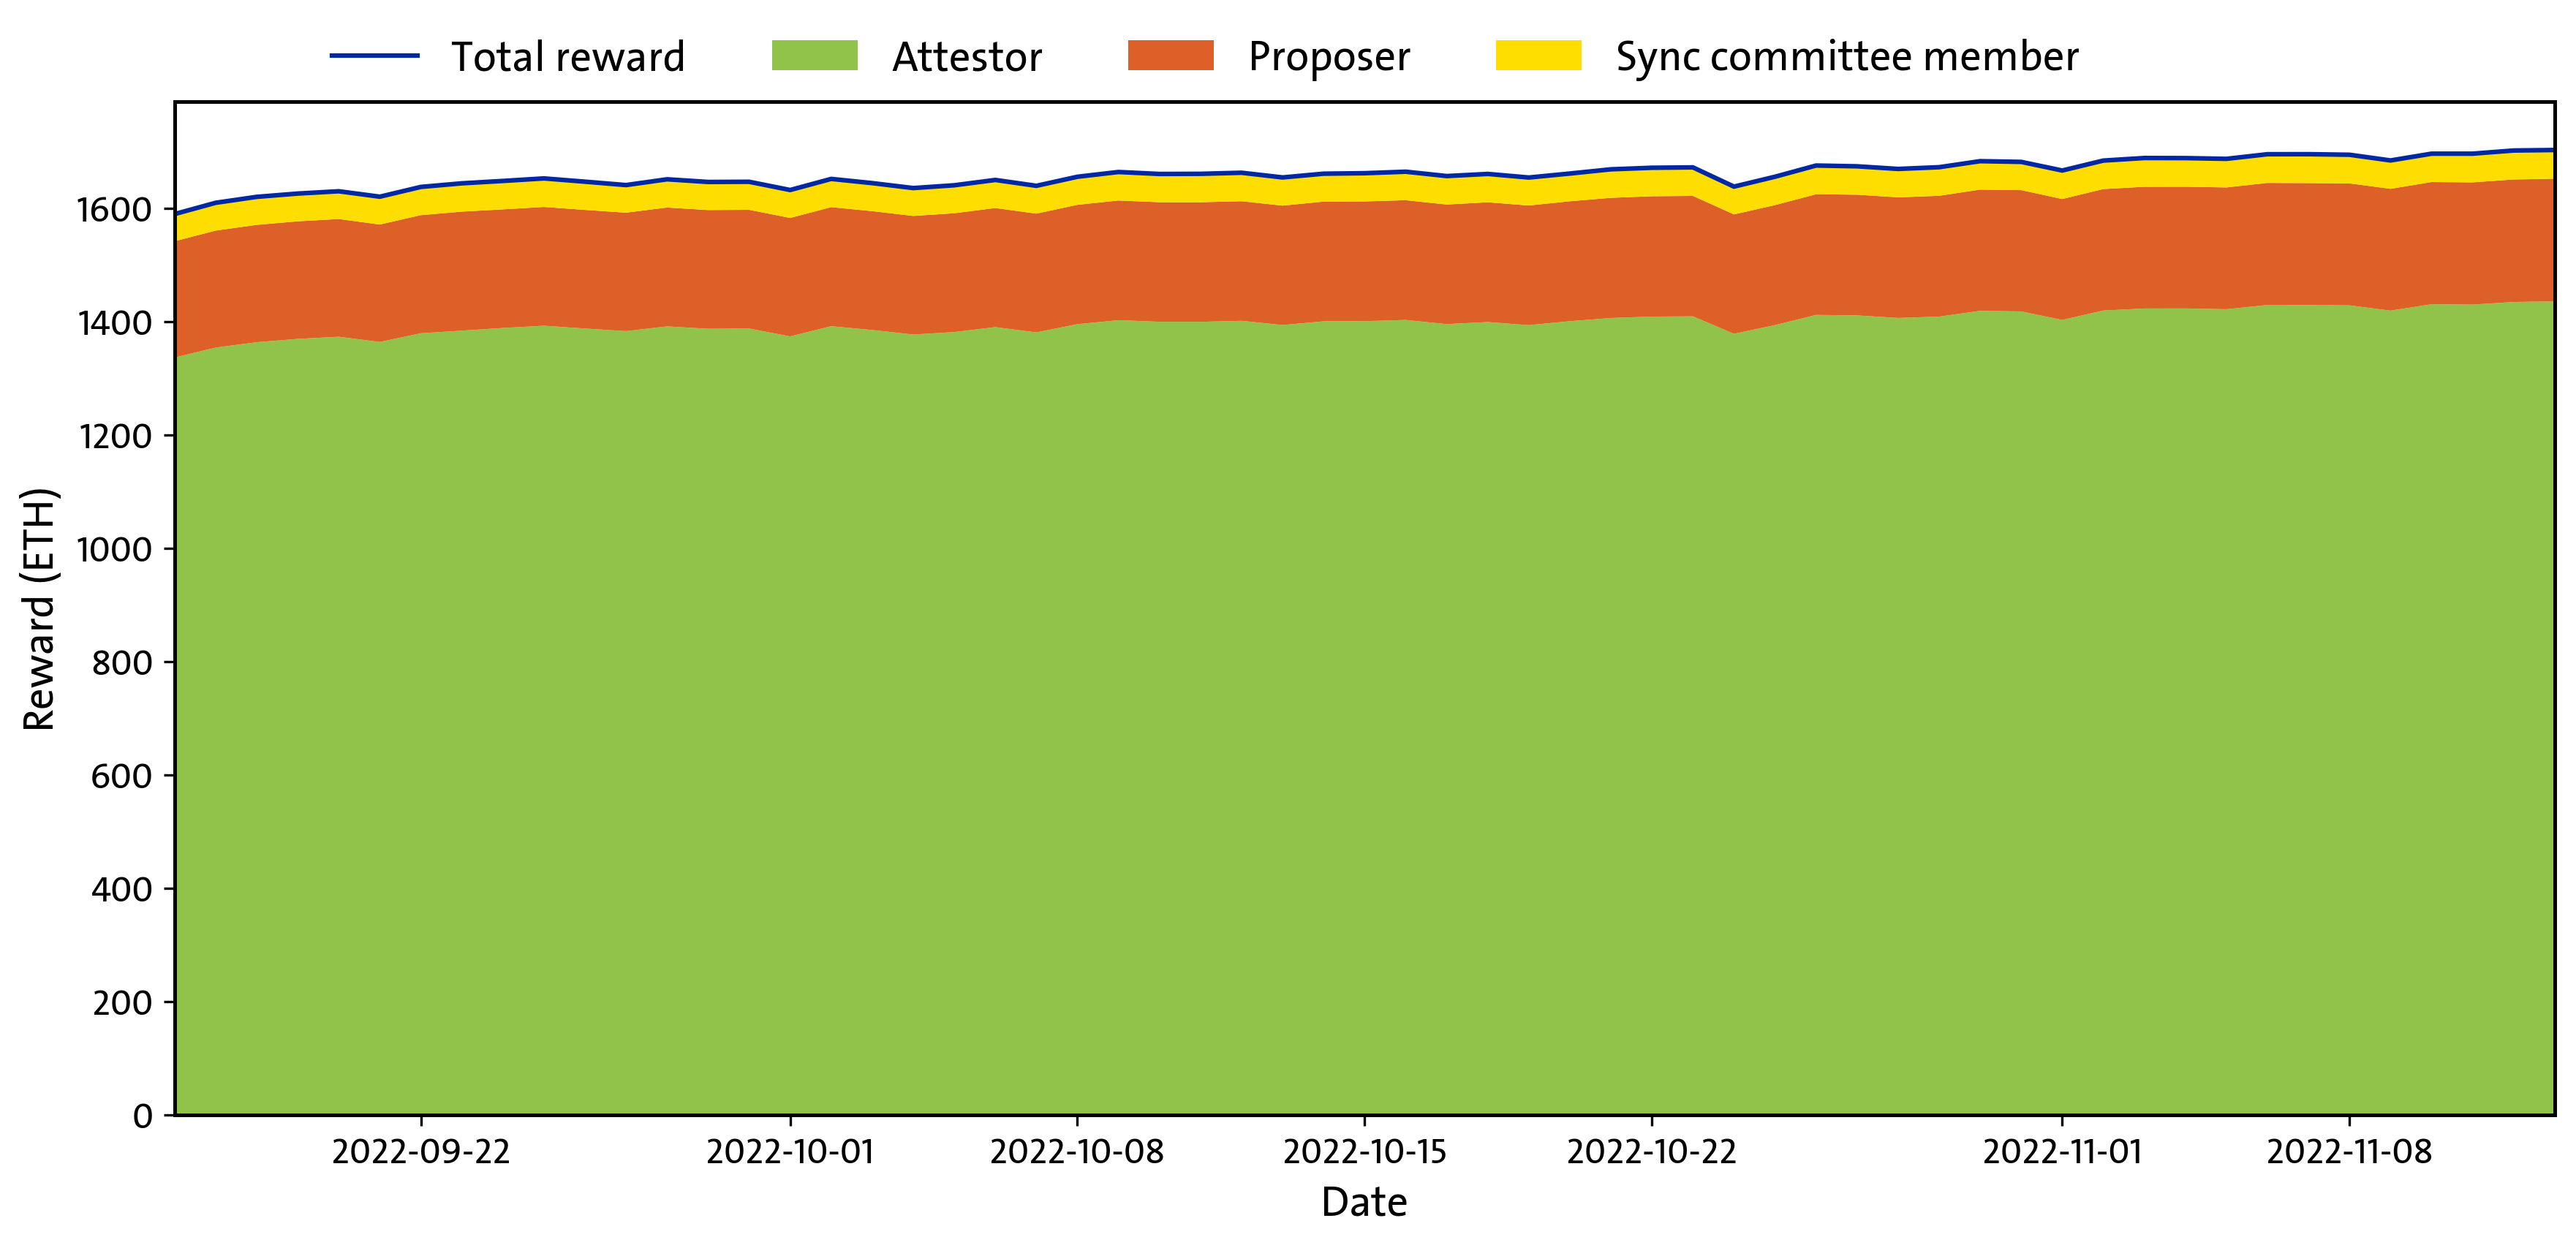

In [27]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)
ax.plot(df['date'], df['Total reward'], label='Total reward',linewidth=1.5)
ax.stackplot(df['date'], df['Attestation reward'], df['Proposer reward'], df['Sync committee reward'], labels=['Attestor', 'Proposer', 'Sync committee member'],colors=['#91c34a', '#dc6027', '#fede00'])
# ax.fill_between(df['date'], df['Attestation reward'], label='Attestation reward',linewidth=1.5)
# ax.fill_between(df['date'], df['Proposer reward'], label='Proposer reward',linewidth=1.5)
# ax.fill_between(df['date'], df['Sync committee reward'], label='Sync committee reward',linewidth=1.5)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Reward (ETH)',fontsize=14)
ax.legend(fontsize=14)
# ax.set_title('Daily reward',fontsize=14)
#让图形从 x=0 开始绘制
ax.set_xlim(left=df['date'].iloc[0])
ax.set_xlim(right=df['date'].iloc[-1])
ax.legend(loc='upper left',fontsize=14,ncol=4,bbox_to_anchor=(0.05,1.1),frameon=False)
# ax.set_ylim(bottom=0)
plt.savefig('./new_figures/total_reward_daily.pdf',bbox_inches='tight',dpi=300,facecolor='white')

### reward distribution

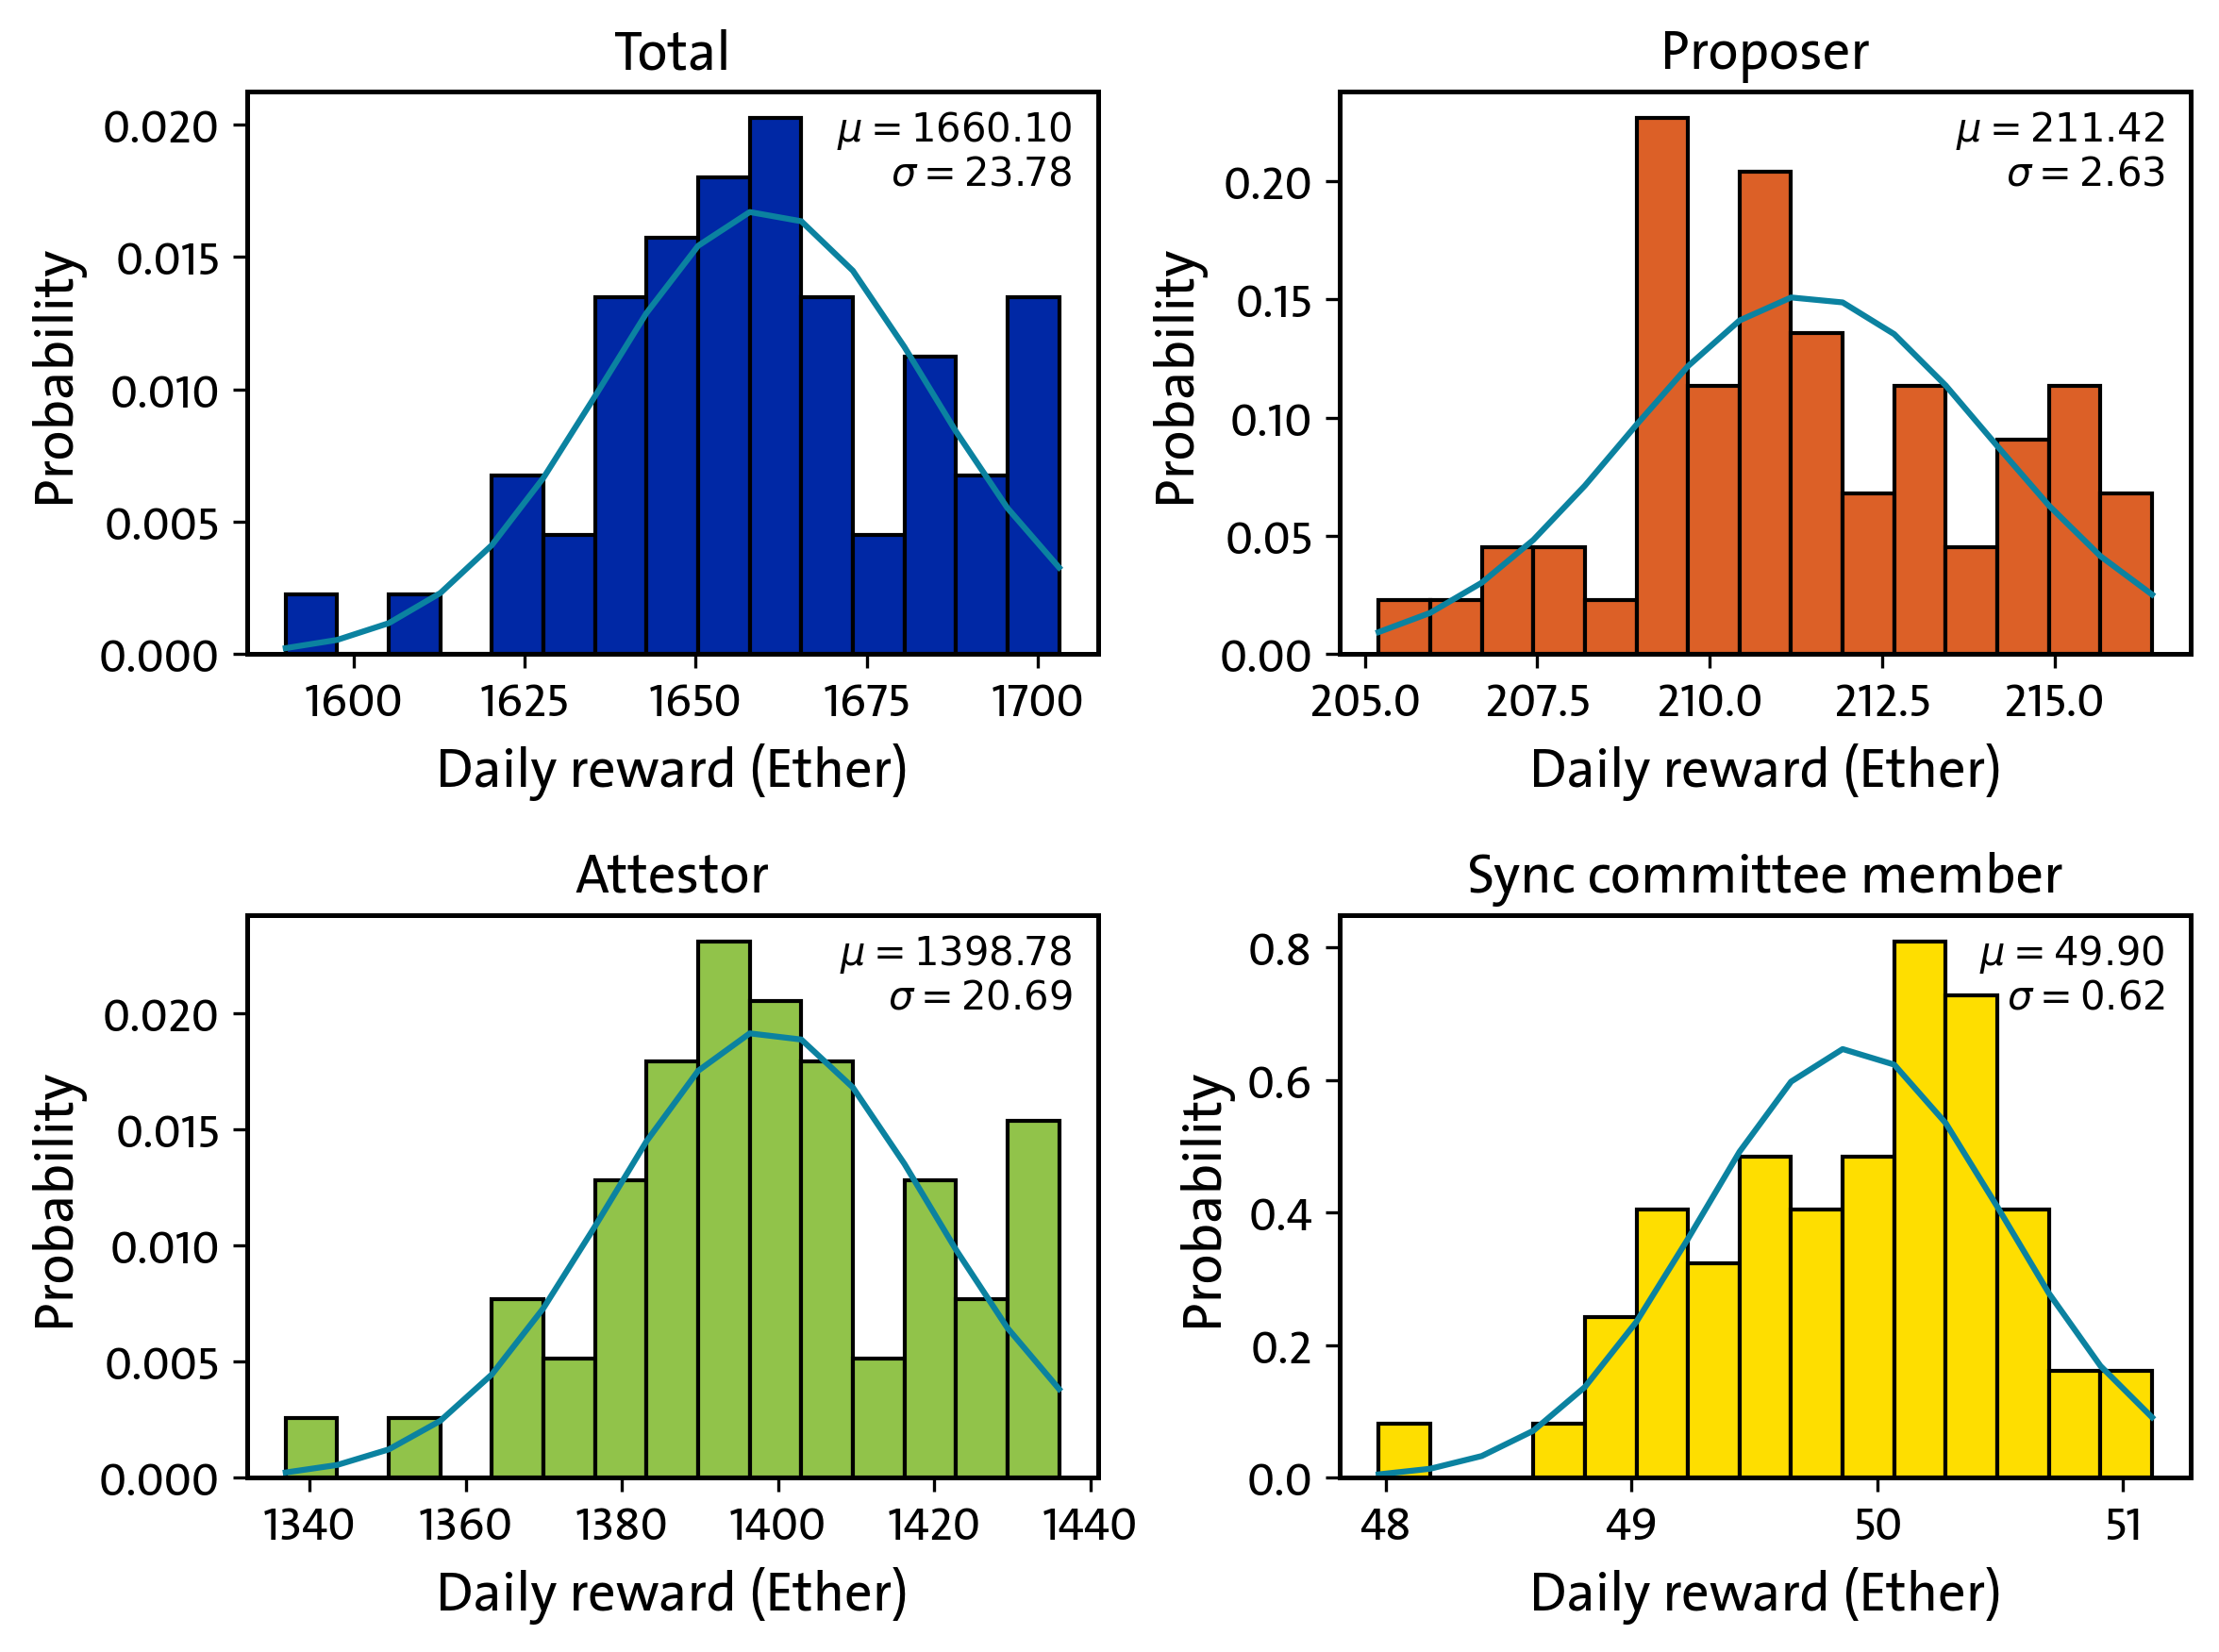

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame
# List of the four specified columns
columns_to_plot = df.columns[1:5]
colors = ['#0028a5', '#dc6027', '#91c34a', '#fede00']

# Define subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes for easier indexing
axes = axes.flatten()

# Add histograms to each subplot column
for i, column in enumerate(columns_to_plot):
    x = df[column].apply(float)
    mu = x.mean()
    sigma = x.values.std()
    num_bins = 15
    n, bins, patches = axes[i].hist(x, num_bins, density=1, edgecolor='black', color=colors[i])
    y = stats.norm.pdf(bins, mu, sigma)
    axes[i].plot(bins, y, color='#0b82a0', linewidth=1.5)
    axes[i].text(0.97, 0.97, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$', verticalalignment='top',
                 horizontalalignment='right', transform=axes[i].transAxes, fontsize=10)
    # axes[i].legend(loc='upper right', fontsize=14)
    if column == 'Sync committee reward':
        axes[i].set_title('Sync committee member', fontsize=14)
    elif column == 'Attestation reward':
        axes[i].set_title('Attestor', fontsize=14)
    else:
        axes[i].set_title(column.split(' ')[0], fontsize=14)
    axes[i].set_xlabel('Daily reward (Ether)', fontsize=14)
    axes[i].set_ylabel('Probability', fontsize=14)

# Add x-axis and y-axis labels to the last subplot
# axes[-1].set_xlabel('Reward (Ether)', fontsize=14)
# axes[-1].set_ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('./new_figures/reward5_histogram_daily.pdf',bbox_inches='tight',dpi=300,facecolor='white')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


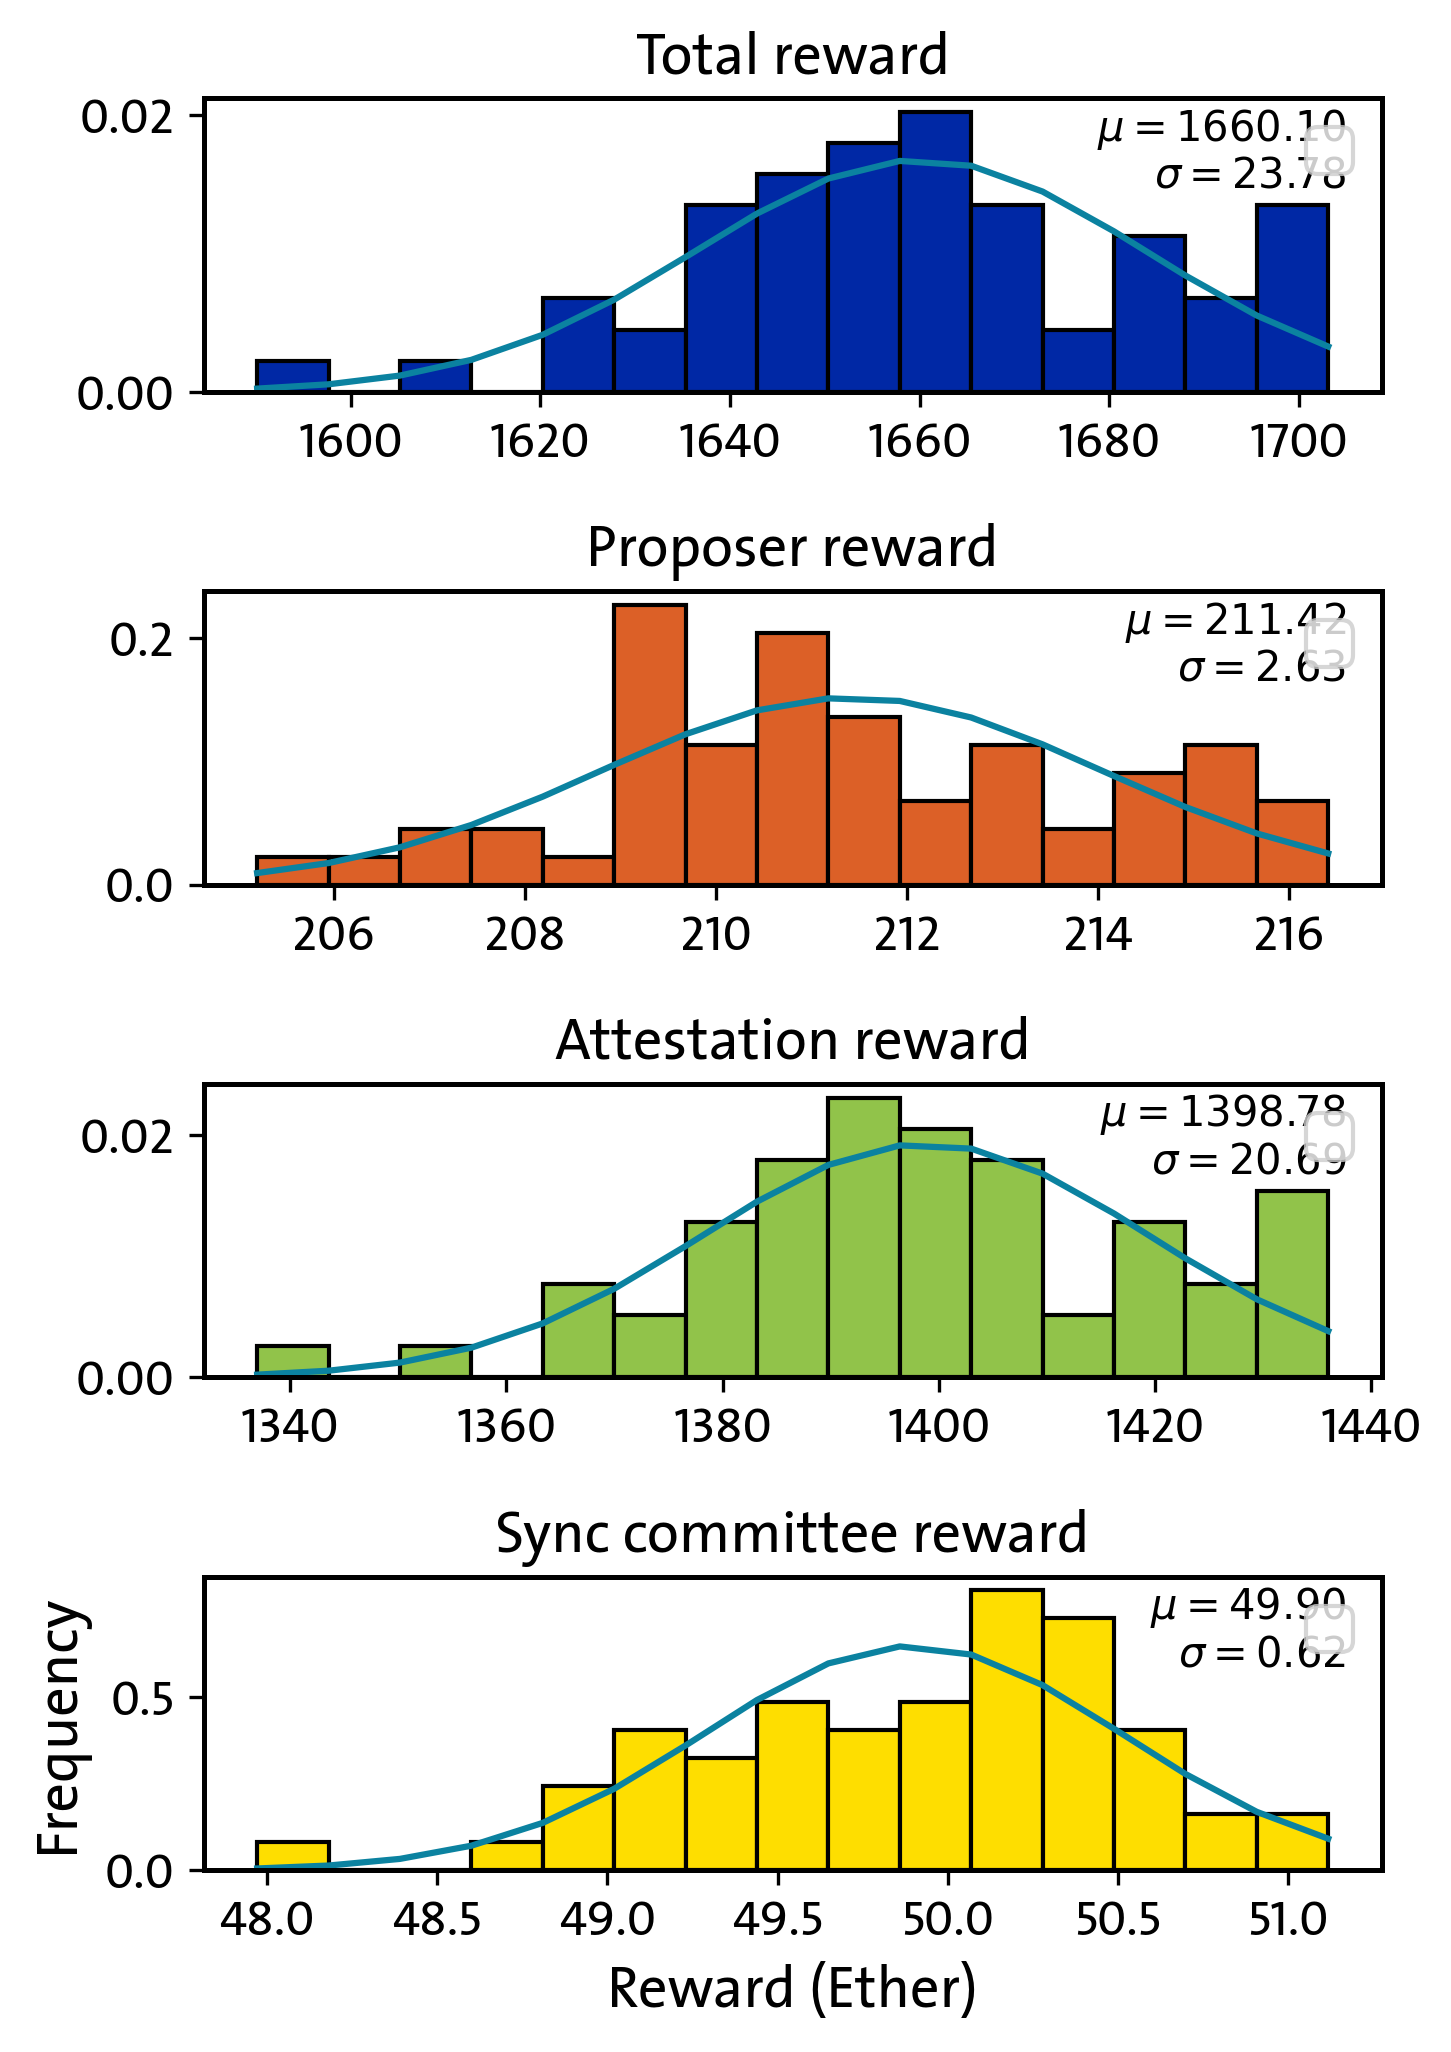

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# List of the four specified columns
columns_to_plot =df.columns[1:5]
colors=['#0028a5','#dc6027','#91c34a','#fede00']
# Define subplots with 1 row and 4 columns
fig, axes = plt.subplots(len(columns_to_plot),1, figsize=(5, 7))

# Add histograms to each subplot column
for i, column in enumerate(columns_to_plot, start=0):
    # axes[i].hist(df[column], bins=15, alpha=0.8, label=column, color=colors[i],edgecolor='black')
    #添加正态分布曲线
    x=df[column].apply(float)
    mu = x.mean()
    sigma = x.values.std()
    num_bins = 15
    n, bins, patches = axes[i].hist(x, num_bins, density=1,edgecolor='black',color=colors[i])
    y = stats.norm.pdf(bins, mu, sigma)
    axes[i].plot(bins, y,color='#0b82a0',linewidth=1.5)
    #添加均值和标准差
    axes[i].text(0.97, 0.97, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$', verticalalignment='top', horizontalalignment='right',transform=axes[i].transAxes,fontsize=10)
    axes[i].legend(loc='upper right',fontsize=14)
    axes[i].set_title(column, fontsize=14)
    # axes[i].set_xlabel('Reward (Ether)',fontsize=14)
    # axes[i].set_ylabel('Frequency',fontsize=14)
    # axes[i].grid(zorder=100, lw =0.5, color = 'lightgray')

    

# Add x-axis and y-axis labels to the last subplot
axes[-1].set_xlabel('Reward (Ether)',fontsize=14)
axes[-1].set_ylabel('Frequency',fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('./new_figures/reward5_distribution_daily.pdf',bbox_inches='tight',dpi=300,facecolor='white')


# Part II Total Reward Sum by Epoch

# Part III Index

In [3]:
import pandas as pd
def read_large_csv(file_path, chunk_size=1000000):
    accumulated_data = pd.DataFrame()
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunks:
        accumulated_data = pd.concat([accumulated_data, chunk])
    return accumulated_data
# data=read_large_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_rewards_daily_validator.csv')

In [234]:
data=data.sort_values(by='date') # sort by date
#Convert Gwei to Ether
data[['final_total_reward','proposer_total_reward','attestation_total_reward','sync_total_reward']]=data[['final_total_reward','proposer_total_reward','attestation_total_reward','sync_total_reward']].apply(lambda x: x/Decimal(10**9))
##原始数据里面存在某个 validator 在某一天可能有两行，有的 epoch 可能跨天了
data.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)# Get columns that end with '_reward'
data1=data.groupby(['date','validator_index'])[['Total reward','Proposer reward','Attestation reward','Sync committee reward']].sum().reset_index()
df=data1.copy()
df=df.iloc[1:-1] # cut the first day and last day
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)# Get columns that end with '_reward'
df['date']=pd.to_datetime(df['date'])

In [235]:
# df.to_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_rewards_daily_validator_each_validator_appear_once_daily.csv',index=False)


In [5]:
df=pd.read_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_rewards_daily_validator_each_validator_appear_once_daily.csv')
df.shape

(28149005, 6)

In [6]:
df.head(2)

date  validator_index  Total reward  Proposer reward  \
0  2022-09-15                1      0.002300              0.0   
1  2022-09-15                2      0.002276              0.0   

   Attestation reward  Sync committee reward  
0            0.002300                    0.0  
1            0.002276                    0.0

In [7]:
# find the top 10 validators that got the most rewards
validators_reward=df.groupby('validator_index')[['Total reward','Proposer reward','Attestation reward','Sync committee reward']].sum().reset_index()
validators_reward.columns

Index(['validator_index', 'Total reward', 'Proposer reward',
       'Attestation reward', 'Sync committee reward'],
      dtype='object')

Total reward
468487
Proposer reward
468487
Attestation reward
468487
Sync committee reward
468487


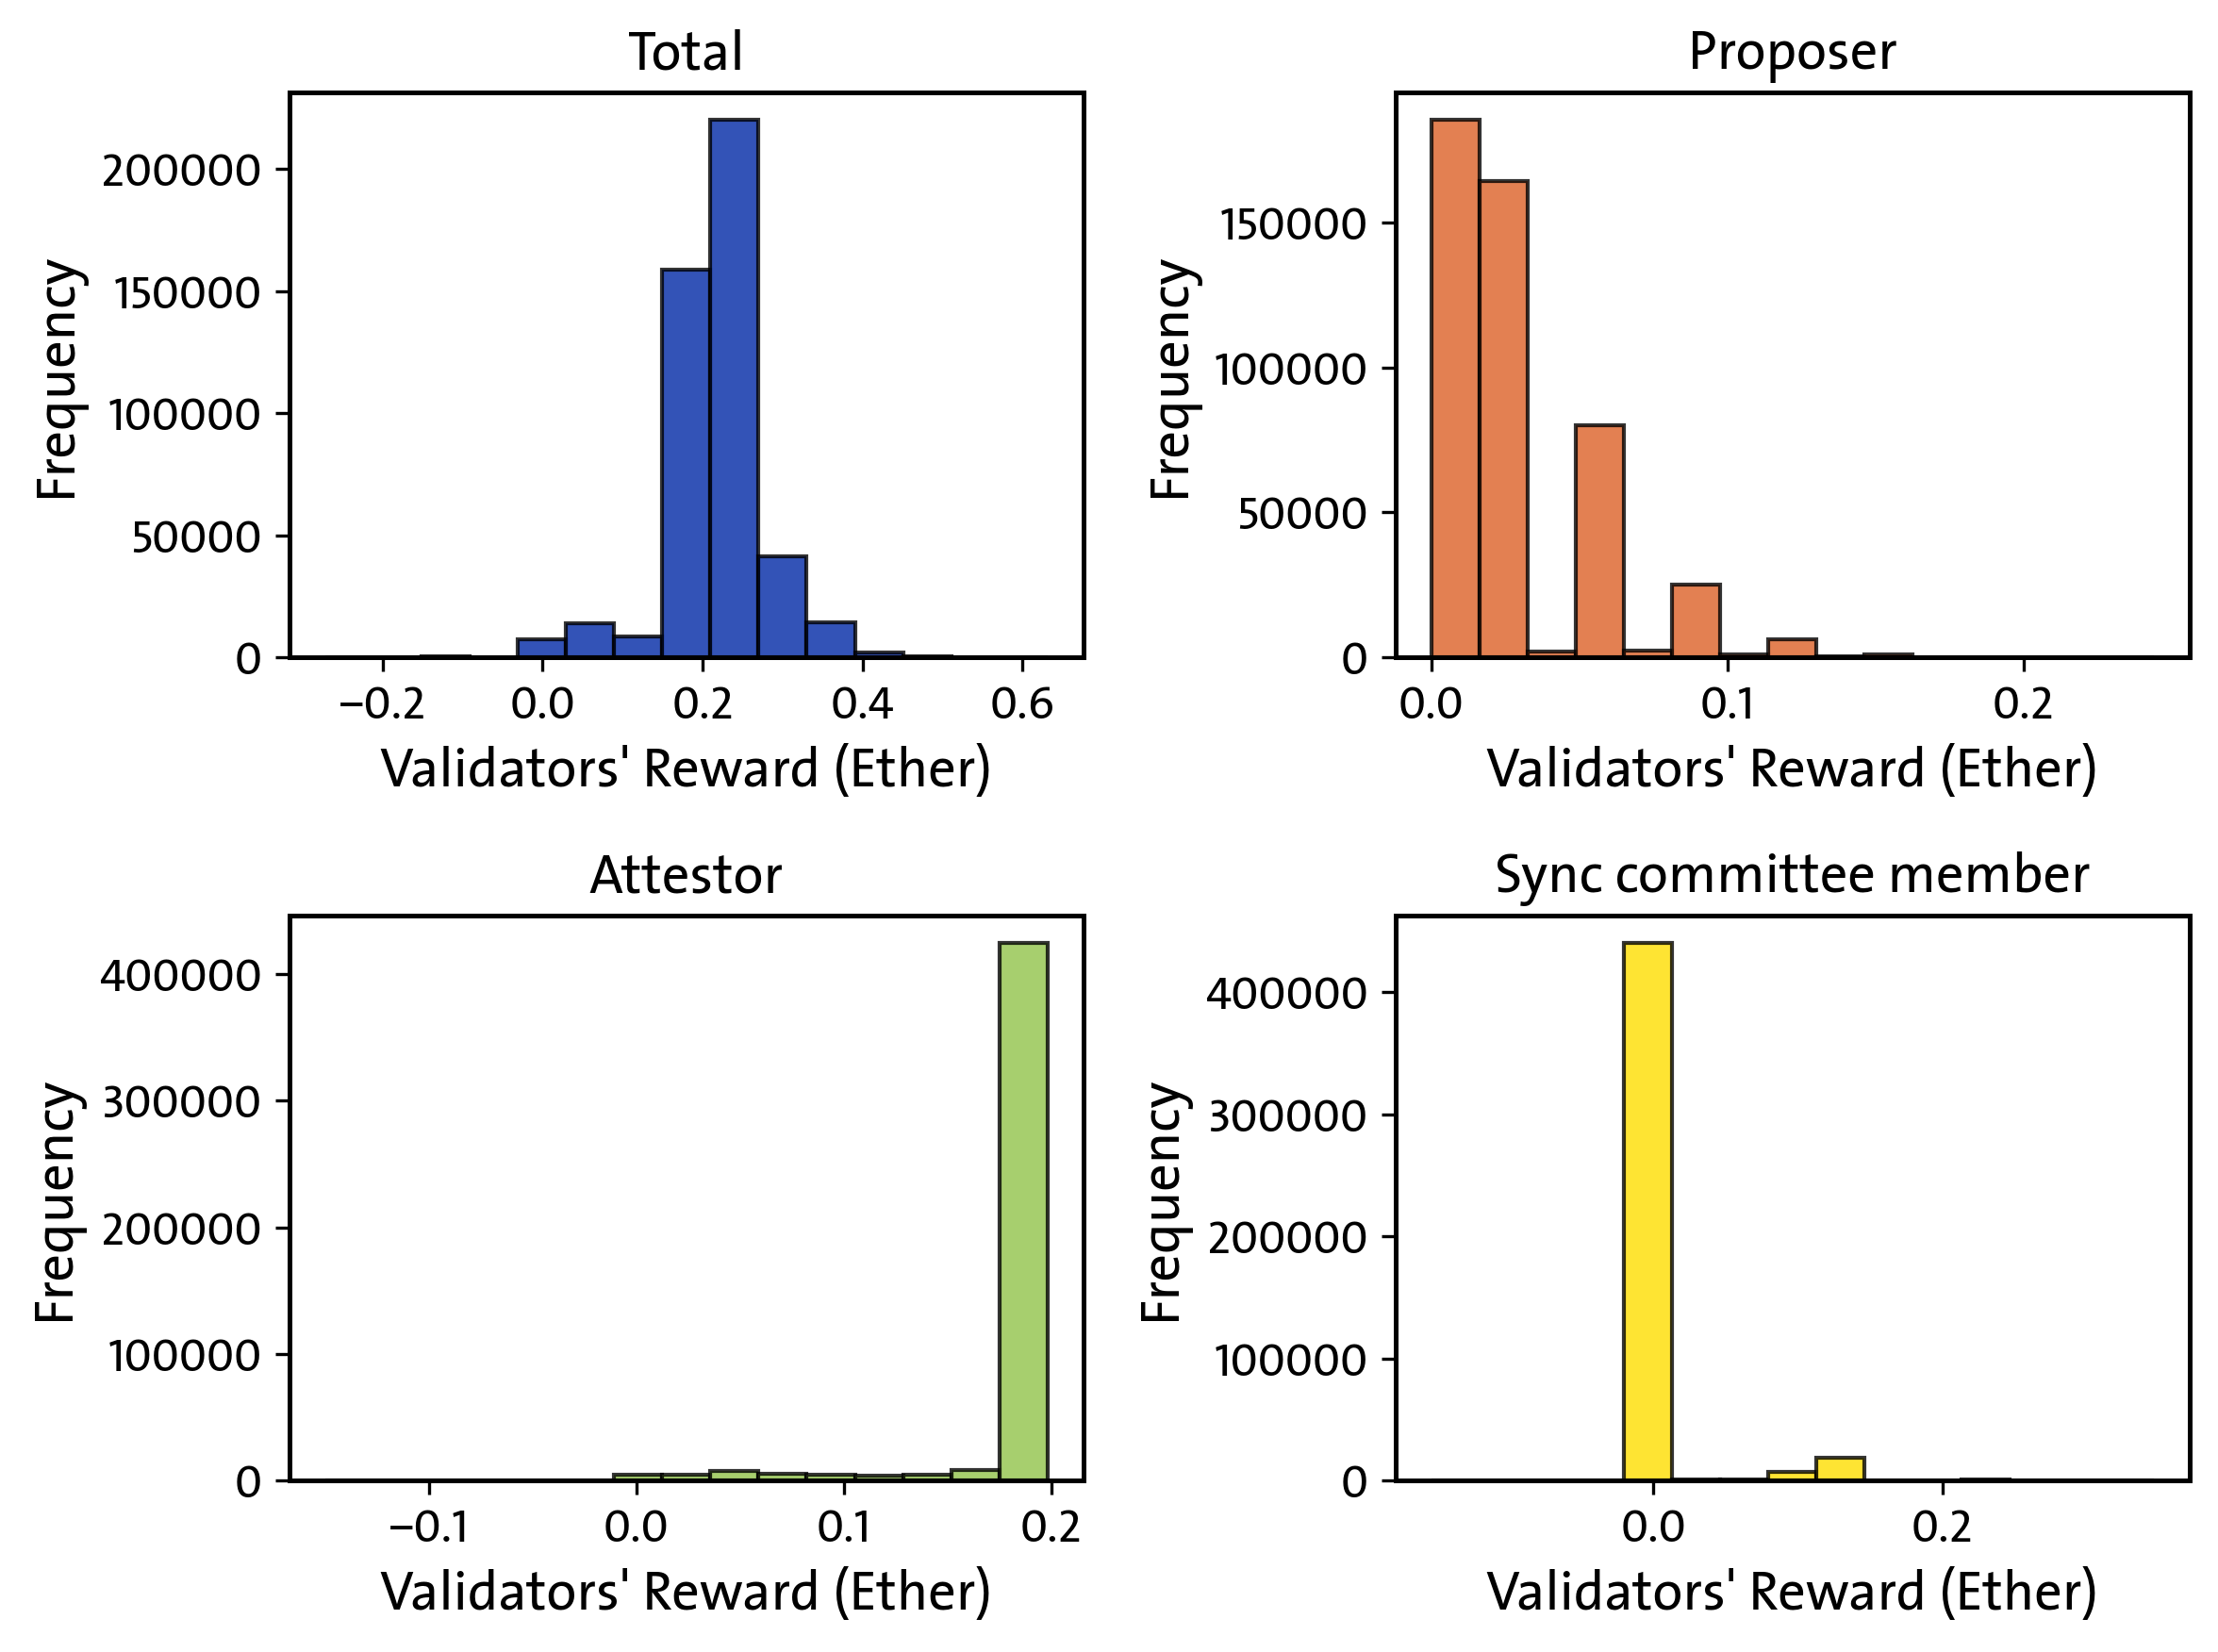

In [11]:
#使用一个 2*2 的子图来画valvalidators_reward的四种 reward的分布
fig, axes = plt.subplots(2,2, figsize=(8, 6))
# Add histograms to each subplot column
labels=['Total','Proposer','Attestor','Sync committee member']
corlor=['#0028a5','#dc6027','#91c34a','#fede00']
for i,j in enumerate(validators_reward.columns[1:5], start=0):
    print(j)
    print(len(validators_reward))
    # if j in ['Proposer reward','Sync committee reward']:
        
    #     validators_reward1=validators_reward[validators_reward[j]!=0]
    #     axes[i//2][i%2].hist(validators_reward1[j], bins=15, alpha=0.8, label=labels[i], edgecolor='black',color=corlor[i])
    # else:
    #     axes[i//2][i%2].hist(validators_reward[j], bins=15, alpha=0.8, label=labels[i], edgecolor='black',color=corlor[i])
    axes[i//2][i%2].hist(validators_reward[j], bins=15, alpha=0.8, label=labels[i], edgecolor='black',color=corlor[i])
    axes[i//2][i%2].set_title(labels[i], fontsize=14)
    axes[i//2][i%2].set_xlabel("Validators' Reward (Ether)",fontsize=14)
    axes[i//2][i%2].set_ylabel('Frequency',fontsize=14)
    # axes[i//2][i%2].grid(zorder=100, lw =0.5)
    # axes[i//2][i%2].legend(fontsize=12)
    plt.tight_layout()
plt.savefig('./new_figures/reward6_distribution_daily_validator.pdf',bbox_inches='tight',dpi=300,facecolor='white')

## Top validator reward change

In [41]:
top10_validators=validators_reward.sort_values(by='Total reward',ascending=False).head(10)['validator_index'].tolist()
top10_validators

[283345, 183569, 96482, 31988, 313675, 159285, 103193, 245107, 177529, 340118]

In [43]:
top10_validator_reward=validators_reward.sort_values(by='Total reward',ascending=False).head(10)
top10_validator_reward

validator_index  Total reward  Proposer reward  Attestation reward  \
282499           283345      0.630899         0.089832            0.197475   
182829           183569      0.626627         0.089006            0.193916   
96209             96482      0.601686         0.060260            0.197428   
31832             31988      0.601638         0.058339            0.197383   
312827           313675      0.594269         0.167370            0.197084   
158549           159285      0.593131         0.059039            0.196517   
102686           103193      0.580725         0.149761            0.197211   
244263           245107      0.578051         0.146828            0.197560   
176789           177529      0.570818         0.030240            0.197618   
339270           340118      0.568887         0.145743            0.197097   

        Sync committee reward  
282499               0.343592  
182829               0.343705  
96209                0.343998  
31832                0.345916  
312827               0.229815  
158549               0.337576  
102686               0.233753  
244263               0.233664  
176789               0.342960  
339270               0.226048

In [44]:
top10_validator_reward.set_index('validator_index', inplace=True)


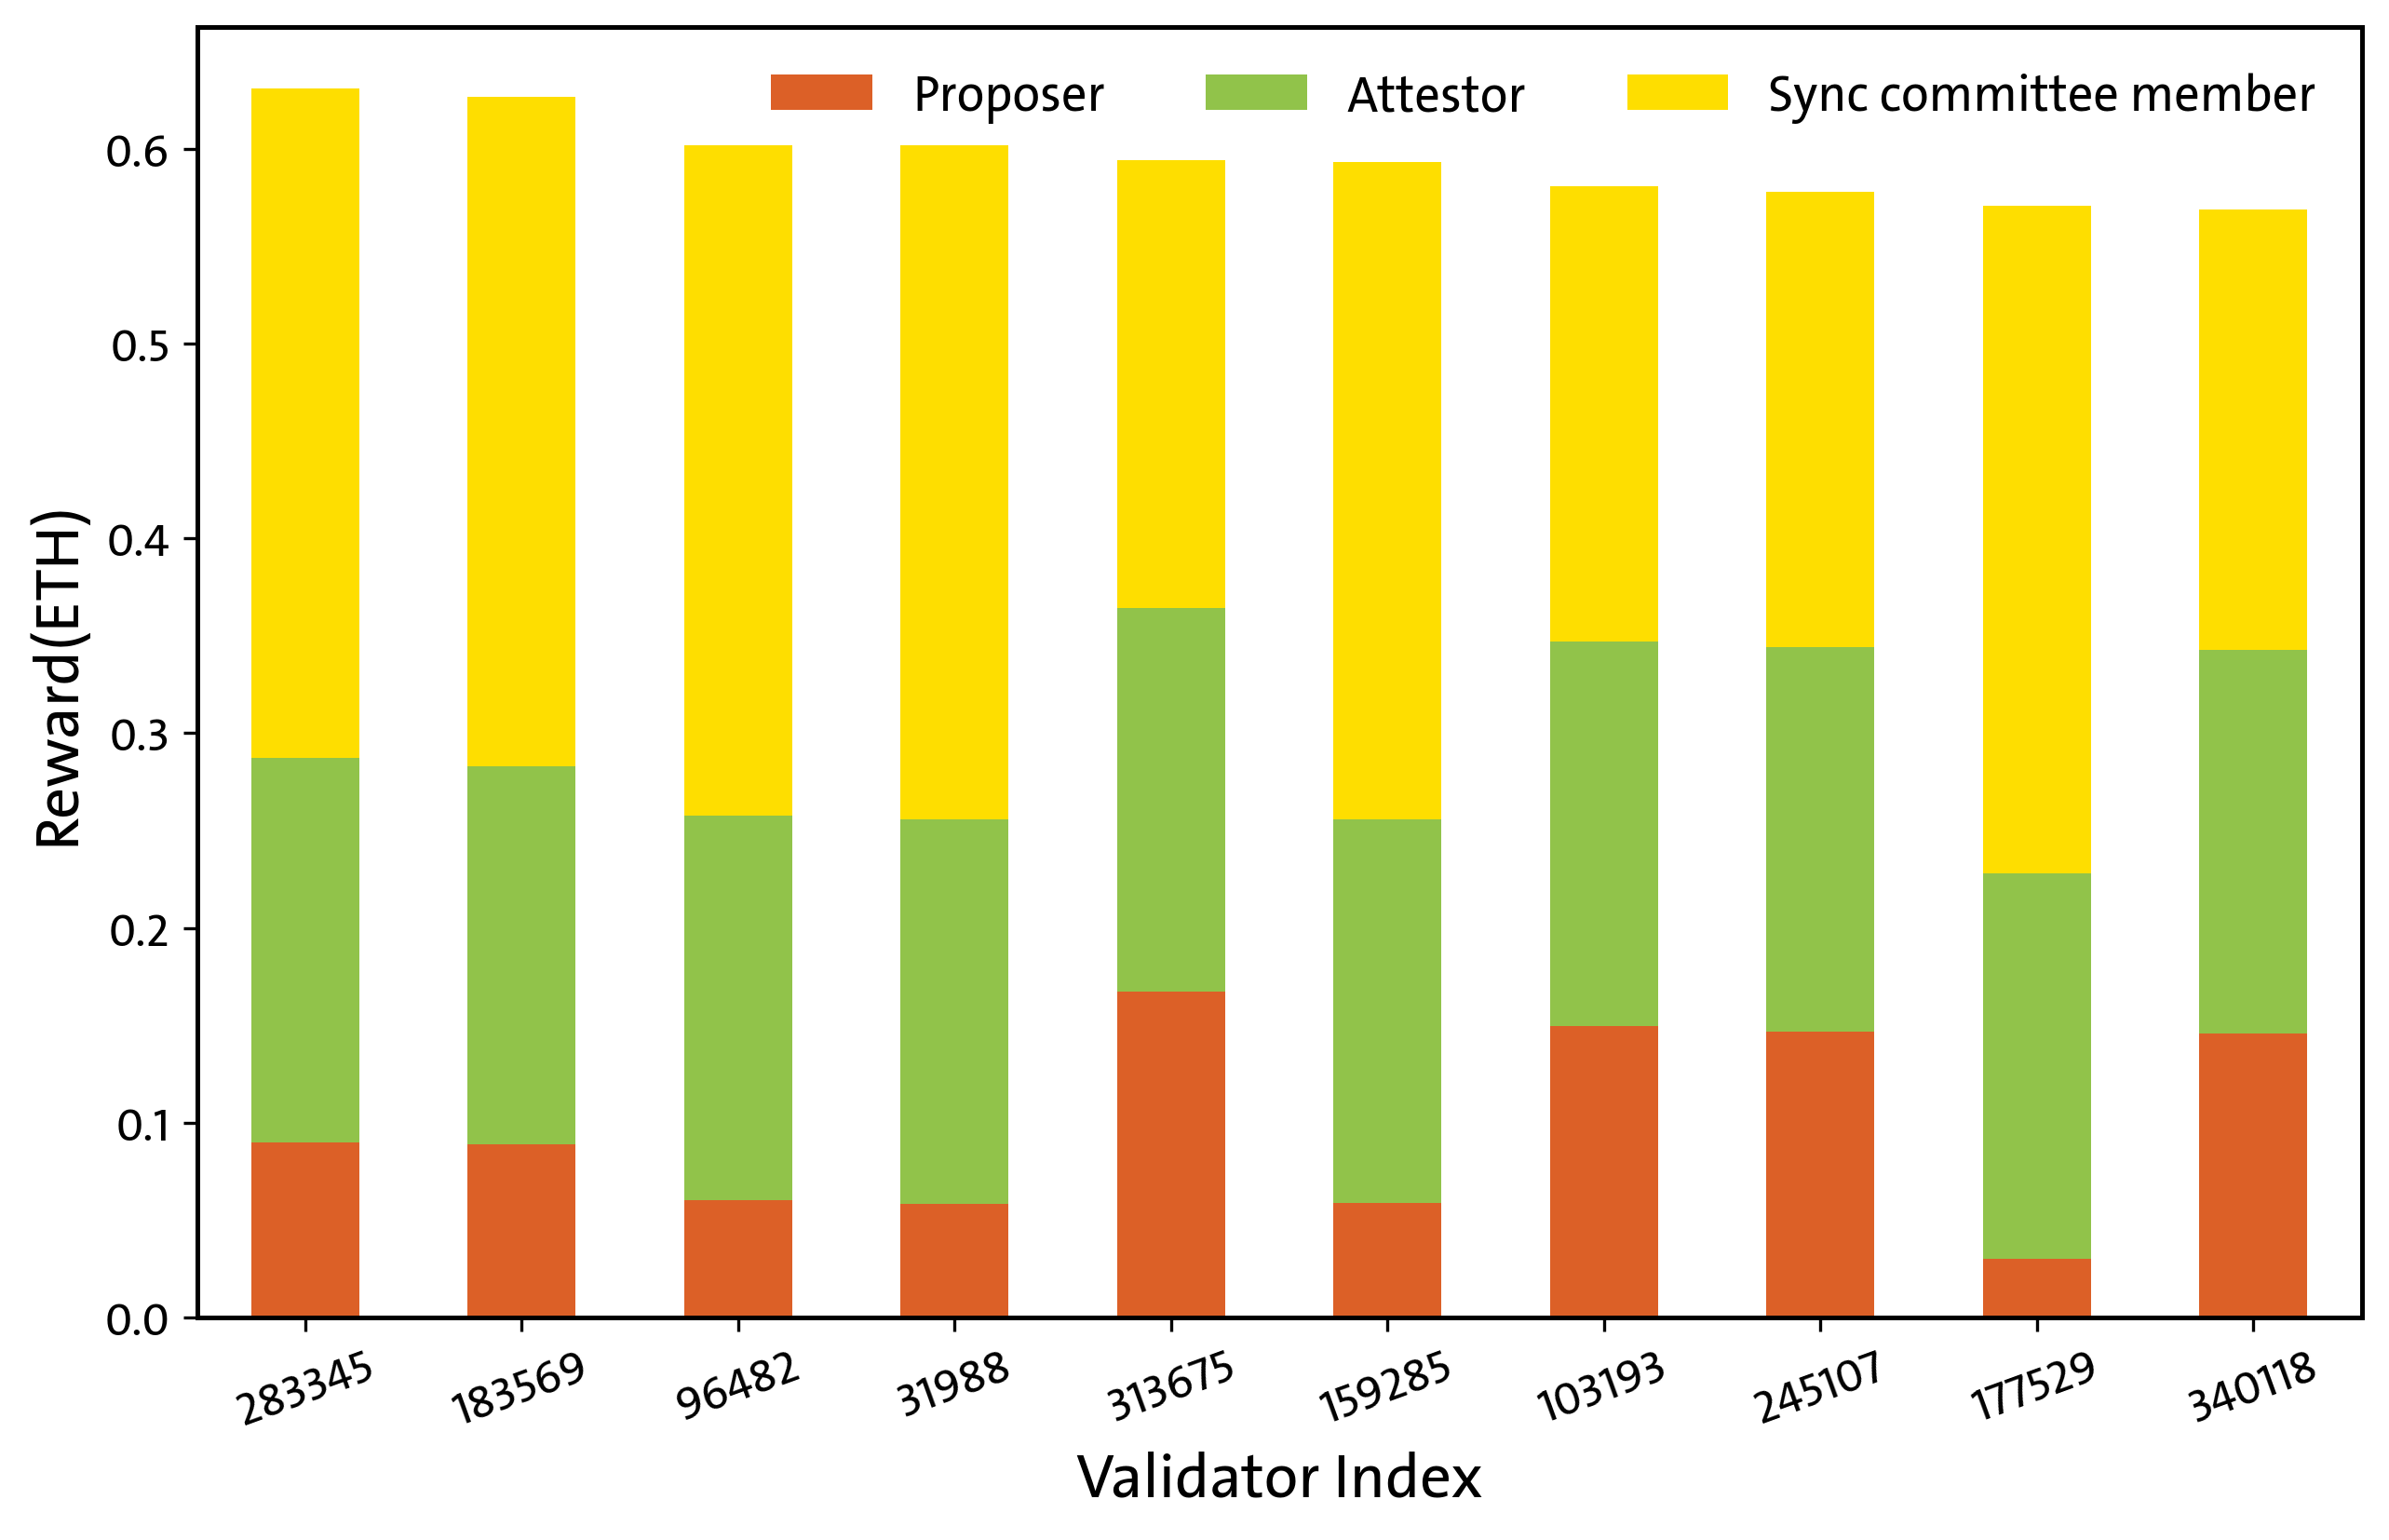

In [47]:
#画一个堆叠 Bar图来显示各个 validator 的 reward 分布
# 创建堆积条形图
top10_validator_reward1=top10_validator_reward[['Proposer reward','Attestation reward','Sync committee reward']]
top10_validator_reward1.rename(columns={'Proposer reward':'Proposer','Attestation reward':'Attestor','Sync committee reward':'Sync committee member'},inplace=True)
ax = top10_validator_reward1.plot(kind='bar', stacked=True, figsize=(10, 6),color=['#dc6027','#91c34a','#fede00'])
# 设置图形标签和标题
ax.legend(ncol=3,fontsize=13,frameon=False)
ax.set_xlabel('Validator Index')
ax.set_ylabel('Reward(ETH)')
ax.tick_params(axis='x', rotation=20)
plt.savefig('./reward7_stacked_bar_daily_validator.pdf',bbox_inches='tight',dpi=300,facecolor='white')
# ax.set_title('Stacked Bar Chart for Rewards by Validator Index')

### 这10 个 validator 的每天的累计财富变化

说明 累计 reward 的变化主要来自于什么 reward

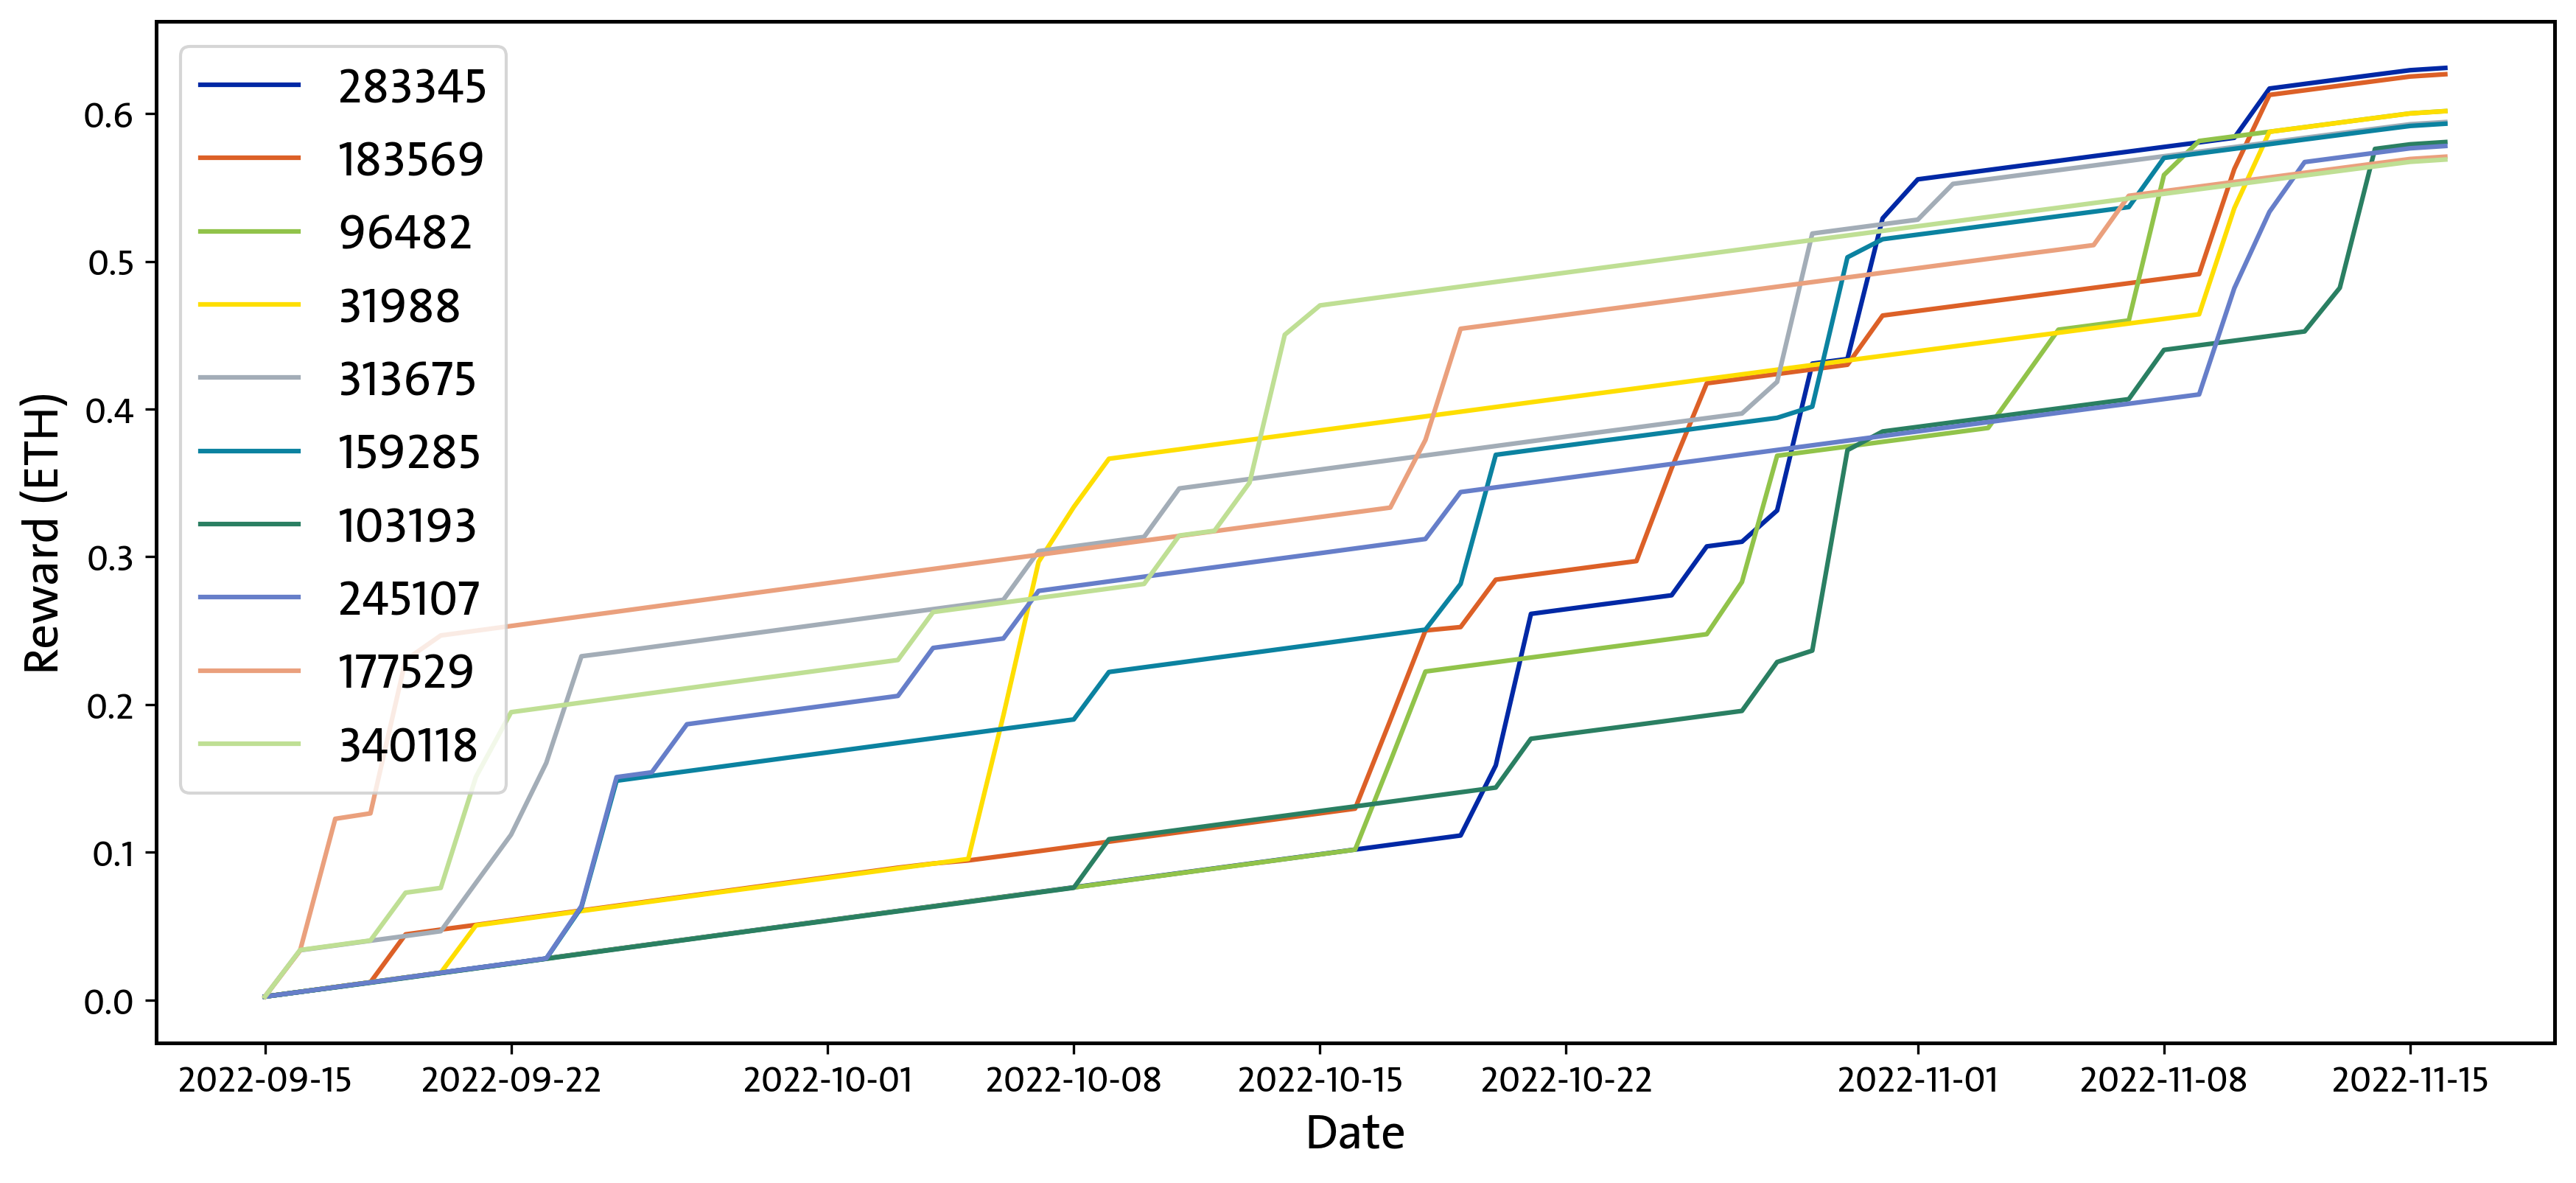

In [48]:
validator_daily_reward=df.groupby(['validator_index','date'])[['Total reward','Proposer reward','Attestation reward','Sync committee reward']].sum().reset_index()
#计算validator_daily_reward中每种 reward 的累计和
validator_daily_reward['Accumulative total reward']=validator_daily_reward.groupby('validator_index')['Total reward'].cumsum()
validator_daily_reward['Accumulative proposer reward']=validator_daily_reward.groupby('validator_index')['Proposer reward'].cumsum()
validator_daily_reward['Accumulative attestation reward']=validator_daily_reward.groupby('validator_index')['Attestation reward'].cumsum()
validator_daily_reward['Accumulative sync committee reward']=validator_daily_reward.groupby('validator_index')['Sync committee reward'].cumsum()
fig,ax=plt.subplots(figsize=(14,6),dpi=300)
validator_daily_reward['date']=pd.to_datetime(validator_daily_reward['date'])
for i in top10_validators:
    # validator_daily_reward[validator_daily_reward['validator_index']==i].plot(x='date',y='Accumulative total reward',ax=ax,label=i)
    ax.plot(validator_daily_reward[validator_daily_reward['validator_index']==i]['date'],validator_daily_reward[validator_daily_reward['validator_index']==i]['Accumulative total reward'],label=i,lw=1.5)
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Reward (ETH)',fontsize=16)
ax.legend(fontsize=16)
#x轴从 2022-09-16 开始
plt.savefig('./reward7_daily_top_validator.pdf',bbox_inches='tight',dpi=300,facecolor='white')

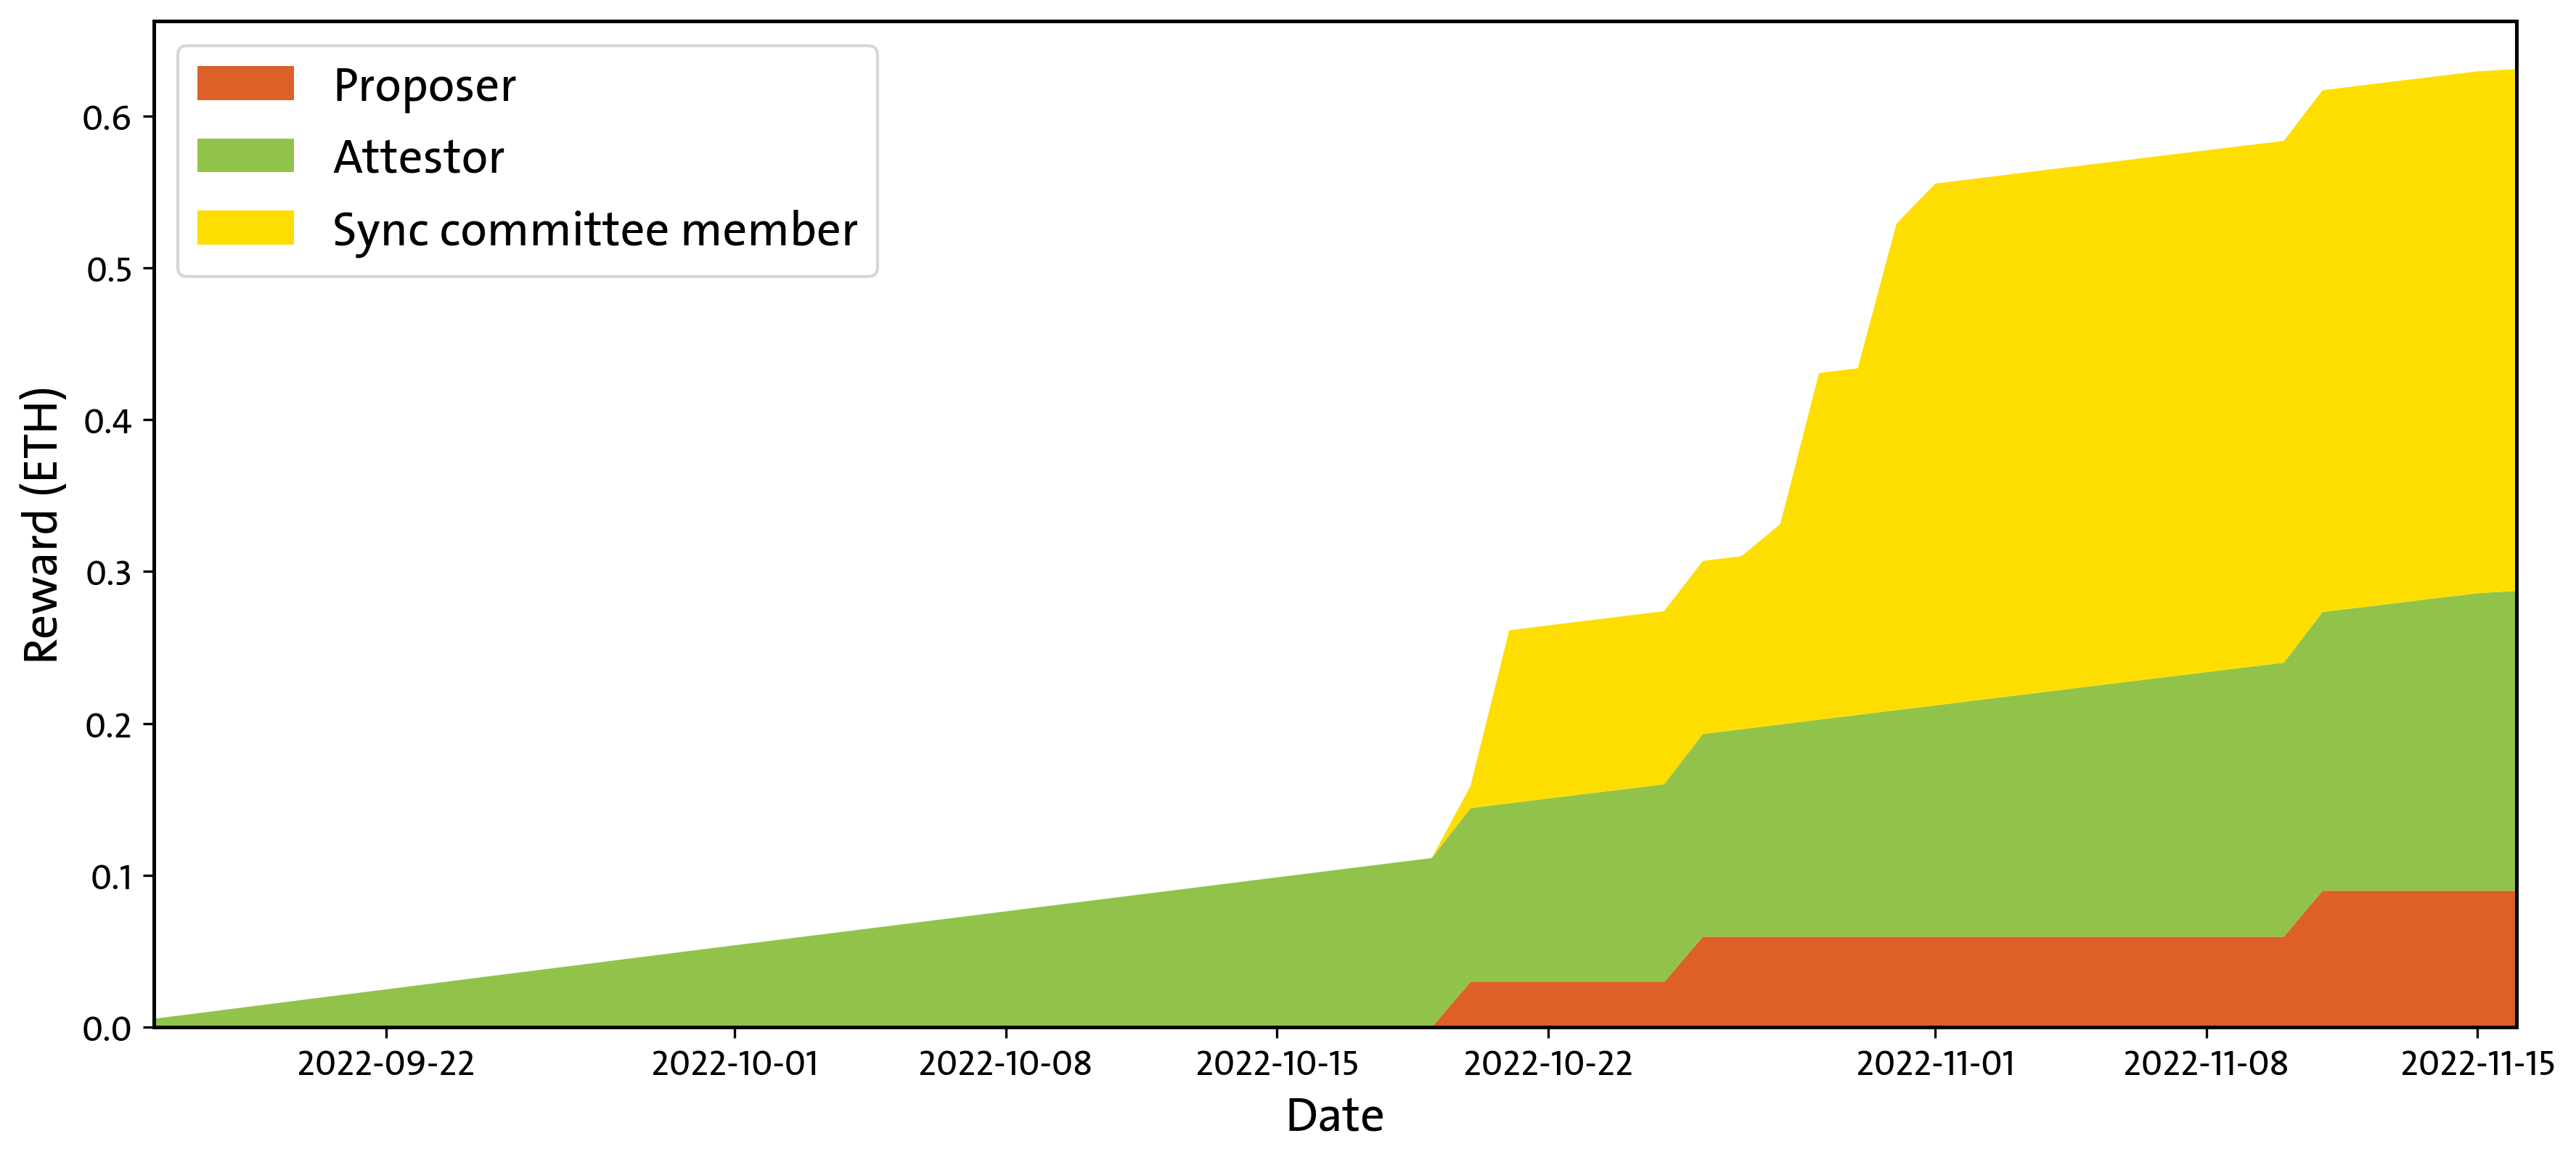

In [49]:
#画一个 validator 的 reward 的累计分布图，横轴是 时间，纵轴是 各类reward
fig,ax=plt.subplots(figsize=(14,6),dpi=300)
validator_daily_reward['date']=pd.to_datetime(validator_daily_reward['date'])
for i in top10_validators[:1]:
    #画proposer,attestation, sync committee reward 的堆叠图
    ax.stackplot(validator_daily_reward[validator_daily_reward['validator_index']==i]['date'],validator_daily_reward[validator_daily_reward['validator_index']==i]['Accumulative proposer reward'],
                 validator_daily_reward[validator_daily_reward['validator_index']==i]['Accumulative attestation reward'],
                 validator_daily_reward[validator_daily_reward['validator_index']==i]['Accumulative sync committee reward'],
                 labels=['Proposer','Attestor','Sync committee member'],colors=['#dc6027','#91c34a','#fede00'])
ax.set_xlabel('Date',fontsize=16)   
ax.set_ylabel('Reward (ETH)',fontsize=16)
ax.legend(fontsize=16,loc='upper left')
#x轴从 2022-09-16 开始
ax.set_xlim(left=validator_daily_reward['date'].iloc[0])
ax.set_xlim(right=validator_daily_reward['date'].iloc[-1])
plt.savefig('./reward8_daily_top_validator.pdf',bbox_inches='tight',dpi=300,facecolor='white')

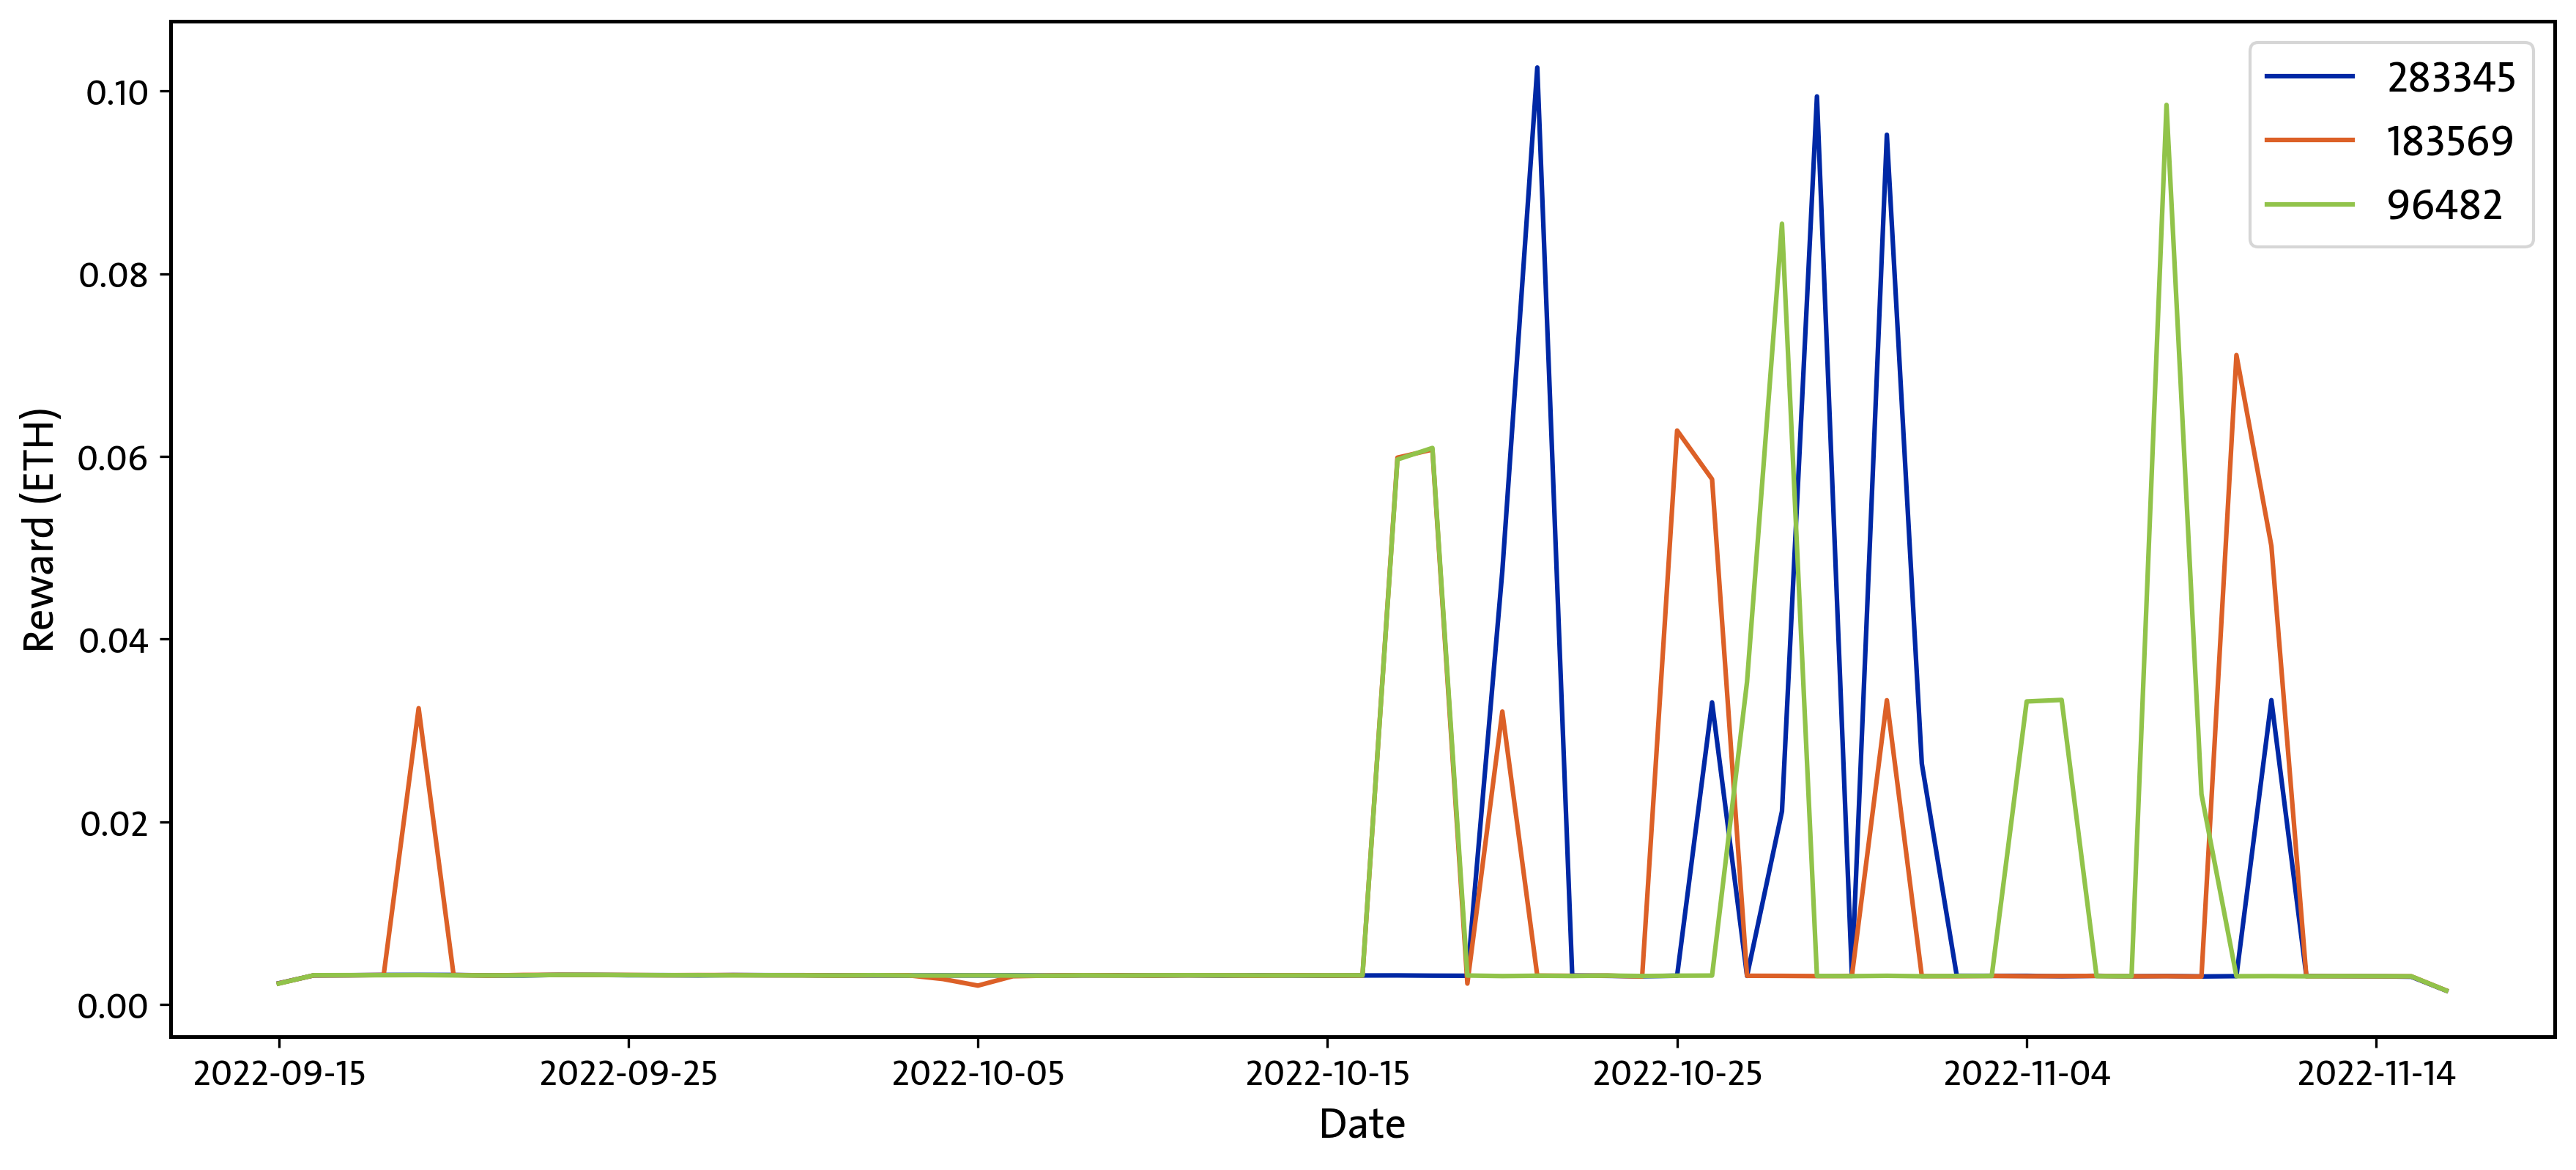

In [154]:
# validator_daily_reward=df.groupby(['validator_index','date'])[['Total reward','Proposer reward','Attestation reward','Sync committee reward']].sum().reset_index()
# fig,ax=plt.subplots(figsize=(14,6),dpi=300)
# for i in top10_validators:
#     validator_daily_reward[validator_daily_reward['validator_index']==i].plot(x='date',y='Total reward',ax=ax,label=i)
# ax.set_xlabel('Date',fontsize=14)
# ax.set_ylabel('Reward (ETH)',fontsize=14)
# ax.legend(fontsize=14)
# #x轴从 2022-09-16 开始
# plt.savefig('./new_figures/reward7_daily_top_validator.pdf',bbox_inches='tight',dpi=300,facecolor='white')
# # ax.set_title('Daily reward',fontsize=14)


### 每参与一次 propose,attest,sync 能得到的每天的平均奖励

In [155]:
df.shape

(28149005, 6)

In [193]:
df.head(2)

date  validator_index  Total reward  Proposer reward  \
0  2022-09-15                1      0.002300              0.0   
1  2022-09-15                2      0.002276              0.0   

   Attestation reward  Sync committee reward  
0            0.002300                    0.0  
1            0.002276                    0.0

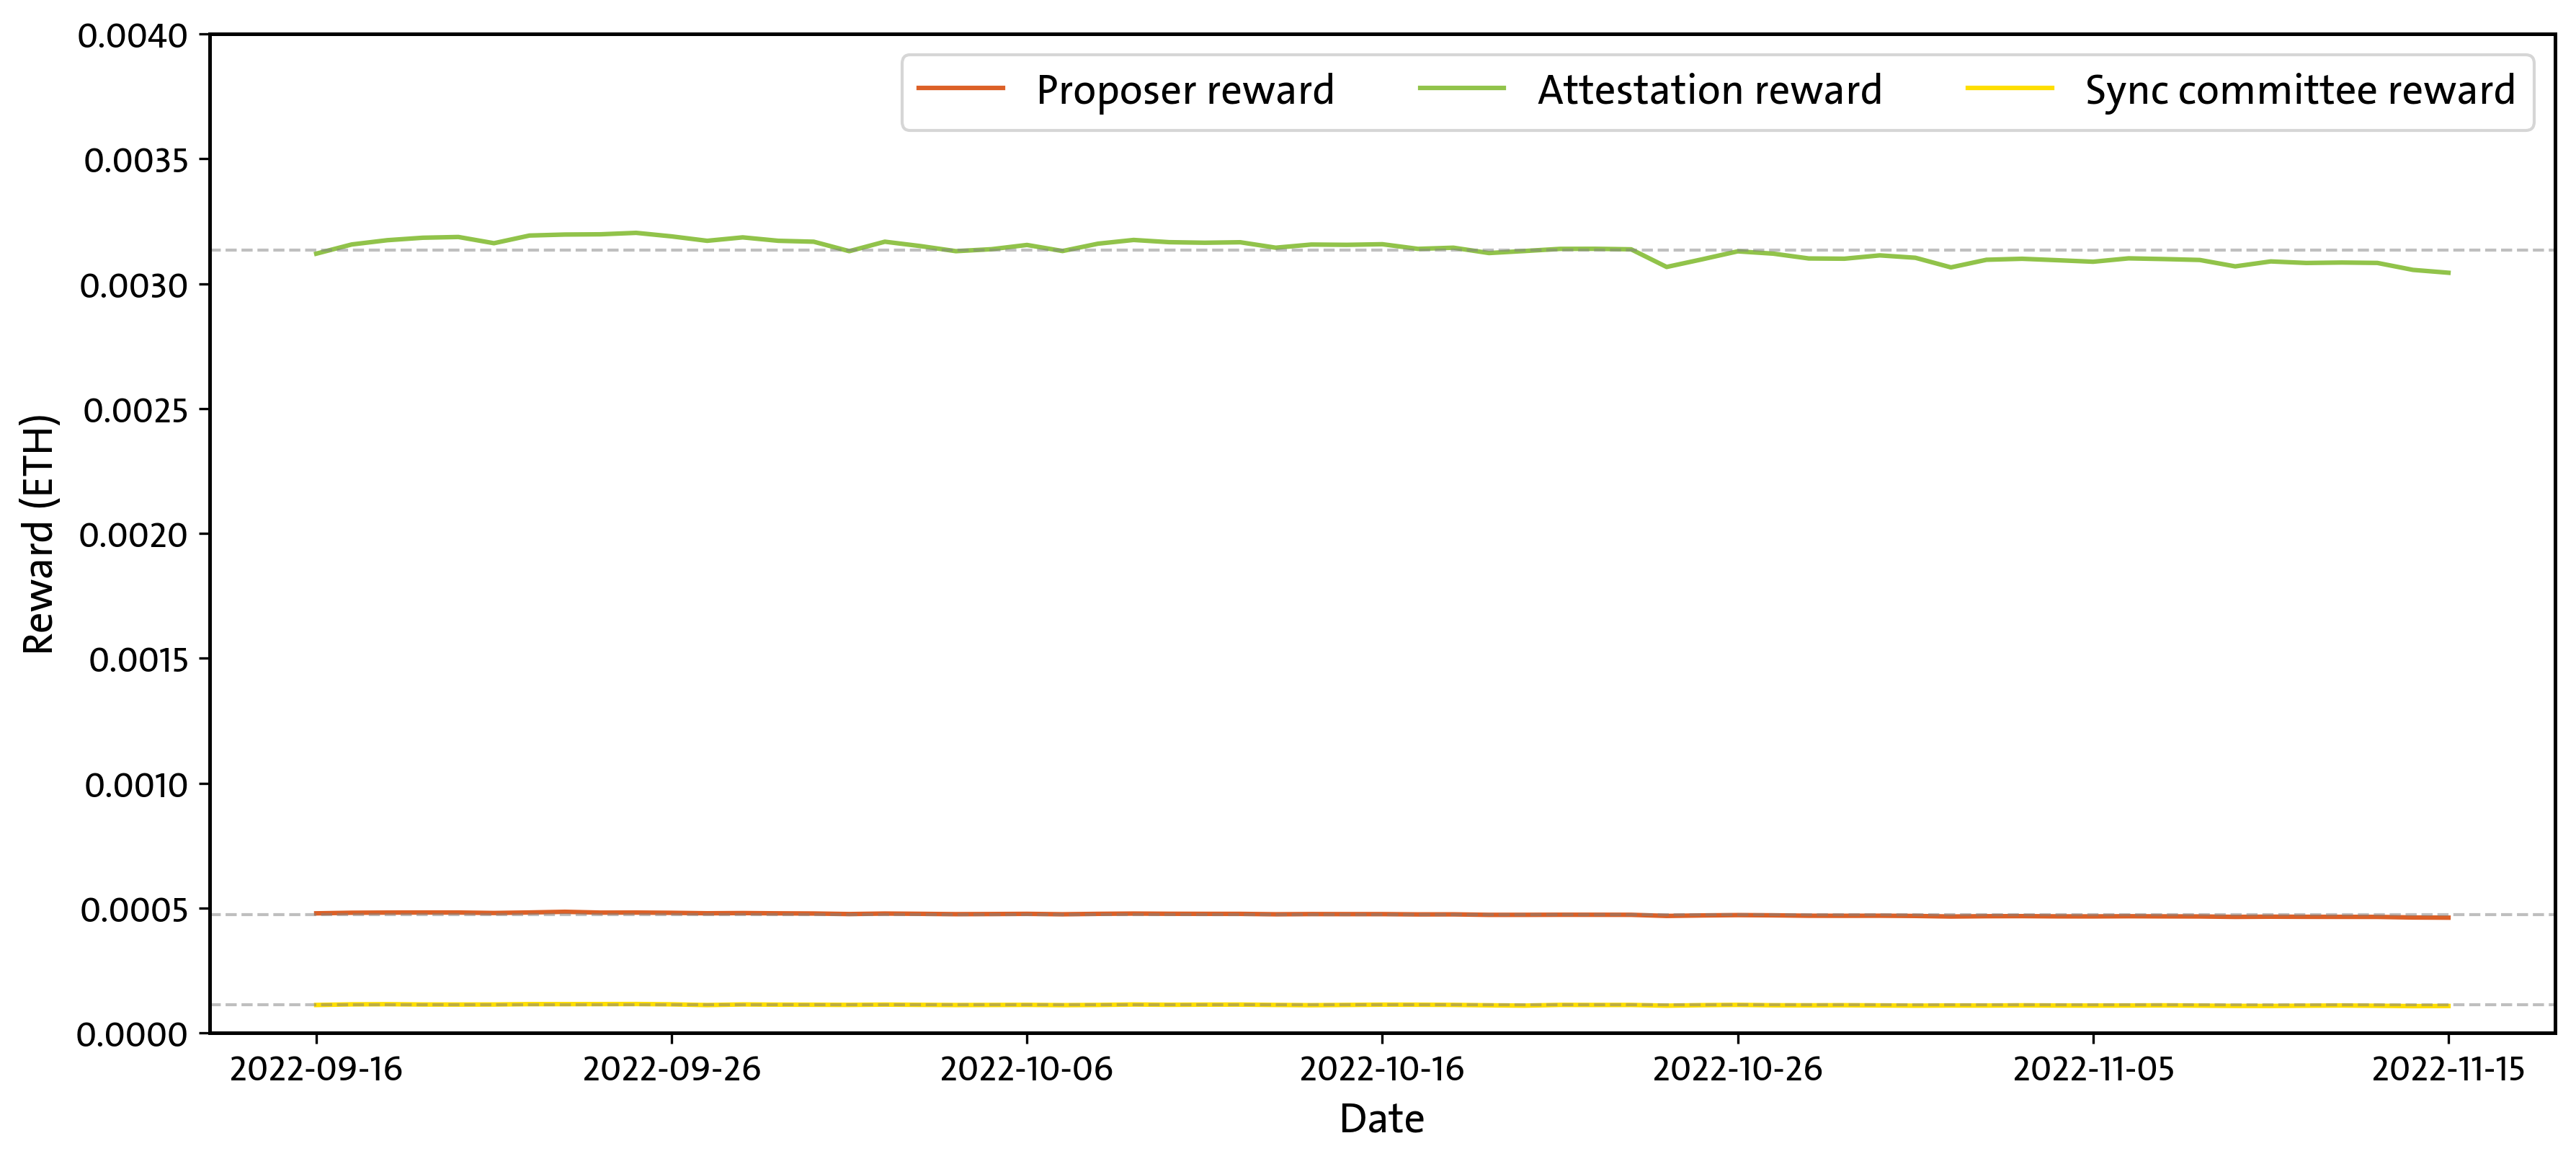

In [192]:
import numpy as np
reward_each_participation_daily=df.groupby(['date'])[['Total reward','Proposer reward','Attestation reward','Sync committee reward']].mean().reset_index()
reward_each_participation_daily=reward_each_participation_daily[(reward_each_participation_daily['date']>'2022-09-15') & (reward_each_participation_daily['date']<'2022-11-16')]
#reward_each_participation_daily 中的 reward 画图显示
colors_1=['#fede00','#91c34a','#dc6027']
fig,ax=plt.subplots(figsize=(14,6),dpi=300)
for i in reward_each_participation_daily.columns[2:5]:
    reward_each_participation_daily.plot(x='date',y=i,ax=ax,label=i,color=colors_1.pop())
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Reward (ETH)',fontsize=14)
ax.legend(fontsize=14,ncol=4)
ax.set_ylim(0,0.004)
# ax.set_yscale('log')
# #把 y 轴的范围改为10的负4次方到10的负2次方
# ax.set_ylim(10**-4,10**-2)
#x轴从 2022-09-16 开始
#在图中显示 3 种 reward 的平均值，只显示值，不显示线
for i in reward_each_participation_daily.columns[2:5]:
    ax.axhline(y=reward_each_participation_daily[i].mean(),color='gray',linestyle='--',label=i,linewidth=1,alpha=0.5)

plt.savefig('./new_figures/reward8_daily_reward_each_participation.pdf',bbox_inches='tight',dpi=300,facecolor='white')


In [157]:
reward_each_participation_daily

validator_index        date  Total reward  Proposer reward  \
0                       0  2022-09-16      0.003212              0.0   
1                       0  2022-09-17      0.003220              0.0   
2                       0  2022-09-18      0.003259              0.0   
3                       0  2022-09-19      0.003248              0.0   
4                       0  2022-09-20      0.003242              0.0   
...                   ...         ...           ...              ...   
28149000           469395  2022-11-16      0.000014              0.0   
28149001           469396  2022-11-16      0.000014              0.0   
28149002           469397  2022-11-16      0.000014              0.0   
28149003           469398  2022-11-16      0.000014              0.0   
28149004           469399  2022-11-16      0.000014              0.0   

          Attestation reward  Sync committee reward  
0                   0.003212                    0.0  
1                   0.003220                    0.0  
2                   0.003259                    0.0  
3                   0.003248                    0.0  
4                   0.003242                    0.0  
...                      ...                    ...  
28149000            0.000014                    0.0  
28149001            0.000014                    0.0  
28149002            0.000014                    0.0  
28149003            0.000014                    0.0  
28149004            0.000014                    0.0  

[28149005 rows x 6 columns]

In [194]:
reward_each_participation_daily[['Proposer reward','Attestation reward','Sync committee reward']].mean()

Proposer reward          0.000474
Attestation reward       0.003134
Sync committee reward    0.000112
dtype: float64

In [6]:
# df.groupby('date')[['validator_index']].count().reset_index().to_csv('./daily_validator_number_new.csv',index=False)

In [ ]:
vv=df.groupby('date')[['validator_index']].count().reset_index()
#vv 

In [142]:
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'},inplace=True)# Get columns that end with '_reward'

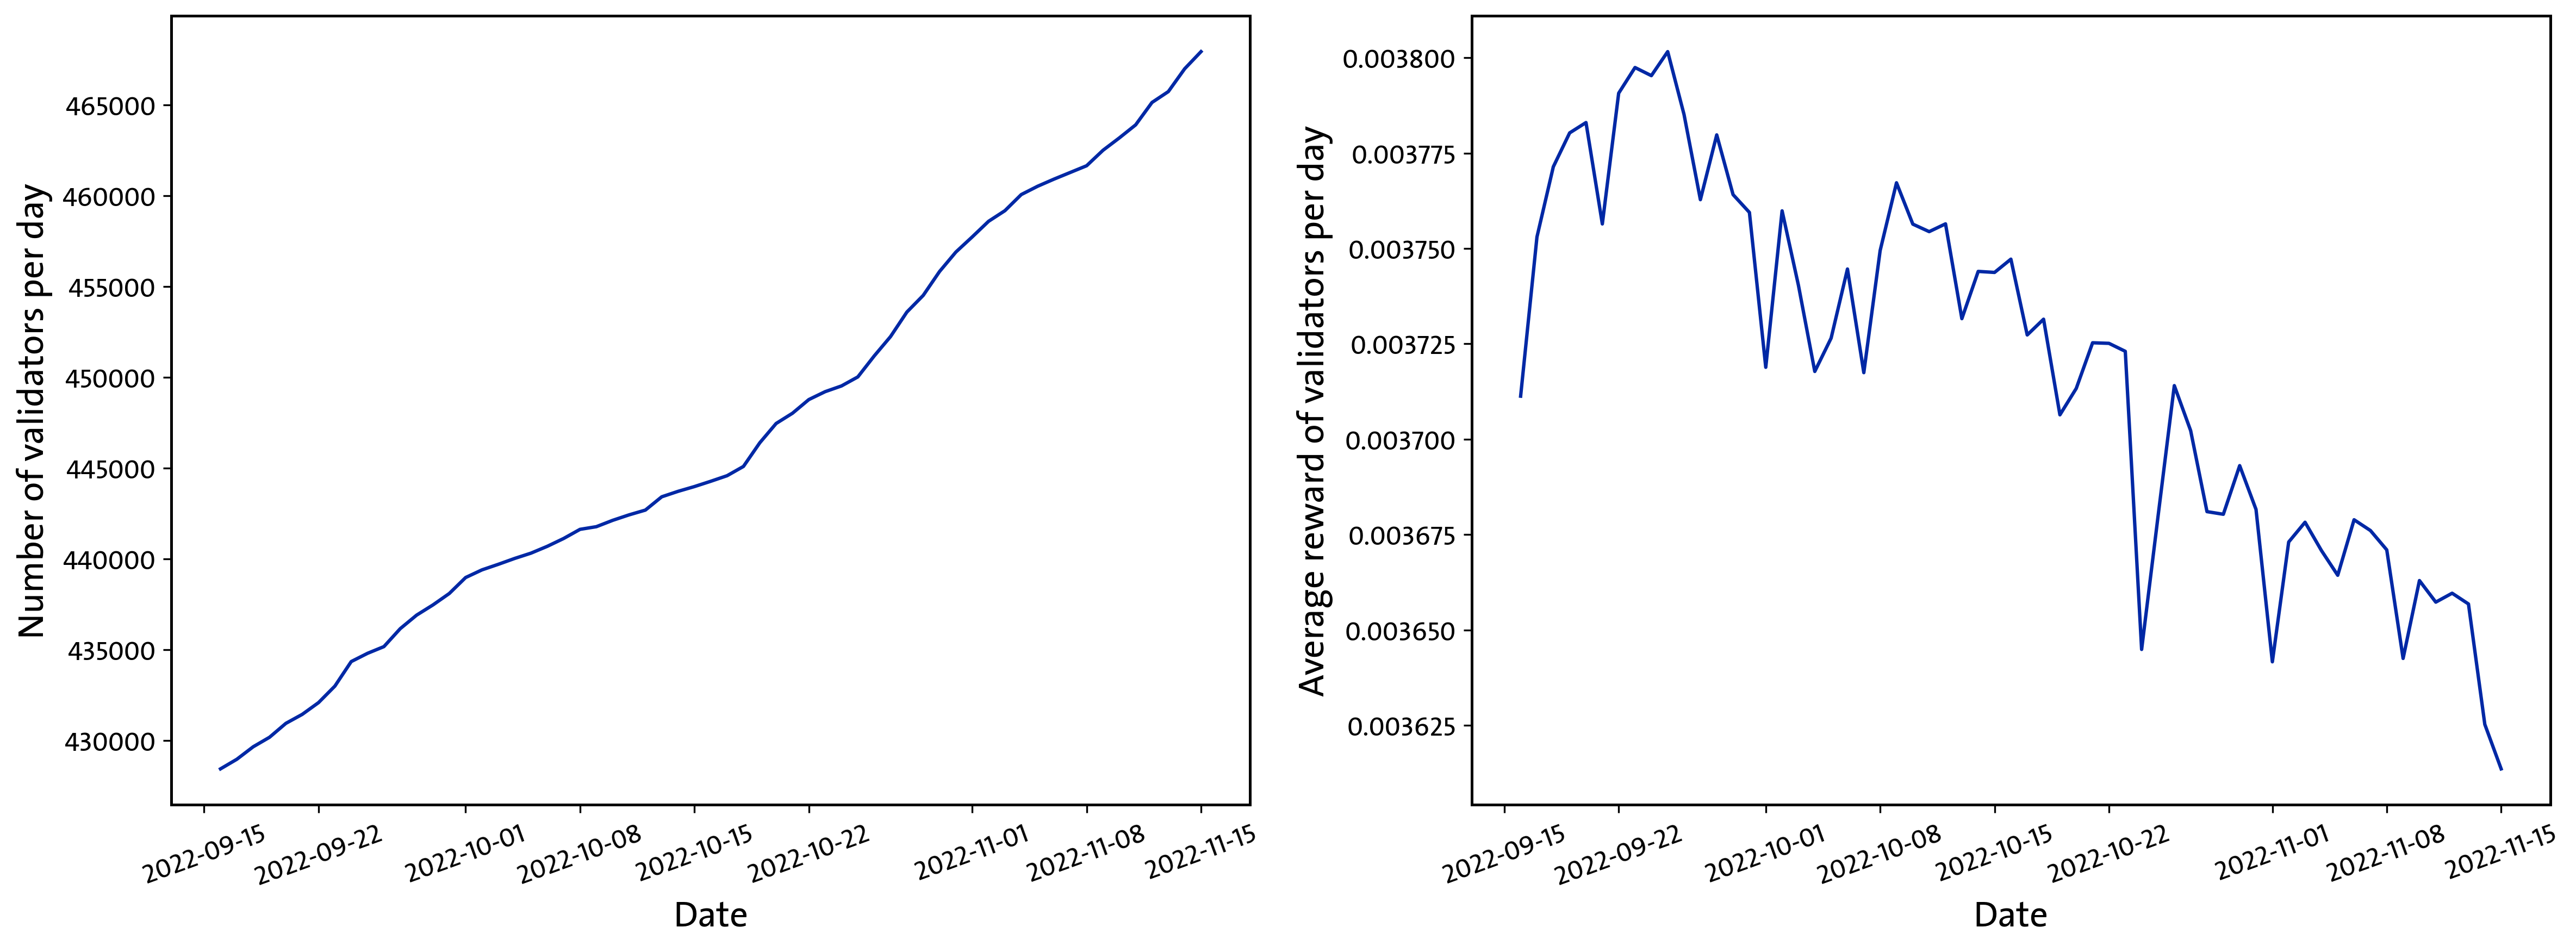

In [52]:
import matplotlib.pyplot as plt
# Sample data, replace with your actual data
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)# Get columns that end with '_reward'
df['date']=pd.to_datetime(df['date'])
df=df[(df['date']>=pd.to_datetime('2022-09-16'))&(df['date']<=pd.to_datetime('2022-11-15'))]
# Calculate the mean of Validator_index by Date
validator_counts = df.groupby('date')['validator_index'].nunique().reset_index()
validator_means = df.groupby('date')['Total reward'].mean().reset_index()

# Create a subplot layout: 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Add line plot to the first subplot
axs[0].plot(validator_counts['date'], validator_counts['validator_index'],lw=1.5)
# axs[0].set_title('Validator Counts over time')
axs[0].set_ylabel('Number of validators per day',fontsize=16)
axs[0].set_xlabel('Date',fontsize=16)
# axs[0].legend(loc='upper left',fontsize=14)
#让axs[0]的 x 轴 tick 自动适应 x 轴的范围
axs[0].autoscale(enable=True, axis='x', tight=True)
#旋转 45 度
axs[0].tick_params(axis='x', rotation=20)

# Add line plot to the second subplot
axs[1].plot(validator_means['date'], validator_means['Total reward'],lw=1.5)
# axs[1].set_title("Average Validator's Reward over Time")
axs[1].set_ylabel("Average reward of validators per day",fontsize=16)
axs[1].set_xlabel('Date',fontsize=16)
# axs[1].legend(loc='upper right',fontsize=14)
axs[1].tick_params(axis='x', rotation=20)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('./new_figures/validator_count_reward_daily.pdf',bbox_inches='tight',dpi=300,facecolor='white')


### index plots

In [151]:
df.shape# 2022-09-16-2022-11-15

(39304460, 6)

In [155]:
data.shape #2022-09-15    2022-11-16

(40200209, 6)

In [156]:
df[df['date']==pd.to_datetime('2022-09-19')]

date  validator_index Total reward Proposer reward  \
2143043 2022-09-19           294643  0.002327517               0   
2143044 2022-09-19           294644  0.002334494               0   
2143045 2022-09-19           294642  0.002334788               0   
2143046 2022-09-19           294641  0.002334827               0   
2143047 2022-09-19           294640  0.002324274               0   
...            ...              ...          ...             ...   
3003321 2022-09-19           149018  0.000913526               0   
3003322 2022-09-19           149017  0.000909881               0   
3003323 2022-09-19           149027  0.000906345               0   
3003324 2022-09-19           149026  0.000913526               0   
3003325 2022-09-19           149023  0.000913526               0   

        Attestation reward Sync committee reward  
2143043        0.002327517                     0  
2143044        0.002334494                     0  
2143045        0.002334788                     0  
2143046        0.002334827                     0  
2143047        0.002324274                     0  
...                    ...                   ...  
3003321        0.000913526                     0  
3003322        0.000909881                     0  
3003323        0.000906345                     0  
3003324        0.000913526                     0  
3003325        0.000913526                     0  

[860283 rows x 6 columns]

## total reward

In [158]:
# set the reward to calculate the index
reward_name ='Total reward'

(array([3.4000000e+01, 6.3000000e+01, 1.4300000e+02, 1.0222700e+05,
        3.8726862e+07, 4.4499800e+05, 1.9729000e+04, 1.0217000e+04,
        1.7500000e+02, 1.2000000e+01]),
 array([-0.10905452, -0.0819677 , -0.05488088, -0.02779406, -0.00070723,
         0.02637959,  0.05346641,  0.08055323,  0.10764006,  0.13472688,
         0.1618137 ]),
 <BarContainer object of 10 artists>)

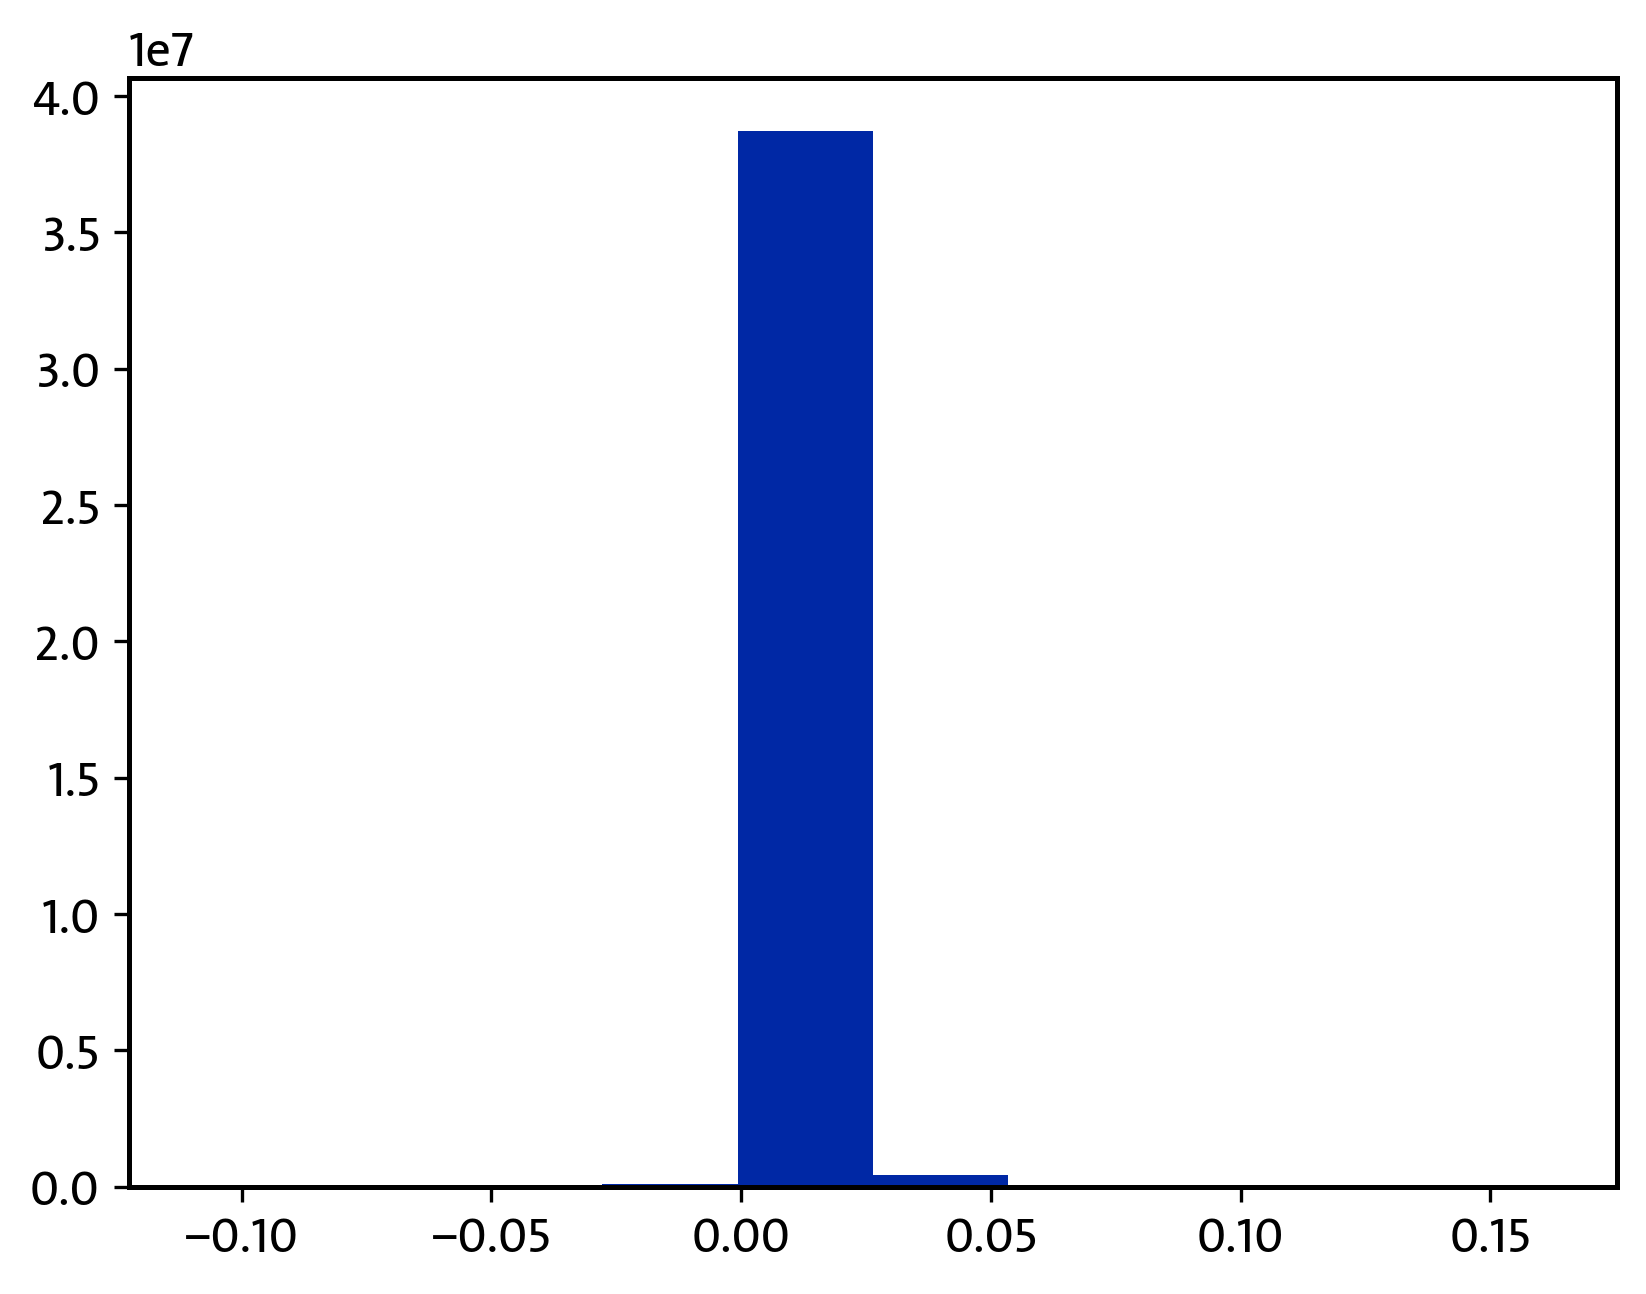

In [168]:
plt.hist(df_total['value'])

In [175]:
xx_oneday=df_total[df_total['Date']==pd.to_datetime('2022-09-21')]

In [179]:
xx_oneday['value']=xx_oneday['value'].apply(float)
xx_oneday['value'].describe()

count    862902.000000
mean          0.001878
std           0.003599
min          -0.069944
25%           0.000188
50%           0.000188
75%           0.003026
max           0.101189
Name: value, dtype: float64

(array([1.00000e+00, 1.00000e+00, 3.00000e+00, 1.69200e+03, 8.53222e+05,
        7.13000e+03, 2.10000e+02, 1.73000e+02, 4.55000e+02, 1.50000e+01]),
 array([-0.06994387, -0.05283055, -0.03571723, -0.01860392, -0.0014906 ,
         0.01562272,  0.03273604,  0.04984935,  0.06696267,  0.08407599,
         0.10118931]),
 <BarContainer object of 10 artists>)

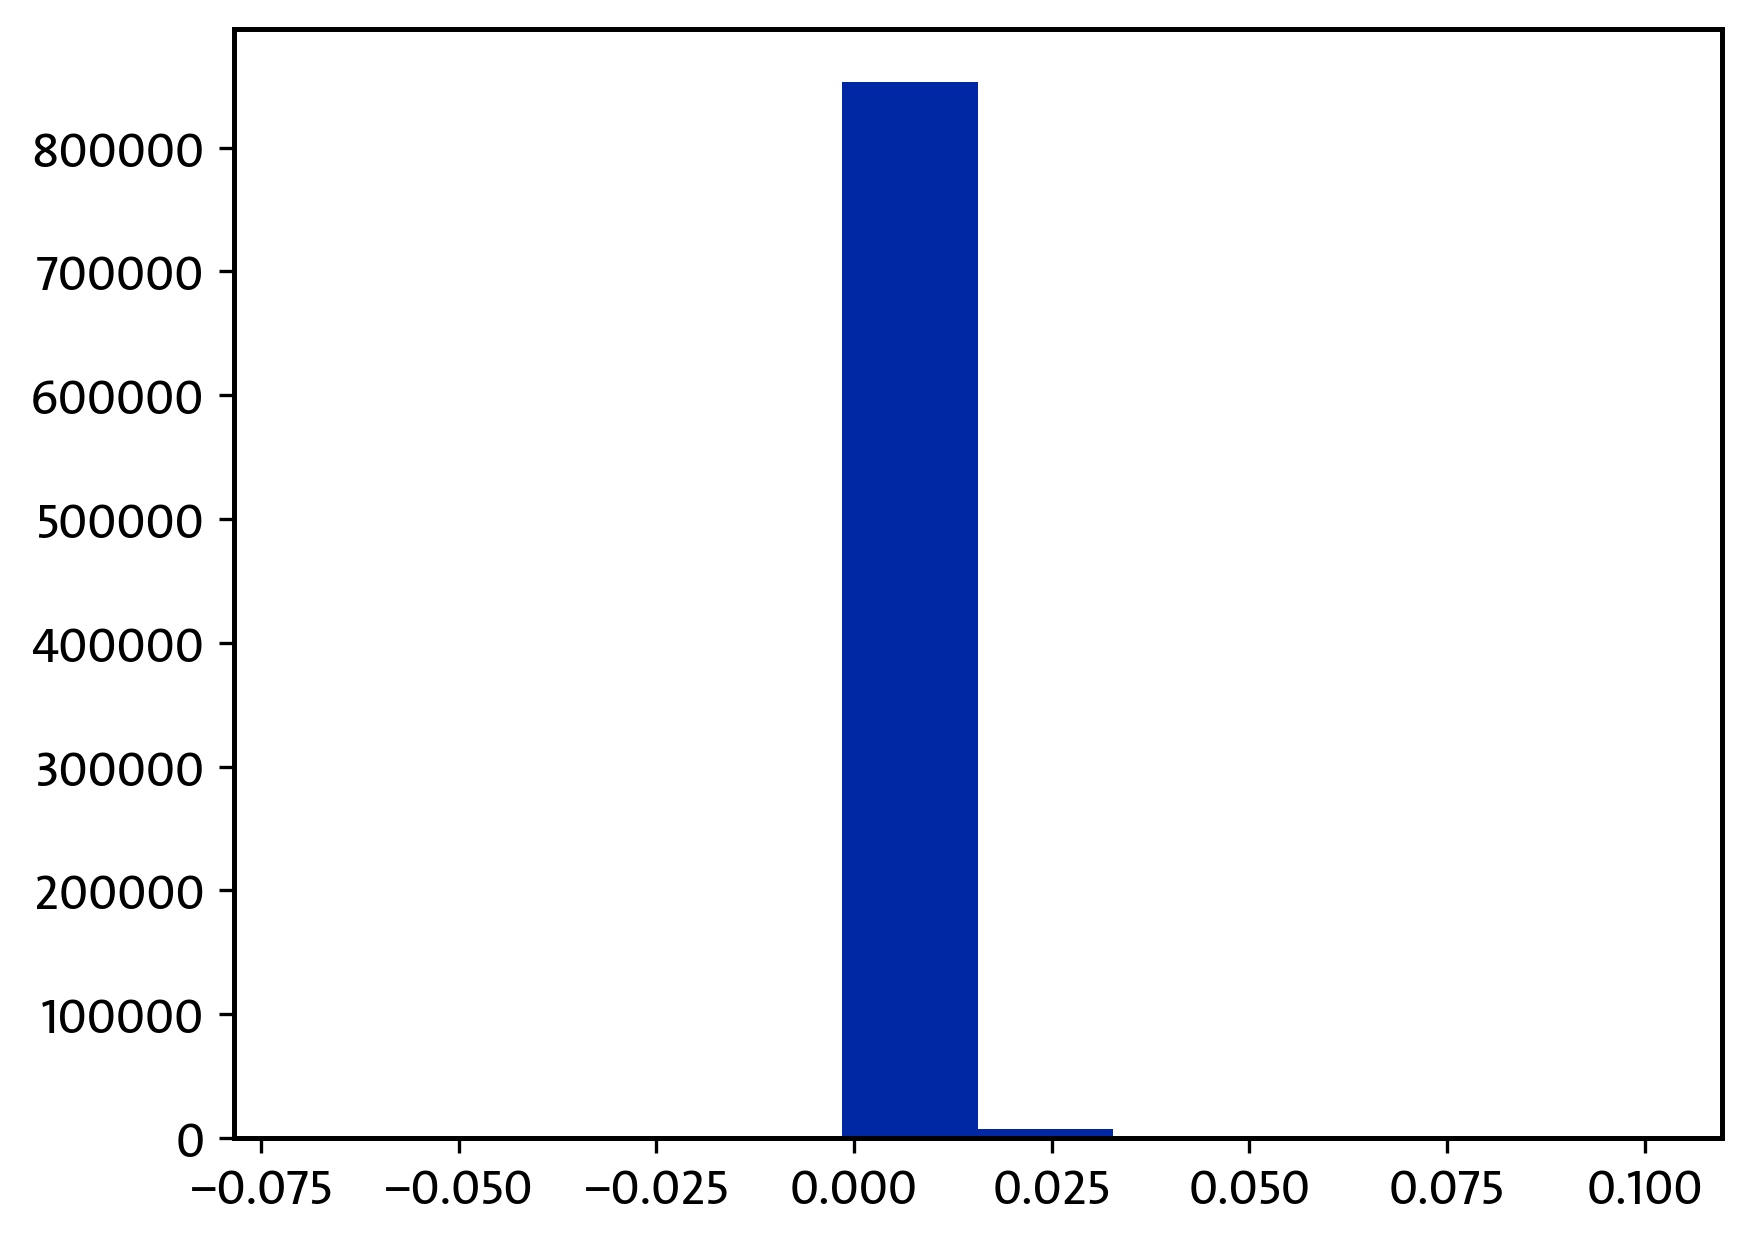

In [176]:
plt.hist(xx_oneday['value'])


In [182]:
xx_oneday.head(2)

Date     value
3434284 2022-09-21  0.002980
3434285 2022-09-21  0.003023

In [159]:
df_total = df[['date',reward_name]]


In [160]:
df_total.columns =['Date','value']

In [216]:
yy=df[df['date']==pd.to_datetime('2022-09-16')]
yy1=yy.groupby(['date','validator_index'])[['Total reward','Proposer reward','Attestation reward','Sync committee reward']].sum().reset_index()
# yy.groupby('validator_index')[['Total reward']].count().sort_values(by='Total reward',ascending=False)

In [217]:
yy1.head(2)

date  validator_index Total reward Proposer reward Attestation reward  \
0 2022-09-16                0  0.003211548               0        0.003211548   
1 2022-09-16                1  0.003215265               0        0.003215265   

  Sync committee reward  
0                     0  
1                     0

In [218]:
yy1[yy1['validator_index']==0]

date  validator_index Total reward Proposer reward Attestation reward  \
0 2022-09-16                0  0.003211548               0        0.003211548   

  Sync committee reward  
0                     0

In [219]:
data[(data['validator_index']==0)&(data['date']=='2022-09-16')]

date  validator_index final_total_reward proposer_total_reward  \
713036  2022-09-16                0        0.003211548                     0   

       attestation_total_reward sync_total_reward  
713036              0.003211548                 0

In [161]:
def index(df):
    df['value'] = df['value'].astype(float)
    df['prop'] = df['value']/df['value'].sum() 
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['value'] = df['value'].astype(float)
    df['prop'] = df['value']/df['value'].sum() 
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'value' not in df.columns:
        return None 
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['value'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df,validator_number):
    df['value'] = df['value'].astype(float)
    df.sort_values(by=['value'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['value']/df['value'].sum() 
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V/validator_number
    except:
        return 0


In [220]:
yy2=yy1[['date','Total reward']]
yy2.rename(columns={'Total reward':'value'},inplace=True)
yy2['value']=yy2['value'].apply(float)
gigi_0925=gini(yy2)

In [221]:
print(gigi_0925)

0.1816498867313916


In [162]:
from datetime import date
start = date(2022,9,15)
end = date(2022,11,15)

In [56]:
"""
def index_calc(data):

            :param data: dataframe containing transaction value and timestamp of the transaction (block_timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index value and date
"""
from tqdm import tqdm
def index_calc(data, start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['Date'].dt.date > start_date) & (data['Date'].dt.date < end_date)].copy())
    return IndexValues
    

In [58]:
data.sort_values(by=['Date'],ascending=True,inplace=True)

In [59]:
data.head(5)

Date  Validator_index  final_total_sum  proposer_total_reward  \
4902107 2022-09-15           107242          2282269                      0   
4938035 2022-09-15           143174          2311335                      0   
4938036 2022-09-15           143175          2336083                      0   
4938037 2022-09-15           143176          2339536                      0   
4938038 2022-09-15           143177          2285473                      0   

         attestation_total_reward  sync_total_reward  
4902107                   2282269                  0  
4938035                   2311335                  0  
4938036                   2336083                  0  
4938037                   2339536                  0  
4938038                   2285473                  0

In [139]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data 
start = date(2022,9,15)
end = date(2022,11,16)
results = index_calc(data,start,end)

  0%|          | 0/63 [00:00<?, ?it/s]

In [123]:
results

val       date
0   343355.884109 2022-09-15
1   351274.247678 2022-09-16
2   648974.785487 2022-09-17
3   342529.276095 2022-09-18
4   585185.586917 2022-09-19
..            ...        ...
57  365539.214555 2022-11-11
58  440961.830361 2022-11-12
59  366709.081461 2022-11-13
60  623858.251846 2022-11-14
61  364911.066073 2022-11-15

[62 rows x 2 columns]

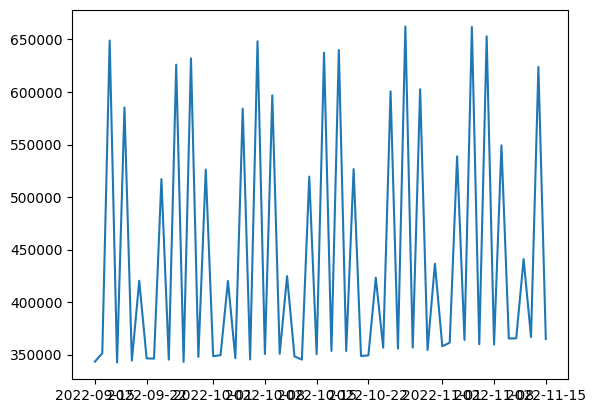

In [124]:
import matplotlib.pyplot as plt
plt.plot(results['date'],results['val'])

In [28]:
results.to_csv('ShannonIndex.csv',index=False)

In [29]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
start = date(2022,9,15)
end = date(2022,11,15)
results_HHI = index_calc(data,start,end,HHI)
results_HHI.to_csv('HHI_Index.csv',index=False)

100%|██████████| 62/62 [09:04<00:00,  8.78s/it]


In [31]:
results_HHI

val       date
0   0.000007 2022-09-15
1   0.000006 2022-09-16
2   0.000006 2022-09-17
3   0.000007 2022-09-18
4   0.000007 2022-09-19
..       ...        ...
57  0.000005 2022-11-11
58  0.000005 2022-11-12
59  0.000006 2022-11-13
60  0.000006 2022-11-14
61  0.000006 2022-11-15

[62 rows x 2 columns]

In [67]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
start = date(2022,9,15)
end = date(2022,11,15)
results_Gini = index_calc(data,start,end,gini)
results_Gini.to_csv('Gini_Index.csv',index=False)

100%|██████████| 62/62 [09:38<00:00,  9.33s/it]


## Gini index plot

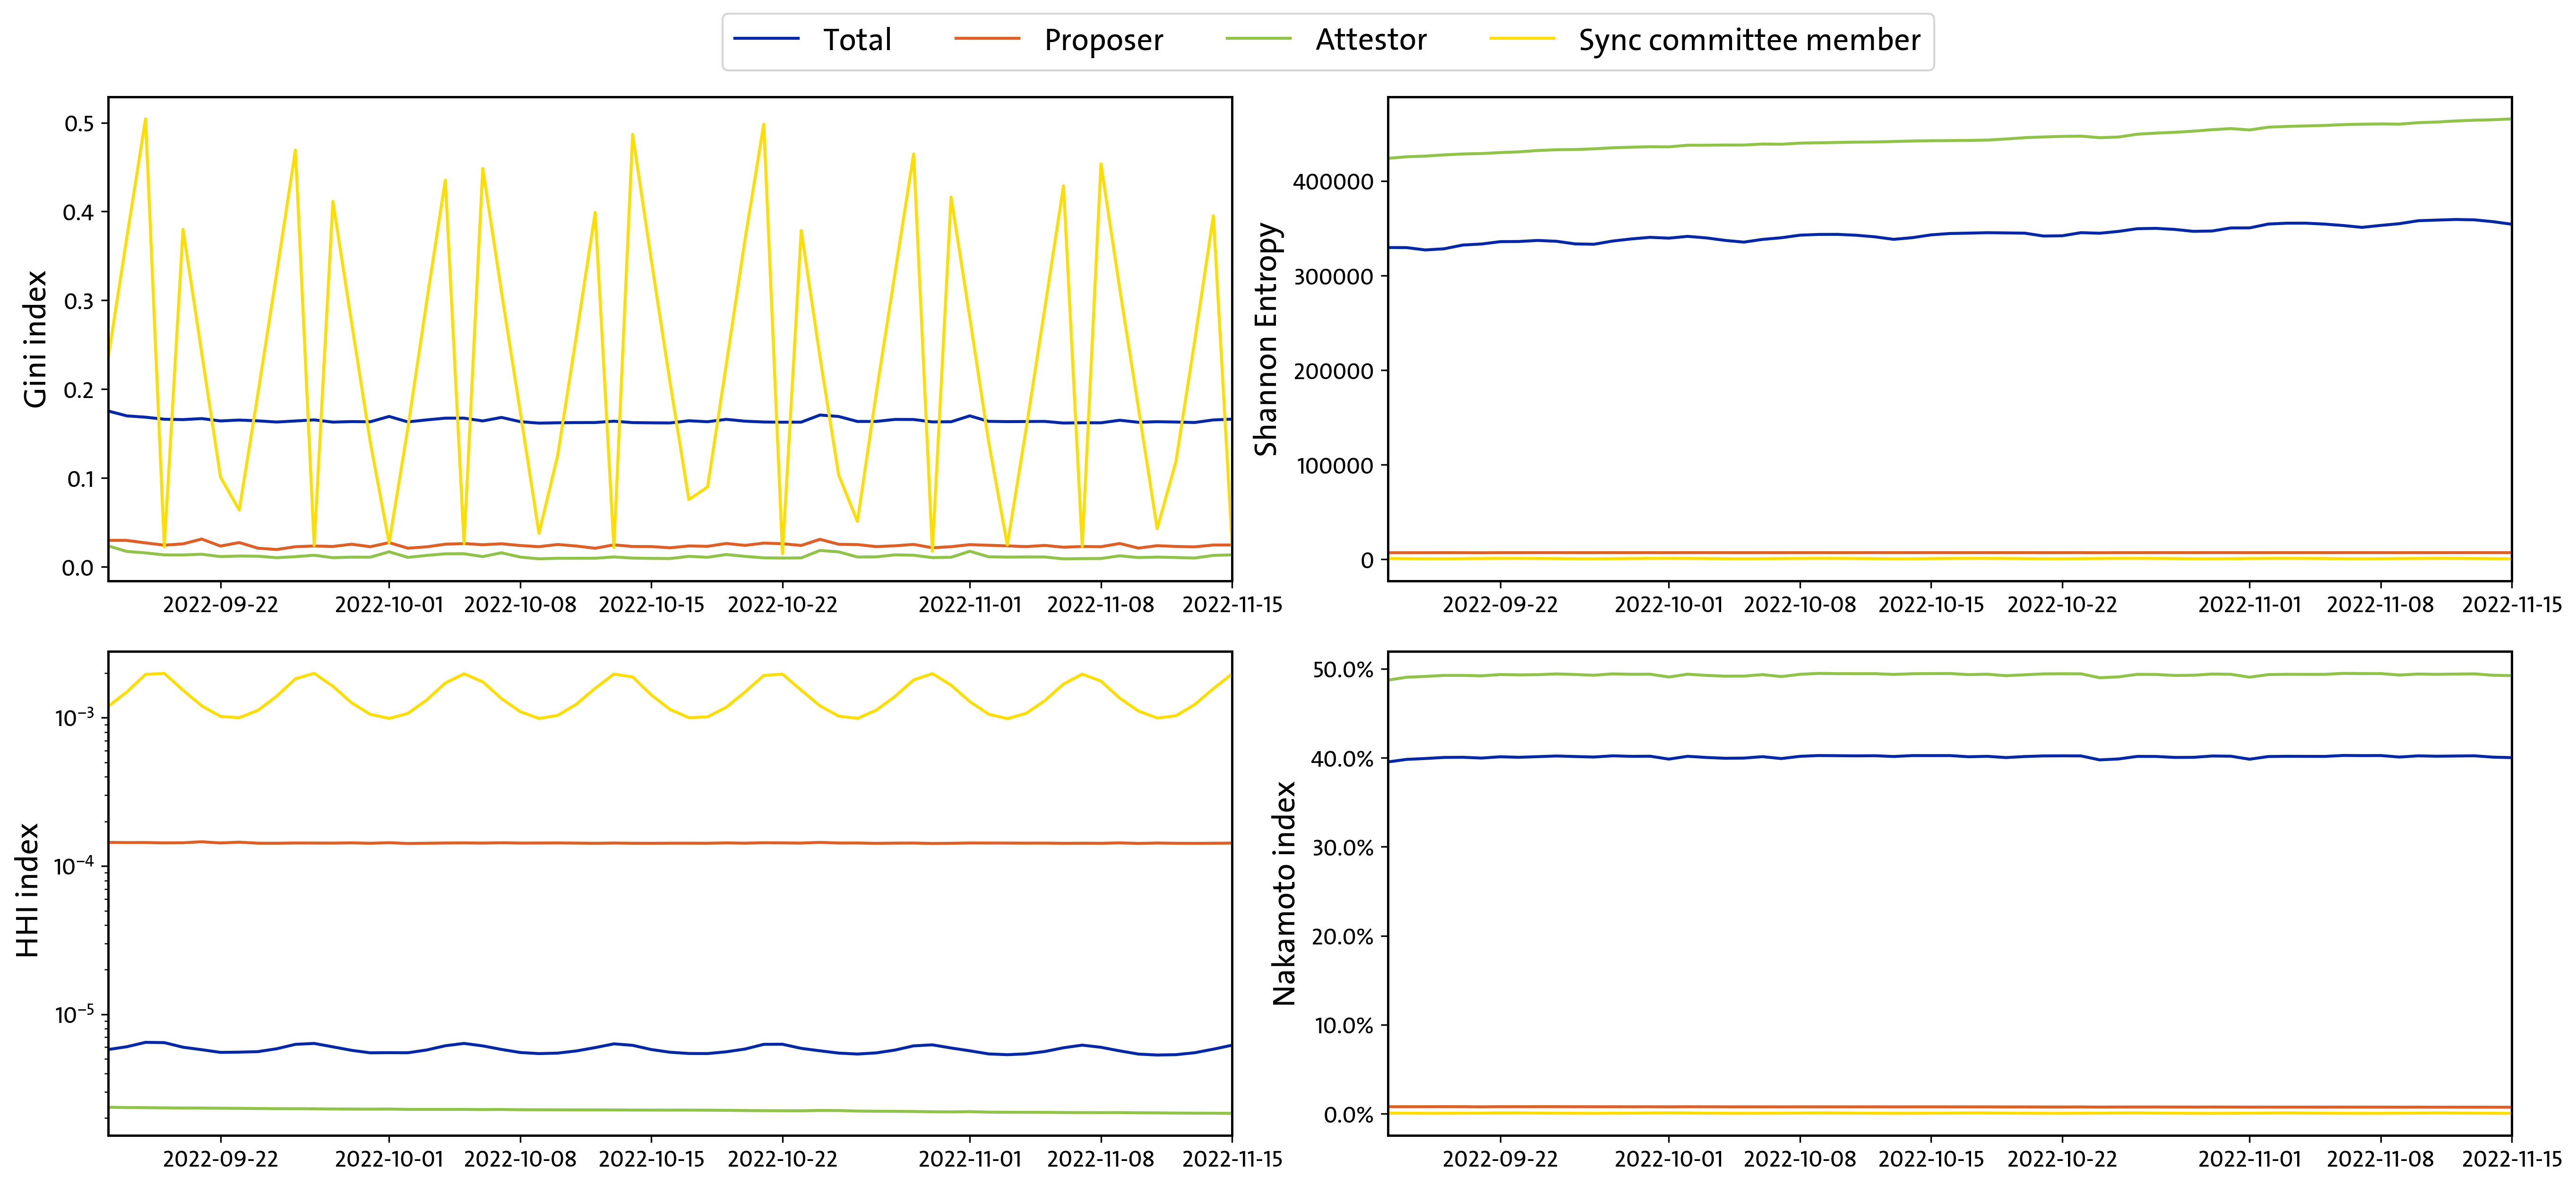

In [92]:
from glob import glob
files=glob('/home/user/yan/github/ETH2.0-reward/new_figures/index_data_3/*.csv')
#为了处理特殊的 HHI 而增加的代码
file1=[i for i in files if 'HHI' not in i]
file2=[i for i in files if i.endswith('_1.csv')==True]
files=file1+file2
validator_counts =pd.read_csv('/home/user/yan/github/ETH2.0-reward/daily_validator_number_new.csv')
#生成 2*2 的子图
fig,axes=plt.subplots(2,2,figsize=(18,8),dpi=300)
for file in files:
    index=pd.read_csv(file)
    index['date']=pd.to_datetime(index['date'])
    index_name=file.split('/')[-1].split('.')[0].split('_')[0]
    index_name=index_name[0].upper()+index_name[1:]
    reward_type=file.split('/')[-1].split('.')[0].split('_')[1]
    # reward_type=['Total','Proposer','Attestor','Sync committee member']
    if index_name=='Gini':
        axes[0,0].plot(index['date'],index[reward_type],label=reward_type)
        #设置 Y轴的label
        axes[0,0].set_ylabel(f'{index_name} index',fontsize=16)
        #y轴用百分比表示
        # axes[0,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
        # axes[0,0].legend(fontsize=16,ncol=2)
        # #x轴从 2022-09-18 开始
        axes[0,0].autoscale(enable=True, axis='x', tight=True)
        axes[0,0].set_xlim(left=pd.to_datetime('2022-09-16'))
        # axes[0,0].set_yscale('log') 
    if index_name=='Index':
        axes[0,1].plot(index['date'],index[reward_type],label=reward_type)
        axes[0,1].set_ylabel(f'Shannon Entropy',fontsize=16)
        #y轴用百分比表示
        # axes[0,1].legend(fontsize=16,ncol=2)
        axes[0,1].autoscale(enable=True, axis='x', tight=True)
        axes[0,1].set_xlim(left=pd.to_datetime('2022-09-16'))
    
    if index_name=='HHI':
        # reviese_HHI=index[reward_type]* validator_counts['validator_index'][1:].values
        axes[1,0].plot(index['date'],index[reward_type],label=reward_type)
        # axes[1,0].plot(index['date'],reviese_HHI,label=reward_type)
        axes[1,0].set_ylabel(f' HHI index',fontsize=16)
        #y轴用百分比表示
        axes[1,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        # axes[1,0].legend(fontsize=16,ncol=2)
        axes[1,0].autoscale(enable=True, axis='x', tight=True)
        axes[1,0].set_xlim(left=pd.to_datetime('2022-09-16'))
        axes[1,0].set_yscale('log')
        
    if index_name=='Nakamoto':
        axes[1,1].plot(index['date'],index[reward_type],label=reward_type)
        axes[1,1].set_ylabel(f'{index_name} index',fontsize=16)
        #y轴用百分比表示
        axes[1,1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
        # axes[1,1].legend(fontsize=16,ncol=2)
        axes[1,1].autoscale(enable=True, axis='x', tight=True)
        axes[1,1].set_xlim(left=pd.to_datetime('2022-09-16'))
        plt.tight_layout()
#Legend 改名字,将 "Total reward" 改为 "Total", "Proposer reward" 改为 "Proposer", "Attestation reward" 改为 "Attestor", "Sync committee reward" 改为 "Sync committee member"
handles, labels = axes[0,0].get_legend_handles_labels()
labels[0]='Total'
labels[1]='Proposer'
labels[2]='Attestor'
labels[3]='Sync committee member'
#用 plt.legend 设置 legend 的位置
plt.legend(handles,labels,fontsize=16,ncol=4,bbox_to_anchor=(0.5,2.35),frameon=True)
# plt.legend(fontsize=16,ncol=4,bbox_to_anchor=(0.5,2.35),frameon=True)
#用plt 设置 Y轴为对数
plt.savefig('./new_figures/4_index_timeseries.pdf',bbox_inches='tight',dpi=300,facecolor='white')



In [86]:
index.columns

Index(['Unnamed: 0', 'Total', 'date'], dtype='object')

In [15]:
for file in files:
    index=pd.read_csv(file)
    index['date']=pd.to_datetime(index['date'])
    index_name=file.split('/')[-1].split('.')[0].split('_')[0]
    index_name=index_name[0].upper()+index_name[1:]
    reward_type=file.split('/')[-1].split('.')[0].split('_')[1]
    if index_name=='Gini':
        break

In [16]:
reward_type

'Attestation reward'

In [17]:
index_name

'Gini'

In [18]:
file

'/home/user/yan/github/ETH2.0-reward/new_figures/index_data_2/gini_Attestation reward.csv'

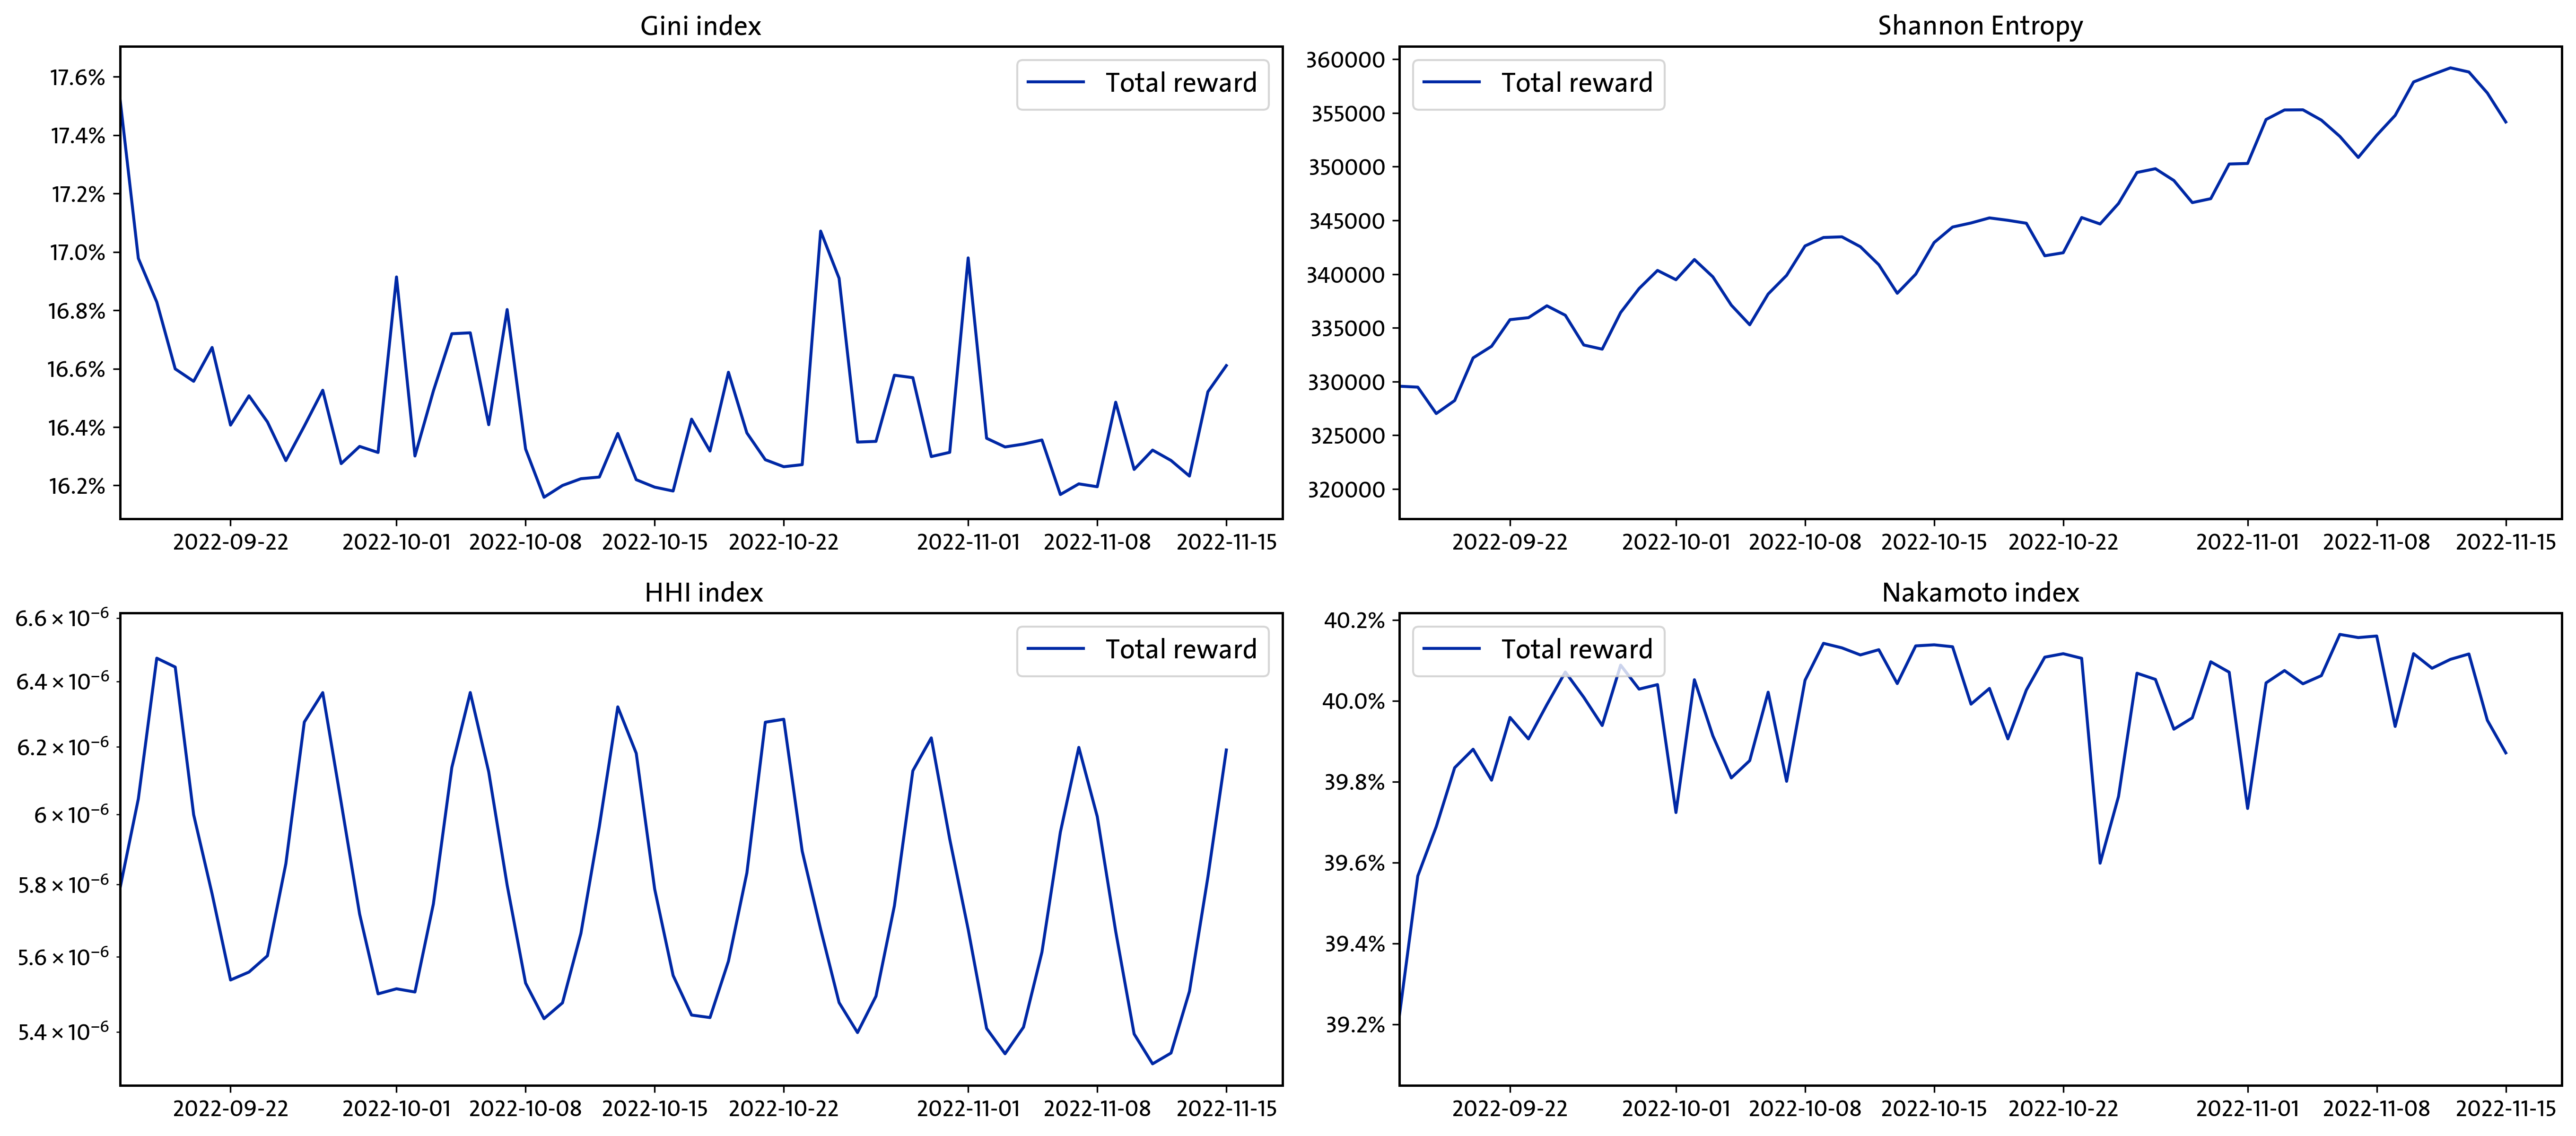

In [98]:
from glob import glob
files=glob('/home/user/yan/github/ETH2.0-reward/new_figures/index_data/*.csv')
#生成 2*2 的子图
fig,axes=plt.subplots(2,2,figsize=(18,8),dpi=300)
for file in files:
    index=pd.read_csv(file)
    index['date']=pd.to_datetime(index['date'])
    index_name=file.split('/')[-1].split('.')[0].split('_')[0]
    index_name=index_name[0].upper()+index_name[1:]
    reward_type=file.split('/')[-1].split('.')[0].split('_')[1]
    if reward_type=='Total reward':
        if index_name=='Gini':
            axes[0,0].plot(index['date'],index[reward_type],label=reward_type)
            axes[0,0].set_title(f'{index_name} index',fontsize=14)
            #y轴用百分比表示
            axes[0,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
            axes[0,0].legend(fontsize=14)
            # #x轴从 2022-09-18 开始
            axes[0,0].set_xlim(left=pd.to_datetime('2022-09-16'))
            # axes[0,0].set_yscale('log')
        
        if index_name=='Index':
            axes[0,1].plot(index['date'],index[reward_type],label=reward_type)
            axes[0,1].set_title(f'Shannon Entropy',fontsize=14)
            #y轴用百分比表示
            axes[0,1].legend(fontsize=14)
            axes[0,1].set_xlim(left=pd.to_datetime('2022-09-16'))
        
        if index_name=='HHI':
            axes[1,0].plot(index['date'],index[reward_type],label=reward_type)
            axes[1,0].set_title(f' HHI index',fontsize=14)
            #y轴用百分比表示
            axes[1,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
            axes[1,0].legend(fontsize=14)
            axes[1,0].set_xlim(left=pd.to_datetime('2022-09-16'))
            axes[1,0].set_yscale('log')
        
        if index_name=='Nakamoto':
            axes[1,1].plot(index['date'],index[reward_type],label=reward_type)
            axes[1,1].set_title(f'{index_name} index',fontsize=14)
            #y轴用百分比表示
            axes[1,1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
            axes[1,1].legend(fontsize=14,loc='upper left')
            axes[1,1].set_xlim(left=pd.to_datetime('2022-09-16'))
            plt.tight_layout()
# plt.legend(fontsize=14,ncol=4,bbox_to_anchor=(0.4,2.5),frameon=True)
#用plt 设置 Y轴为对数
# plt.savefig('./new_figures/4_index_timeseries.pdf',bbox_inches='tight',dpi=300,facecolor='white')
plt.savefig('./new_figures/4_index_timeseries_total_reward.pdf',bbox_inches='tight',dpi=300,facecolor='white')


In [72]:
test=pd.read_csv('/home/user/yan/github/ETH2.0-reward/new_figures/index_data/HHI_Total reward.csv')
test.head(10)

Unnamed: 0  Total reward        date
0           0      0.000007  2022-09-15
1           1      0.000006  2022-09-16
2           2      0.000006  2022-09-17
3           3      0.000006  2022-09-18
4           4      0.000006  2022-09-19
5           5      0.000006  2022-09-20
6           6      0.000006  2022-09-21
7           7      0.000006  2022-09-22
8           8      0.000006  2022-09-23
9           9      0.000006  2022-09-24

NameError: name 'data' is not defined

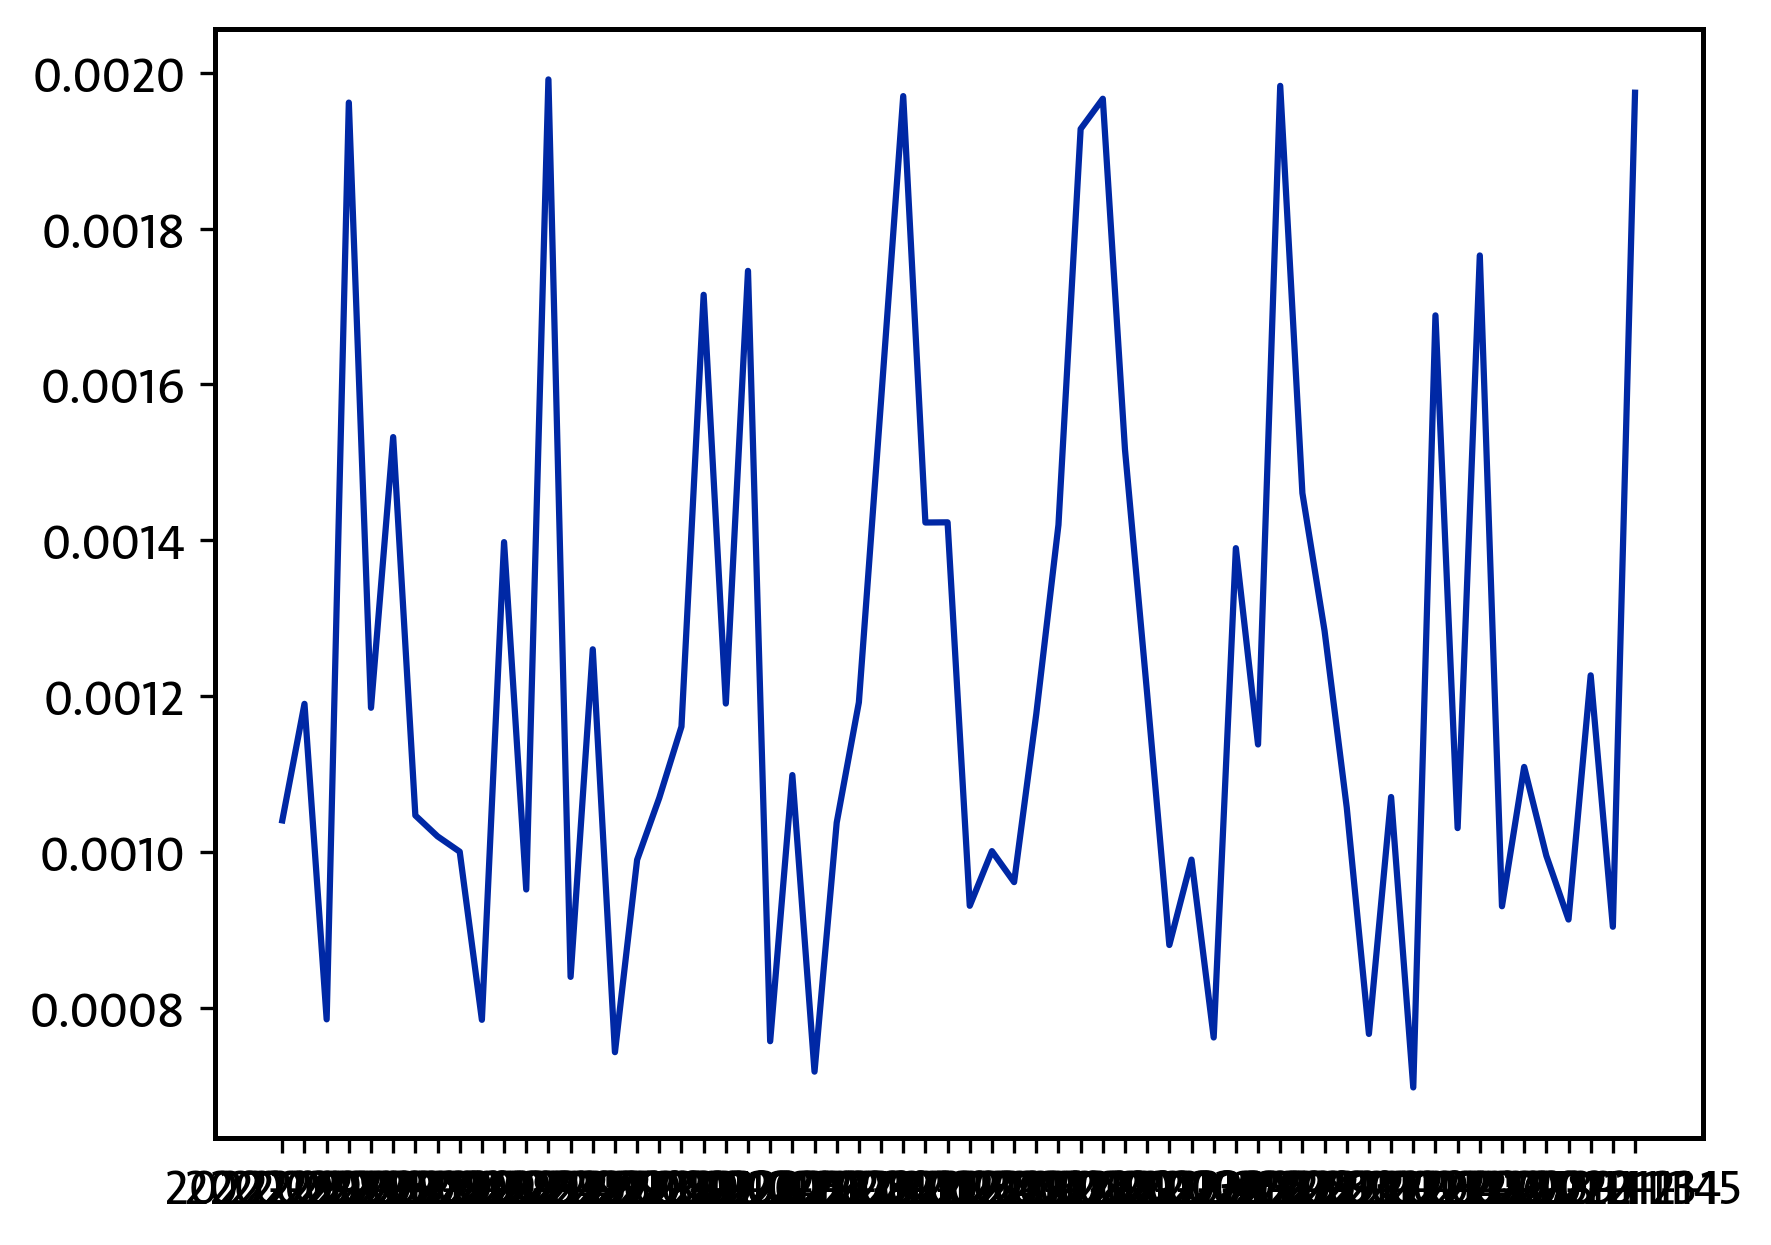

In [62]:
plt.plot(test['date'],test['sync_total_reward'])

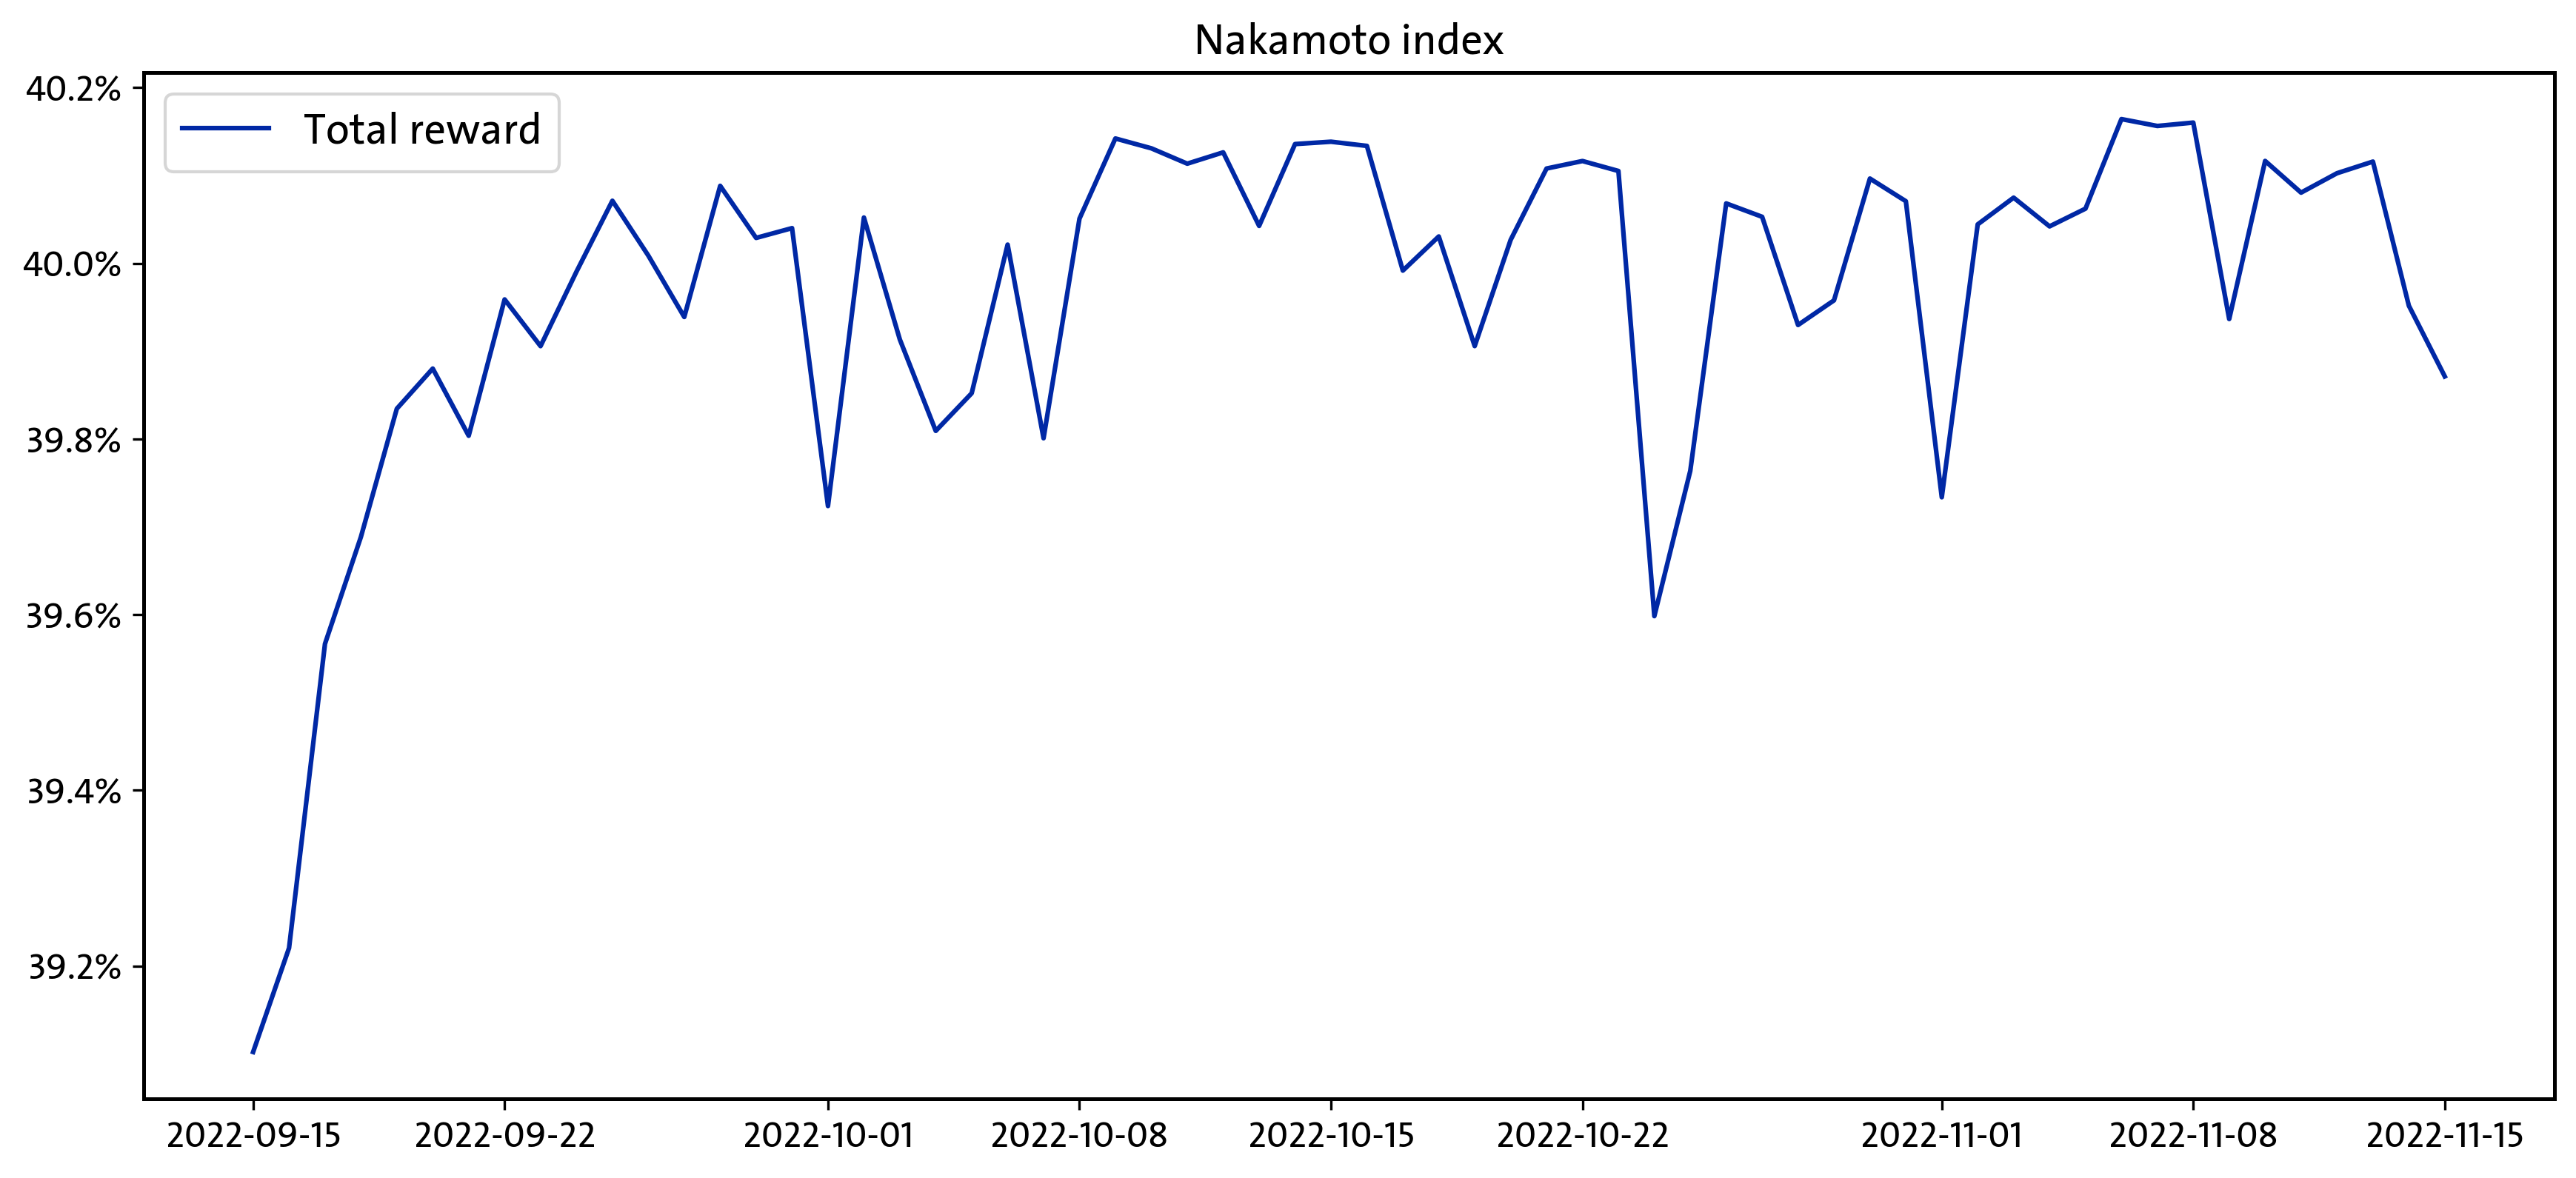

In [25]:
index=pd.read_csv(files[0])
index['date']=pd.to_datetime(index['date'])
index_name=files[0].split('/')[-1].split('.')[0].split('_')[0]
#indx_name 的首字母大写
index_name=index_name[0].upper()+index_name[1:]
reward_type=files[0].split('/')[-1].split('.')[0].split('_')[1]
fig,ax=plt.subplots(figsize=(14,6),dpi=300)
ax.plot(index['date'],index[reward_type],label=reward_type)
ax.set_title(f'{index_name} index',fontsize=14)
#y轴用百分比表示
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.legend(fontsize=14)

'nakamoto'

In [122]:
results_Gini

NameError: name 'results_Gini' is not defined

In [121]:
results_Gini

NameError: name 'results_Gini' is not defined

In [34]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
start = date(2022,9,15)
end = date(2022,11,15)
results_nakamoto = index_calc(data,start,end,nakamoto)
results_nakamoto.to_csv("results_nakamoto.csv")

100%|██████████| 62/62 [09:29<00:00,  9.18s/it]


In [35]:
results_nakamoto

val       date
0   167085.0 2022-09-15
1   168037.0 2022-09-16
2   169732.0 2022-09-17
3   170521.0 2022-09-18
4   171363.0 2022-09-19
..       ...        ...
57  185914.0 2022-11-11
58  186534.0 2022-11-12
59  186839.0 2022-11-13
60  186574.0 2022-11-14
61  186573.0 2022-11-15

[62 rows x 2 columns]

In [82]:
# Merge all the dataframes together
import pandas as pd

# Assuming the dataframes results, results_HHI, results_Gini, and results_nakamoto are already defined...

# Rename 'val' columns for each dataframe first
results = results.rename(columns={'val': 'ShannonEntropy'})
results_HHI = results_HHI.rename(columns={'val': 'HHI'})
results_Gini = results_Gini.rename(columns={'val': 'Gini'})  # There was a small inconsistency here, I assumed you want to rename this column 'Gini'
results_nakamoto = results_nakamoto.rename(columns={'val': 'Nakamoto'})

# Now, merge the dataframes on the 'Date' column
merged_df = results.merge(results_HHI, on='date', how='outer') \
    .merge(results_Gini, on='date', how='outer') \
    .merge(results_nakamoto, on='date', how='outer')

print(merged_df)
merged_df.columns

         date  ShannonEntropy       HHI      Gini  Nakamoto
0  2022-09-15   343158.473887  0.000007  0.183659  167085.0
1  2022-09-16   351243.574959  0.000006  0.181663  168037.0
2  2022-09-17   346643.537333  0.000006  0.174872  169732.0
3  2022-09-18   342390.371015  0.000007  0.172915  170521.0
4  2022-09-19   342117.349024  0.000007  0.170114  171363.0
..        ...             ...       ...       ...       ...
57 2022-11-11   365537.423381  0.000005  0.165161  185914.0
58 2022-11-12   366287.391020  0.000005  0.164779  186534.0
59 2022-11-13   366658.407297  0.000006  0.164446  186839.0
60 2022-11-14   365576.475299  0.000006  0.167613  186574.0
61 2022-11-15   364899.508537  0.000006  0.169065  186573.0

[62 rows x 5 columns]


Index(['date', 'ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'], dtype='object')

In [83]:
# Reorder the columns
merged_df = merged_df[['date', 'ShannonEntropy', 'HHI', 'Gini', 'Nakamoto']]
Index4=merged_df
Index4.to_csv("Index4.csv")
Index4

date  ShannonEntropy       HHI      Gini  Nakamoto
0  2022-09-15   343158.473887  0.000007  0.183659  167085.0
1  2022-09-16   351243.574959  0.000006  0.181663  168037.0
2  2022-09-17   346643.537333  0.000006  0.174872  169732.0
3  2022-09-18   342390.371015  0.000007  0.172915  170521.0
4  2022-09-19   342117.349024  0.000007  0.170114  171363.0
..        ...             ...       ...       ...       ...
57 2022-11-11   365537.423381  0.000005  0.165161  185914.0
58 2022-11-12   366287.391020  0.000005  0.164779  186534.0
59 2022-11-13   366658.407297  0.000006  0.164446  186839.0
60 2022-11-14   365576.475299  0.000006  0.167613  186574.0
61 2022-11-15   364899.508537  0.000006  0.169065  186573.0

[62 rows x 5 columns]

In [86]:
Index4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            62 non-null     datetime64[ns]
 1   ShannonEntropy  62 non-null     float64       
 2   HHI             62 non-null     float64       
 3   Gini            62 non-null     float64       
 4   Nakamoto        62 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.9 KB


In [85]:
Index4.describe()

ShannonEntropy           HHI       Gini       Nakamoto
count       62.000000  6.200000e+01  62.000000      62.000000
mean    352526.658139  5.847996e-06   0.167343  178431.403226
std       7163.484436  3.497066e-07   0.003883    5014.455178
min     342117.349024  5.339966e-06   0.163645  167085.000000
25%     346547.885934  5.545094e-06   0.164971  175153.750000
50%     351023.609079  5.795176e-06   0.165841  178049.500000
75%     357040.544554  6.136007e-06   0.168266  182549.250000
max     366658.407297  6.671025e-06   0.183659  186839.000000

In [182]:
data= pd.read_csv('Index4.csv')

In [184]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 2x2 subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=('ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'))
# Add box plots to each subplot
fig.add_trace(go.Box(y=df['ShannonEntropy'], name='ShannonEntropy'), row=1, col=1)
fig.add_trace(go.Box(y=df['HHI'], name='HHI'), row=1, col=2)
fig.add_trace(go.Box(y=df['Gini'], name='Gini'), row=2, col=1)
fig.add_trace(go.Box(y=df['Nakamoto'], name='Nakamoto'), row=2, col=2)

# Explanation with LaTeX
#explanation = r'Note: In this plot, the symbol $\mu$ represents a factor of $10^{-6}$.'

# Update layout for better aesthetics and add explanation
fig.update_layout(
    title='Boxplots of Metrics: Total Validator Rewards',
    showlegend=True,
    font=dict(family="Courier New, monospace")
)

fig.show()


In [185]:
# Save the figure with high resolution
fig.write_image("index_boxplot.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

In [186]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 4x1 subplot layout
fig = make_subplots(rows=4, cols=1, shared_xaxes=False, subplot_titles=('ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'))

# Add traces for each metric
fig.add_trace(go.Scatter(x=df['date'], y=df['ShannonEntropy'], mode='lines', name='ShannonEntropy'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['HHI'], mode='lines', name='HHI'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['Gini'], mode='lines', name='Gini'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['Nakamoto'], mode='lines', name='Nakamoto'), row=4, col=1)

# LaTeX styled title and subplot titles
fig.update_layout(
    title_text="Time Series of Metrics: Validator Total Rewards",
    font=dict(family="Courier New, monospace", size=16, color="#7f7f7f"),
    height=1000,  # Adjusted height
    template="plotly"  # Set the theme to ggplot2
)

# Add LaTeX explanation
# Explanation with LaTeX-style formatting
#explanation = "Note: In this plot, the symbol $\\mu$ represents the metric prefix 'micro-', denoting a factor of $10^{-6}$."

# Show the plot
fig.show()


In [187]:
# Save the figure with high resolution
fig.write_image("index_timeseries.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

In [170]:
import pandas as pd
from scipy.stats import shapiro, anderson

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Shapiro-Wilk Test
def shapiro_test(data):
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk Test:\nStatistic={stat:.5f}, p={p:.5f}')
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

# Anderson-Darling Test
def anderson_test(data):
    result = anderson(data)
    print('Anderson-Darling Test:')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At significance level {sl:.2f}, data looks normal (fail to reject H0)')
        else:
            print(f'At significance level {sl:.2f}, data does not look normal (reject H0)')
    print()

columns = ['ShannonEntropy', 'HHI', 'Gini', 'Nakamoto']

for col in columns:
    print(f"Testing for variable: {col}")
    shapiro_test(df[col])
    anderson_test(df[col])


Testing for variable: ShannonEntropy
Shapiro-Wilk Test:
Statistic=0.93672, p=0.00322
Sample does not look Gaussian (reject H0)

Anderson-Darling Test:
At significance level 15.00, data does not look normal (reject H0)
At significance level 10.00, data does not look normal (reject H0)
At significance level 5.00, data does not look normal (reject H0)
At significance level 2.50, data does not look normal (reject H0)
At significance level 1.00, data does not look normal (reject H0)

Testing for variable: HHI
Shapiro-Wilk Test:
Statistic=0.94500, p=0.00772
Sample does not look Gaussian (reject H0)

Anderson-Darling Test:
At significance level 15.00, data does not look normal (reject H0)
At significance level 10.00, data does not look normal (reject H0)
At significance level 5.00, data does not look normal (reject H0)
At significance level 2.50, data does not look normal (reject H0)
At significance level 1.00, data does not look normal (reject H0)

Testing for variable: Gini
Shapiro-Wilk Tes

In [171]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, columns):
    for column in columns:
        print(f"\nTesting stationarity for column: {column}")
        
        # Perform ADF test
        result = adfuller(df[column])
        
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:', result[4])
        
        # Interpretation based on p-value
        if result[1] <= 0.05:
            print(f"The series {column} is likely stationary.")
        else:
            print(f"The series {column} is likely non-stationary.")

# Given your dataframe name is 'df'
columns_to_test = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
test_stationarity(df, columns_to_test)



Testing stationarity for column: ShannonEntropy
ADF Statistic: 3.524384912045216
p-value: 1.0
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
The series ShannonEntropy is likely non-stationary.

Testing stationarity for column: HHI
ADF Statistic: -0.7676504925570588
p-value: 0.8284403285307048
Critical Values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
The series HHI is likely non-stationary.

Testing stationarity for column: Gini
ADF Statistic: -5.337737232600176
p-value: 4.571496308611603e-06
Critical Values: {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
The series Gini is likely stationary.

Testing stationarity for column: Nakamoto
ADF Statistic: -1.027409896302492
p-value: 0.7431363761633927
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
The series Nakamoto is likely non-stationary.


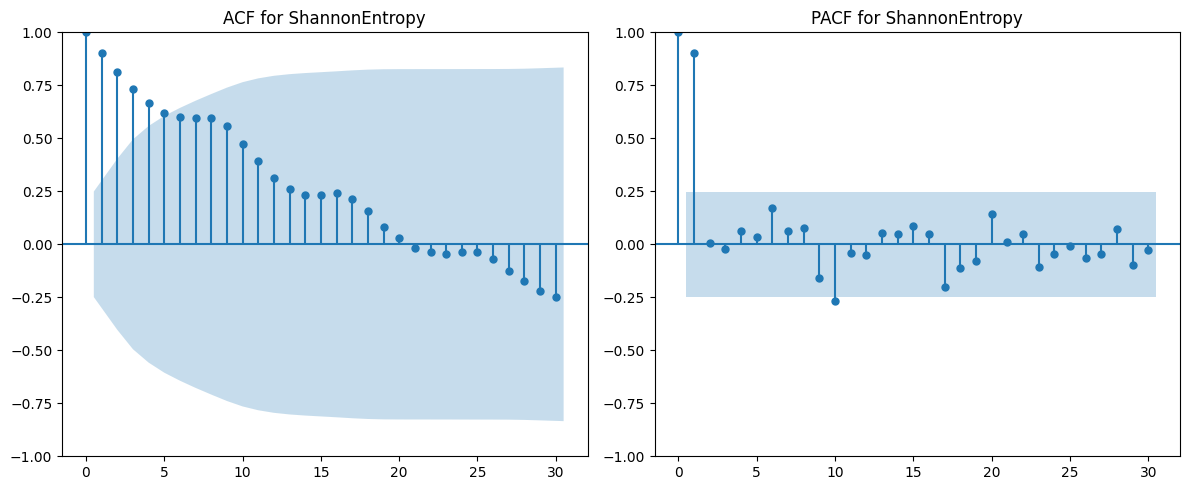

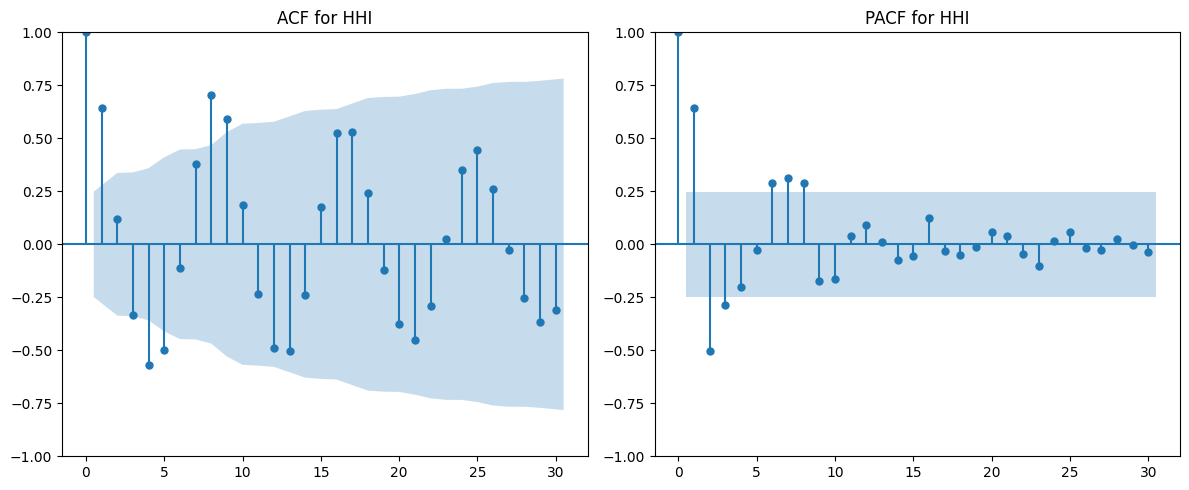

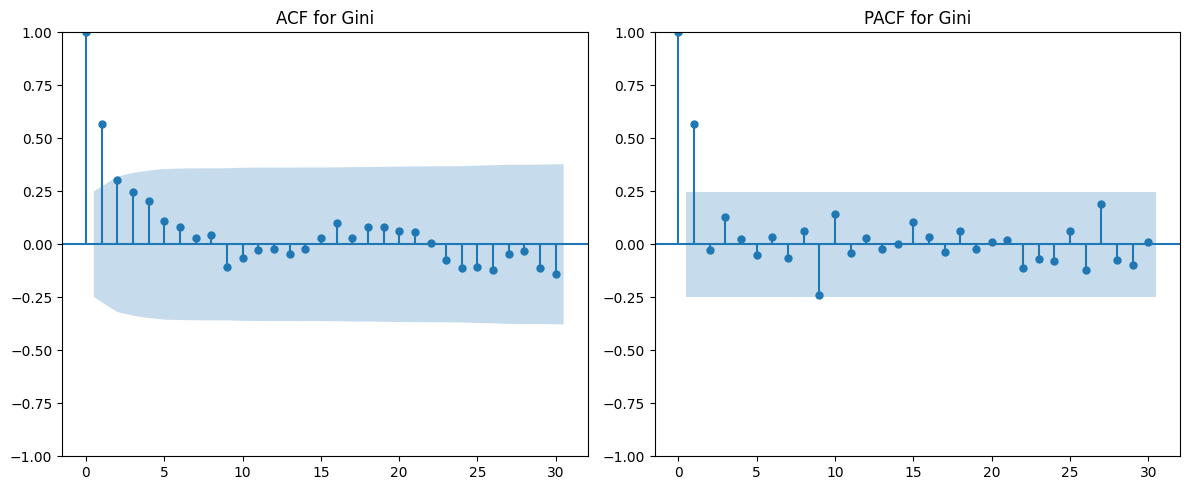

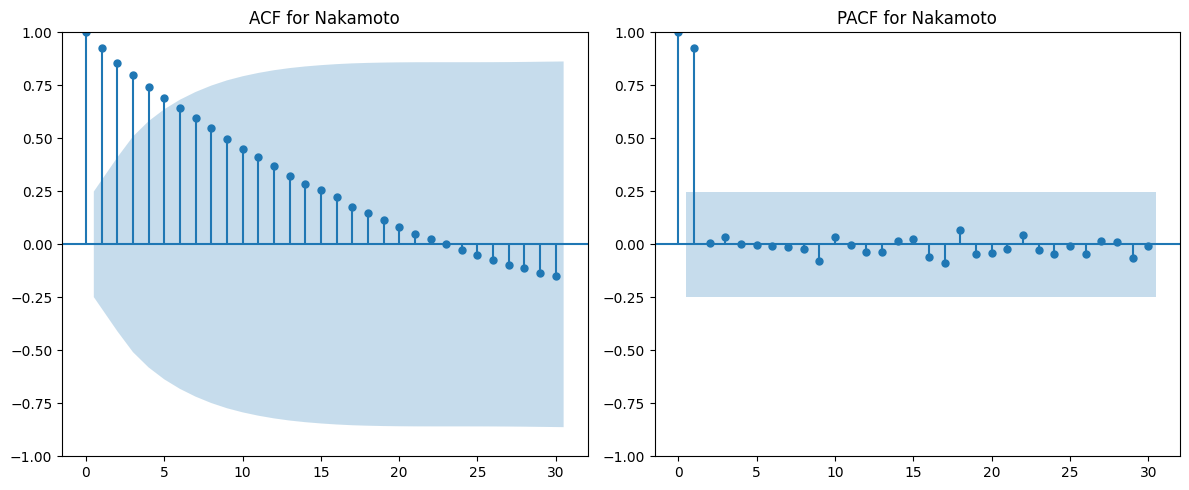

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df=data.copy()
def plot_autocorrelation(df, column_name):
    plt.figure(figsize=(12, 5))
    
    max_lags = len(df) // 2 - 1  # Ensure lags are less than half the sample size
    
    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(df[column_name], lags=max_lags, ax=plt.gca())
    plt.title(f'ACF for {column_name}')
    
    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(df[column_name], lags=max_lags, ax=plt.gca())
    plt.title(f'PACF for {column_name}')
    
    plt.tight_layout()

# Save the figure with high resolution
    filename = f"{column_name}_autocorrelation.png"
    plt.savefig(filename, dpi=1800)  # You can adjust the DPI value for desired resolution.
    plt.show()

# For each of your columns
columns_to_test = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
for column in columns_to_test:
    plot_autocorrelation(df, column)


> ACF Plot: The autocorrelation function plot gives you the correlation of the series with itself, lagged by x time units. So the y-axis is the correlation and the x-axis is the number of time units of lag.

> PACF Plot: The partial autocorrelation function plot gives the correlation of the series with itself, lagged by x time units, but with the relationships at shorter lags removed.

**Interpreting these plots**:

> Sudden Drop-Off: If either the ACF or PACF shows a sudden drop-off after a certain number of lags, this might indicate that this is the order of the autoregressive term.

> Gradual Decline: If the ACF shows a gradual decline and PACF shows a sudden drop-off, this might indicate that this is the order of the moving average term.

> Significant Spikes: If there are significant spikes at specific lags, this can indicate seasonality in the data.

By analyzing the ACF and PACF plots, you can get insights about potential patterns in your data and inform your choices when building time series models.

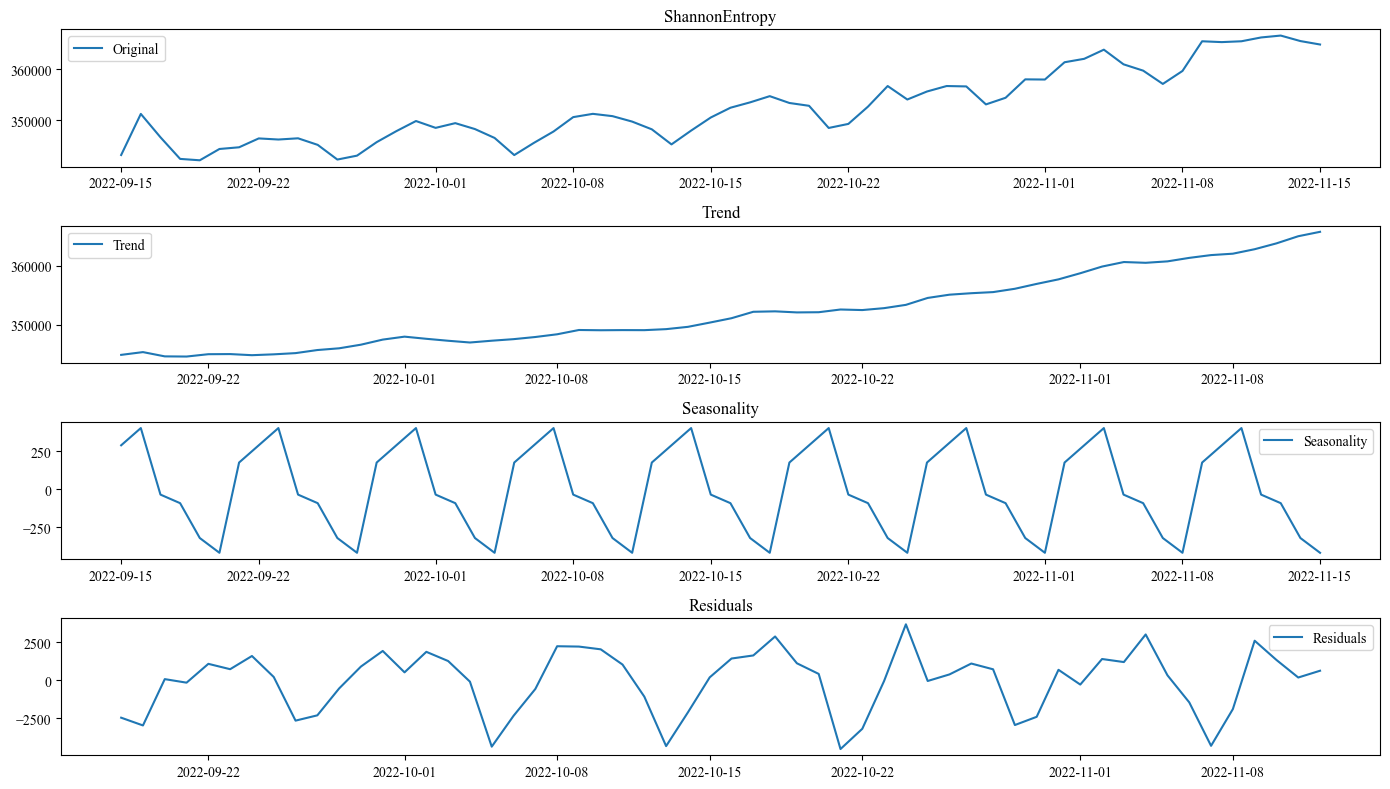

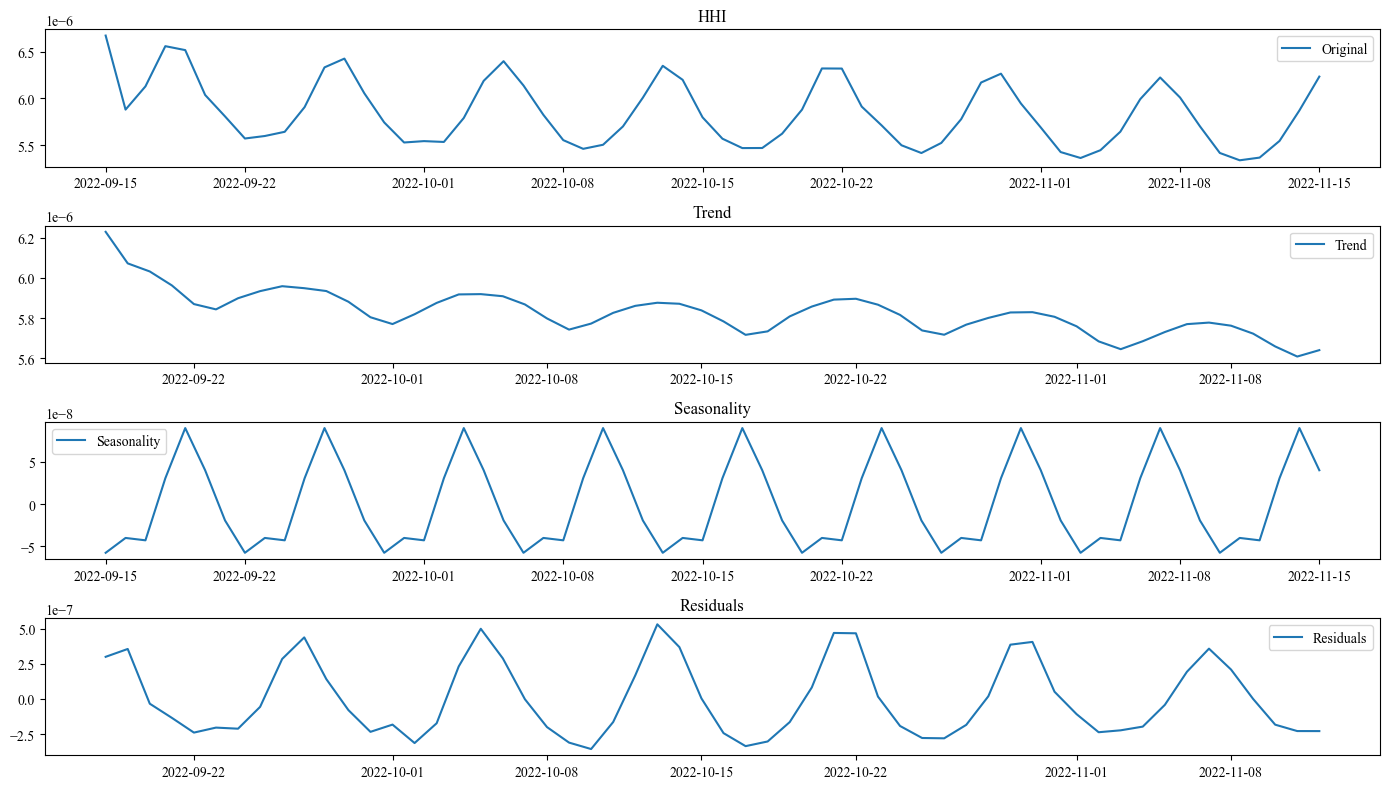

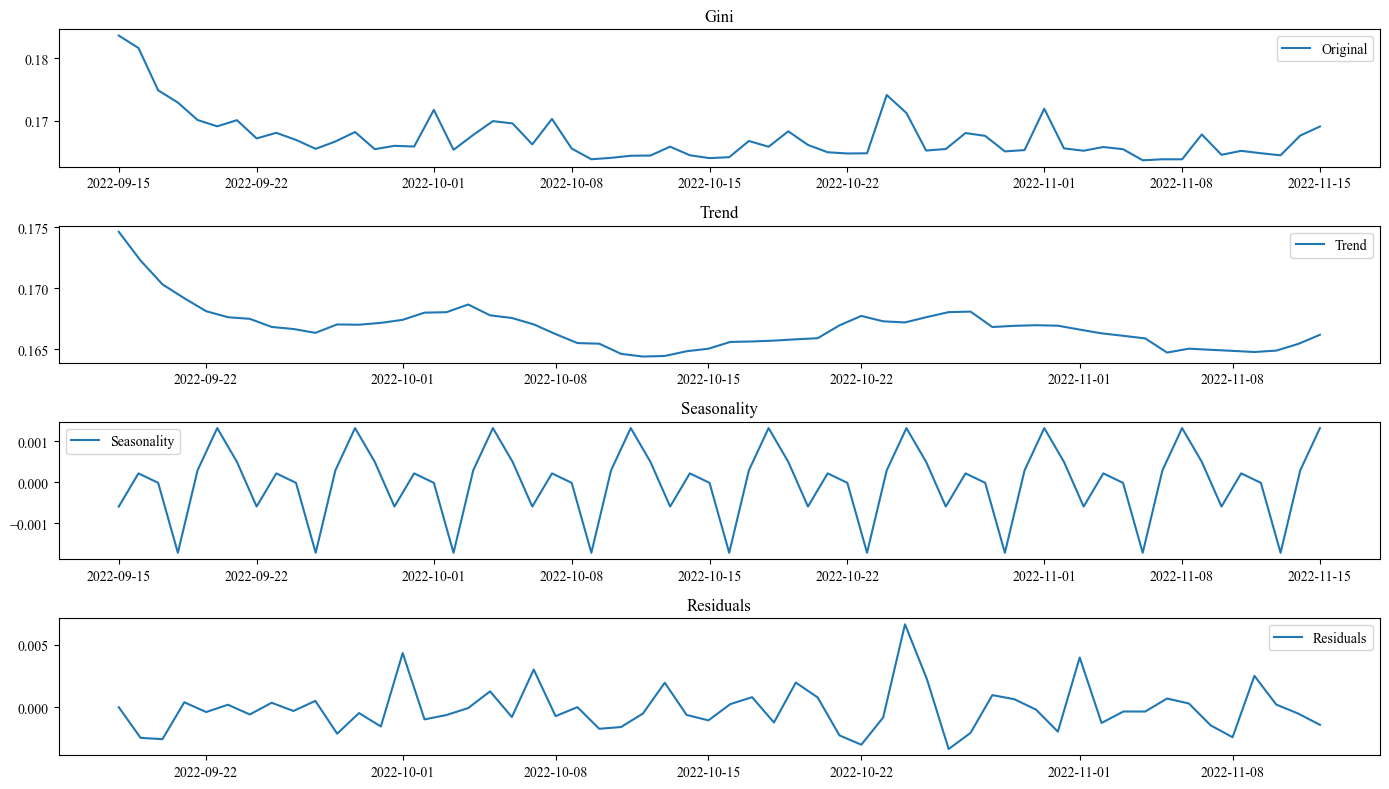

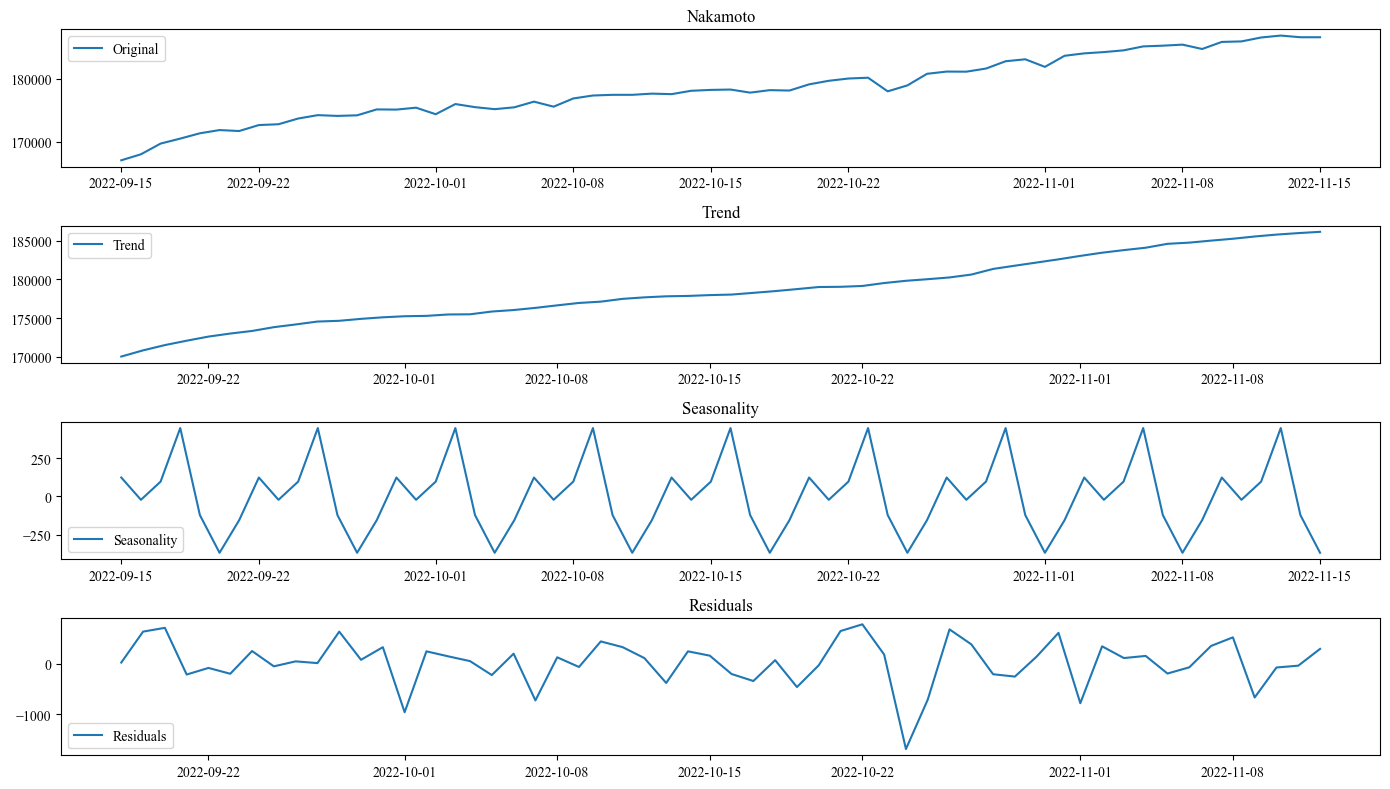

In [173]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming 'data' is your DataFrame
df = data.copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Ensure consistent frequency
if pd.infer_freq(df.index) is not None:
    df = df.asfreq(pd.infer_freq(df.index))
else:
    raise ValueError("Data frequency can't be inferred. Ensure your data has consistent frequency or manually set it.")

# Adjust matplotlib settings
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Define a function to decompose and plot
def plot_decomposition(df, column_name, period=None):
    decomposition = seasonal_decompose(df[column_name], period=period, model='additive')
    
    plt.figure(figsize=(14, 8))
    
    # Original
    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], label='Original')
    plt.legend(loc='best')
    plt.title(column_name)
    
    # Trend
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.title("Trend")

    # Seasonal
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.title("Seasonality")

    # Residuals
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.title("Residuals")
    
    plt.tight_layout()
    
    # Save the figure to PNG
    plt.savefig(f'{column_name}_decomposition.png', dpi=900)
    plt.show()

# Decompose
# Provided code to set date as index, infer frequency, and plot
columns_to_decompose = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
for column in columns_to_decompose:
    plot_decomposition(df, column)


In [175]:
import numpy as np

def detect_seasonality_frequency(ts):
    # Compute the FFT and power spectrum
    fft_vals = np.fft.fft(ts.fillna(0))
    fft_freq = np.fft.fftfreq(len(ts))
    
    # Remove the negative frequencies
    fft_vals = fft_vals[fft_freq > 0]
    fft_freq = fft_freq[fft_freq > 0]
    
    # Find the frequency with the maximum power (excluding the zero frequency)
    dominant_frequency = fft_freq[np.argmax(np.abs(fft_vals)[1:]) + 1]
    
    # Convert frequency to period (seasonality)
    seasonality = int(np.round(1 / dominant_frequency))
    return seasonality

for column in columns_to_decompose:
    seasonality = detect_seasonality_frequency(df[column].dropna())
    print(f"Detected seasonality for {column}: {seasonality} time units")


Detected seasonality for ShannonEntropy: 31 time units
Detected seasonality for HHI: 9 time units
Detected seasonality for Gini: 21 time units
Detected seasonality for Nakamoto: 31 time units


In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np

def estimate_growth_rate(df, column_name):
    # Decompose the time series
    decomposition = seasonal_decompose(df[column_name], model='additive')
    
    # Extract trend component
    trend = decomposition.trend.dropna()
    
    # Create a time variable, t
    t = np.arange(len(trend)).reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression().fit(t, trend)
    
    # Return the slope as the growth rate
    return model.coef_[0]

for column in columns_to_decompose:
    growth_rate = estimate_growth_rate(df, column)
    print(f"Estimated growth rate for {column}: {growth_rate:.4f} per time unit")


Estimated growth rate for ShannonEntropy: 367.8186 per time unit
Estimated growth rate for HHI: -0.0000 per time unit
Estimated growth rate for Gini: -0.0001 per time unit
Estimated growth rate for Nakamoto: 261.7281 per time unit


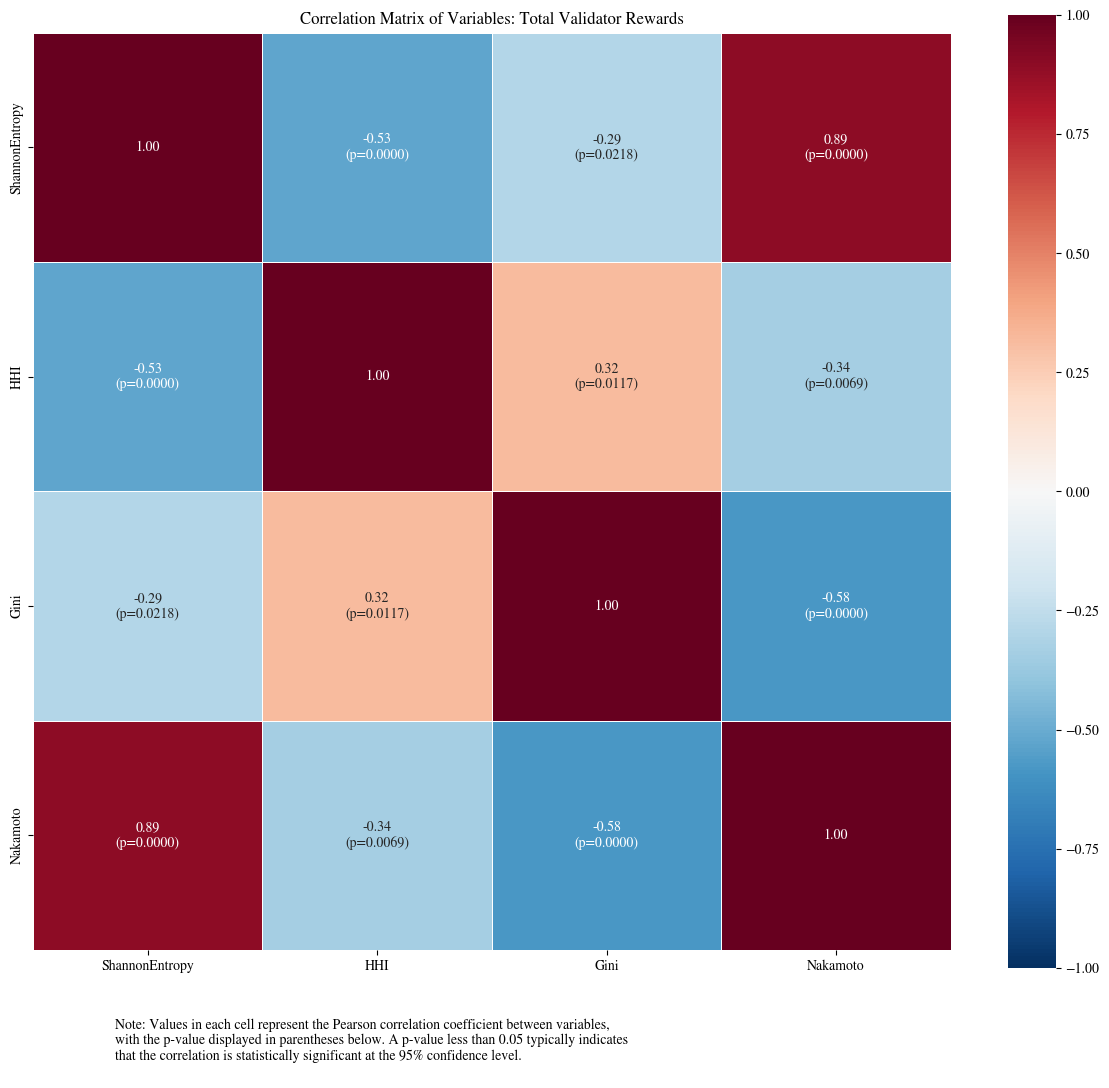

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

df = data.copy()
# Ensure LaTeX is disabled
plt.rcParams['text.usetex'] = False

# Use the 'STIX' fonts for a LaTeX-like appearance without requiring LaTeX
plt.rcParams['font.family'] = 'STIXGeneral'

# Compute the correlation matrix
corr_matrix = df[columns_to_decompose].corr()

# Compute the matrix of p-values
p_matrix = df[columns_to_decompose].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr_matrix.shape)

# Create an array to hold the annotations
annotations = corr_matrix.copy()
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if i != j:
            annotations.iloc[i, j] = f'{corr_matrix.iloc[i, j]:.2f}\n(p={p_matrix.iloc[i, j]:.4f})'
        else:
            annotations.iloc[i, j] = f'{corr_matrix.iloc[i, j]:.2f}'

# Plot the heatmap with the "RdBu_r" colormap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=annotations, cmap="RdBu_r", vmin=-1, vmax=1, square=True, linewidths=.5, fmt='')
plt.title('Correlation Matrix of Variables: Total Validator Rewards')

# Add a figure note
figure_note = """
Note: Values in each cell represent the Pearson correlation coefficient between variables, 
with the p-value displayed in parentheses below. A p-value less than 0.05 typically indicates 
that the correlation is statistically significant at the 95% confidence level.
"""
plt.figtext(0.1, -0.01, figure_note, ha="left", va="top", fontsize=10, wrap=True)

plt.tight_layout()
filename = "index_Correlations.png"
plt.savefig(filename, dpi=900)  # saves with 900 DPI.
plt.show()


In [191]:
# Save the figure with high resolution
fig.write_image("index_correlations.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

# References:
Code adapted from SoK: Blockchain Decentralization: https://arxiv.org/abs/2205.04256